<a href="https://colab.research.google.com/github/Zahra-Ferdous/Thesis_Human_Action_Recognition_from_Depth_Video/blob/main/UTD_MHAD_Depth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn
import math
%matplotlib inline
import os
import time

from numba.core.cgutils import if_likely
#from os.path import exists
import os.path 

import cv2
import sklearn
import scipy.io as sio
from numba import jit
from math import factorial, log
from sklearn.neighbors import KDTree
from scipy.signal import periodogram, welch
from astropy.timeseries import LombScargle
from scipy.io import loadmat
import re
import itertools


import imageio
from skimage import feature


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
l_ser = []
path = '/content/drive/MyDrive/Colab Notebooks Copy Old/utd mhad depth/Depth'

cnt = 0
#max_frame = -1
#start = time.time()

for file in os.listdir(path):
    if file.endswith('.mat'):
      cnt+=1
      print(cnt)
      print(file)
      d = sio.loadmat(path+'/'+file)['d_depth']
      d = np.transpose(d, (2, 0, 1))
      print(d.shape)

      x = re.split("_|\.",file)
      act = x[0]
      nam = x[1]
      tim = x[2]

      if(cnt == 13 or cnt == 10):
        #continue
        break
      
      # if((file[0:2]!='cx' and file[5:7]=='1_') or (file[0:2]=='cx' and file[4:6]=='1_')):
      #   d = sio.loadmat(path+'/'+file)['d_depth']
      if 1==1 :
        #print(d.shape)
        frame = d.shape[0]
        for k in range(frame):
            im = np.array(d[k][ : , 30:290 ])

            # im_g = sfi_filtered(im)
            # im = prewitt_filtered(im)
            im = cv2.resize(im, dsize=(227,227))

            # emi = np.zeros(227*227).astype(int)
            # for j in range(data.shape[1]):
            #   d = data[i][j].ravel().astype(int)
            #   d[d > 0] = 1
            #   emi = emi|d
            # emi = emi.reshape((227,227))
            # dset.append(emi)

            im = np.array([im])
            # im_g = np.array([im_g])
            # im_org = np.array([im_org])
            #im = np.array()
            if(k==0):
              im1 = im
              # im_g1 = im_g
              # im_org1 = im_org
            else:
              im1 = np.concatenate((im1, im), axis=0)
              # im_g1 = np.concatenate((im_g1, im_g), axis=0)
              # im_org1 = np.concatenate((im_org1, im_org), axis=0)

        #------------------------normalization------------------------

        im1 = im1/im1.max()
        # im_g1 = im_g1/im_g1.max()
        # im_org1 = im_org1/im_org1.max()
        
        # im1 = im1.reshape(im1.shape[0], 224,224, 1)
        # print(im1.shape)

        

        ser_data = { 'data_org': im1 , 'filename': file , 'label': act[1:] } 
        ser = pd.Series(data = ser_data, index = ['data_org','filename','label'])
        l_ser.append(ser)

1
a1_s1_t1_depth.mat
(48, 240, 320)


IndexError: ignored

In [75]:
def masked(img):
  x = np.logical_and((img>=0.01), (img<=0.5)).astype(int)
  return x


def prewitt_filtered(data):

  siz = data.shape[0]
  
  for i in range(siz):
    dat = data[i]
    d = masked(dat)
    d = d.astype('float32')
    # im = cv2.resize(d, dsize=(227,227))
    data[i] = cv2.filter2D(d, -1, kernelx)

  return data

def sfi_filtered(data):
  d = masked(data)
  d = d.astype('float32')
  # im = cv2.resize(d, dsize=(227,227))
  
  img_gaussian = cv2.GaussianBlur(d,(3,3),0)
  im = cv2.filter2D(img_gaussian, -1, kernelx)
  return im

1
a1_s1_t1_depth.mat


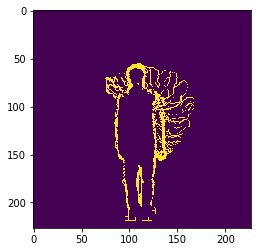

2
a1_s1_t2_depth.mat


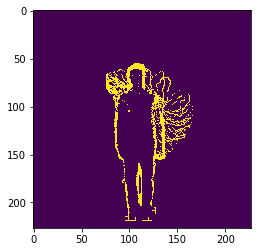

3
a1_s1_t3_depth.mat


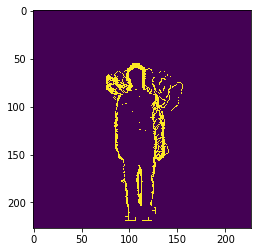

4
a1_s1_t4_depth.mat


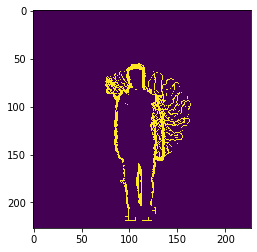

5
a2_s1_t1_depth.mat


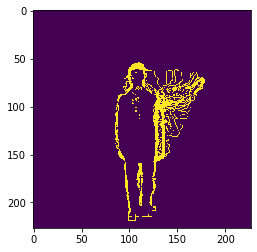

6
a2_s1_t2_depth.mat


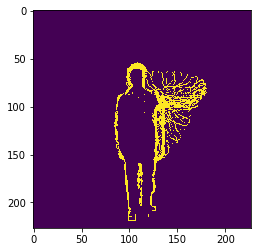

7
a2_s1_t3_depth.mat


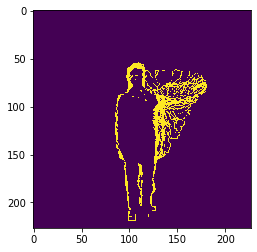

8
a2_s1_t4_depth.mat


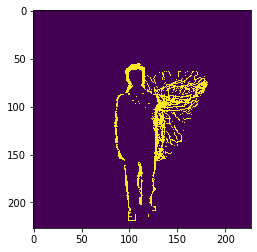

9
a3_s1_t1_depth.mat


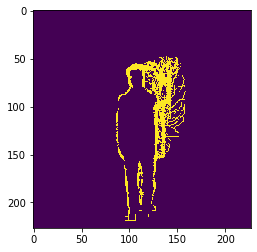

10
a3_s1_t2_depth.mat


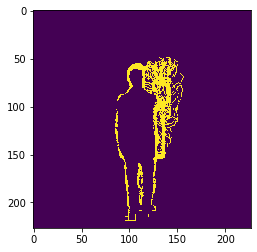

11
a3_s1_t3_depth.mat


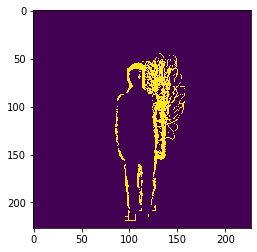

12
a3_s1_t4_depth.mat


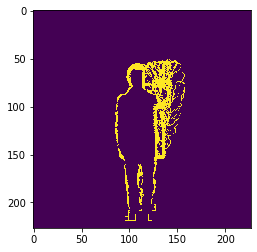

13
a4_s1_t1_depth.mat


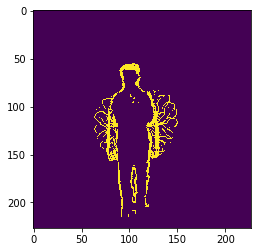

14
a4_s1_t2_depth.mat


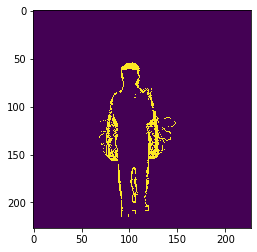

15
a4_s1_t3_depth.mat


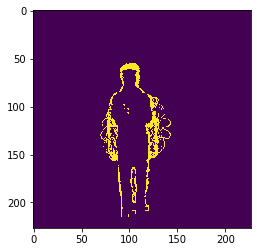

16
a4_s1_t4_depth.mat


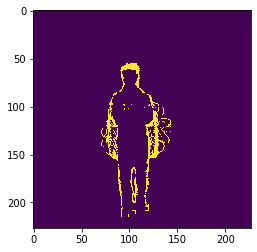

17
a5_s1_t1_depth.mat


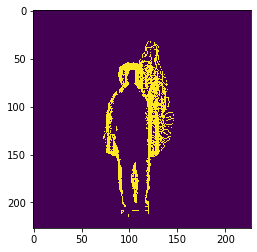

18
a5_s1_t3_depth.mat


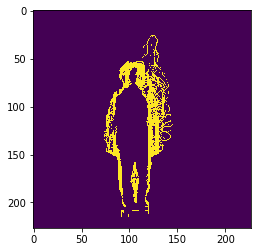

19
a5_s1_t4_depth.mat


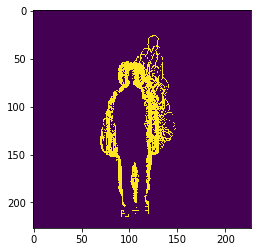

20
a6_s1_t1_depth.mat


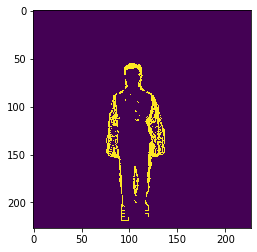

21
a6_s1_t2_depth.mat


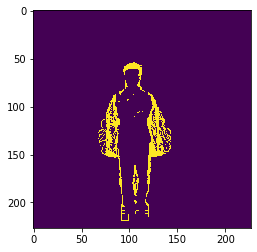

22
a6_s1_t3_depth.mat


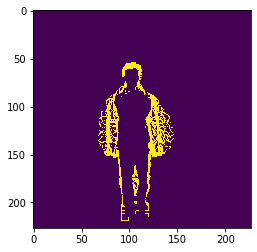

23
a6_s1_t4_depth.mat


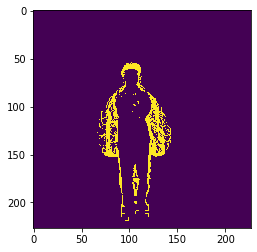

24
a7_s1_t1_depth.mat


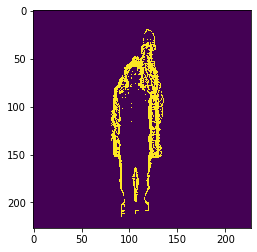

25
a7_s1_t2_depth.mat


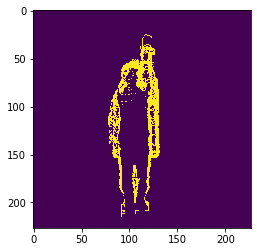

26
a7_s1_t3_depth.mat


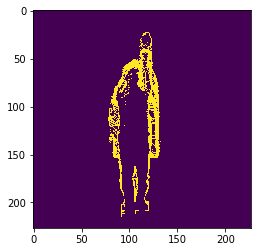

27
a7_s1_t4_depth.mat


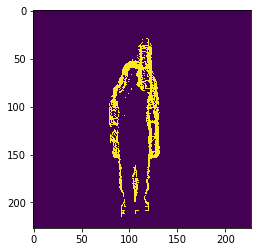

28
a8_s1_t1_depth.mat


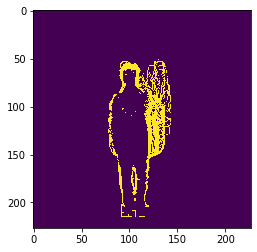

29
a8_s1_t2_depth.mat


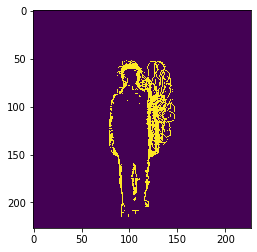

30
a8_s1_t3_depth.mat


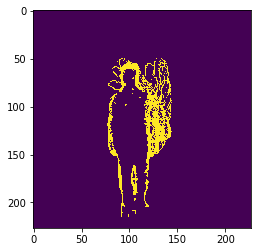

31
a11_s1_t1_depth.mat


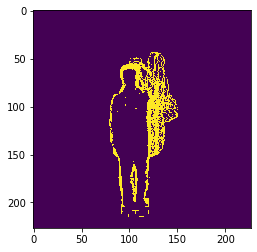

32
a11_s1_t2_depth.mat


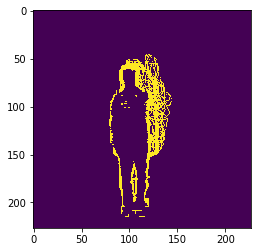

33
a11_s1_t3_depth.mat


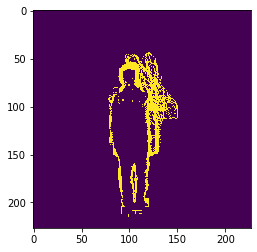

34
a11_s1_t4_depth.mat


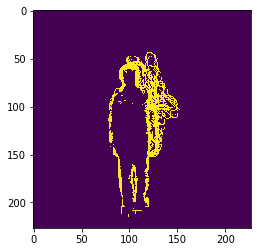

35
a12_s1_t1_depth.mat


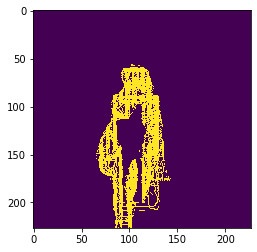

36
a12_s1_t2_depth.mat


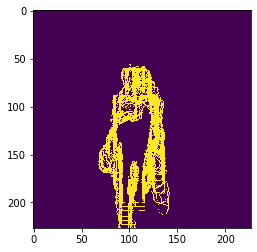

37
a12_s1_t3_depth.mat


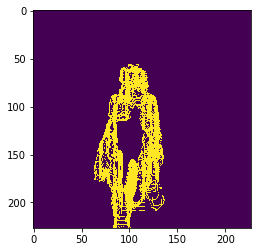

38
a12_s1_t4_depth.mat


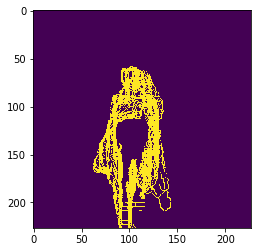

39
a13_s1_t1_depth.mat


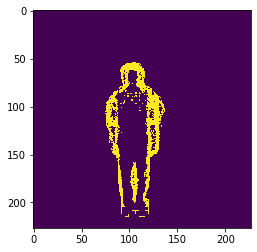

40
a13_s1_t2_depth.mat


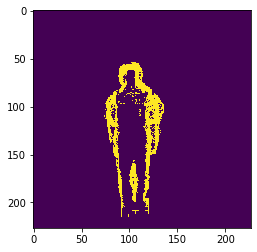

41
a13_s1_t3_depth.mat


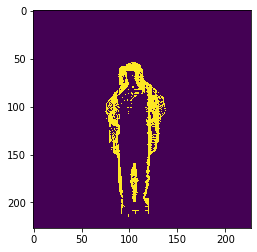

42
a13_s1_t4_depth.mat


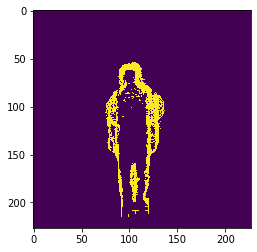

43
a14_s1_t1_depth.mat


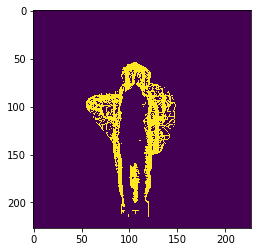

44
a14_s1_t2_depth.mat


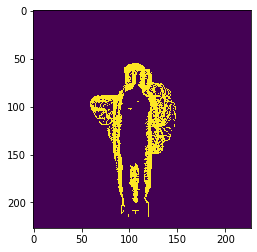

45
a14_s1_t3_depth.mat


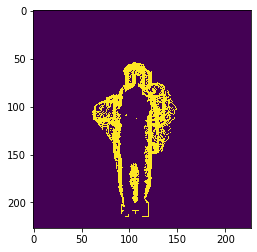

46
a14_s1_t4_depth.mat


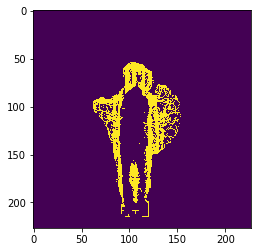

47
a15_s1_t1_depth.mat


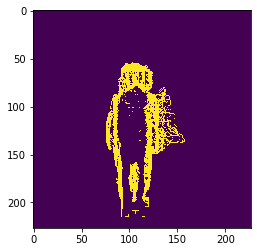

48
a15_s1_t2_depth.mat


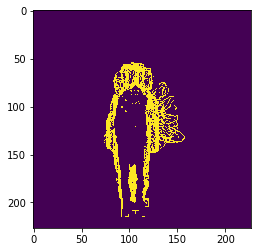

49
a15_s1_t3_depth.mat


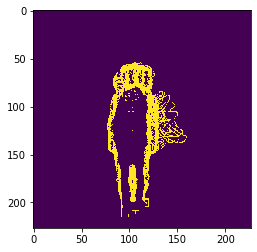

50
a15_s1_t4_depth.mat


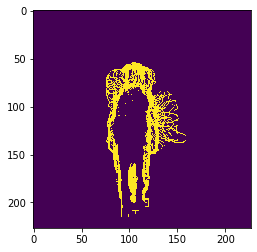

51
a16_s1_t1_depth.mat


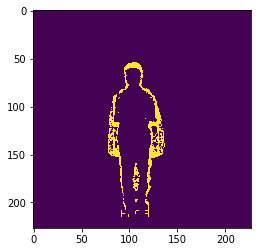

52
a16_s1_t2_depth.mat


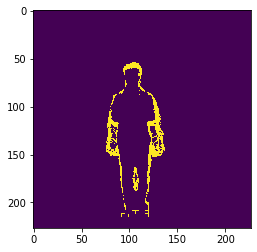

53
a16_s1_t3_depth.mat


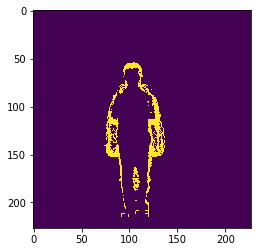

54
a16_s1_t4_depth.mat


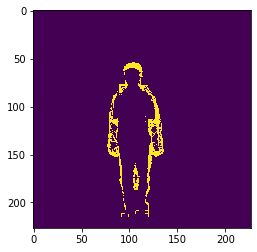

55
a17_s1_t1_depth.mat


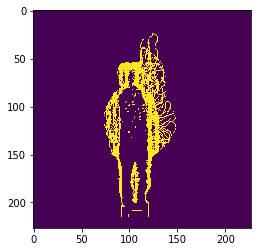

56
a17_s1_t2_depth.mat


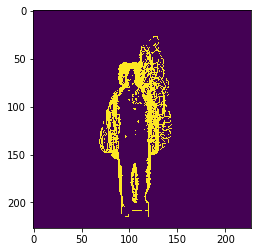

57
a17_s1_t3_depth.mat


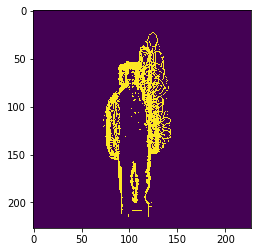

58
a17_s1_t4_depth.mat


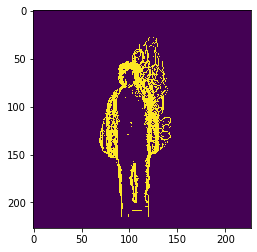

59
a18_s1_t1_depth.mat


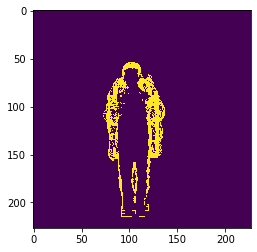

60
a18_s1_t2_depth.mat


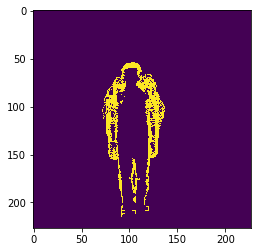

61
a18_s1_t3_depth.mat


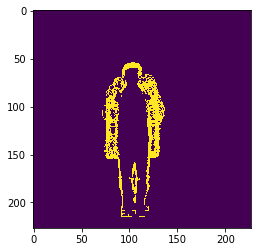

62
a18_s1_t4_depth.mat


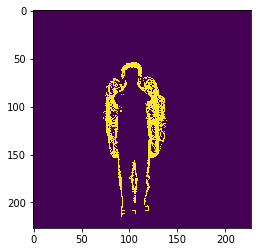

63
a19_s1_t1_depth.mat


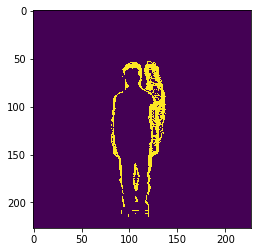

64
a19_s1_t2_depth.mat


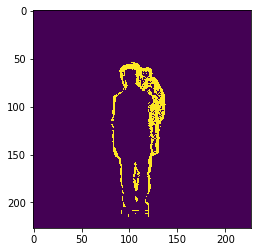

65
a19_s1_t3_depth.mat


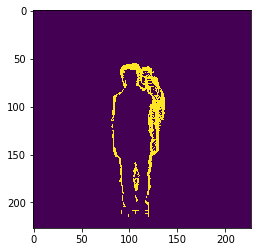

66
a19_s1_t4_depth.mat


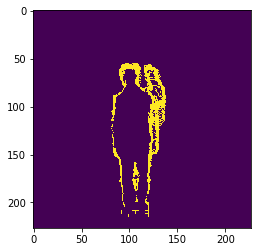

67
a20_s1_t1_depth.mat


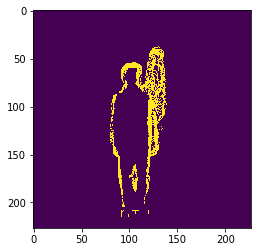

68
a20_s1_t2_depth.mat


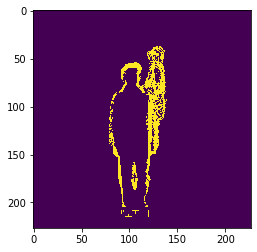

69
a20_s1_t3_depth.mat


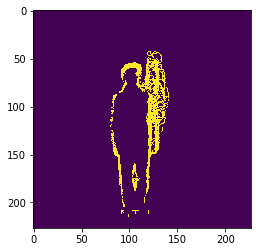

70
a20_s1_t4_depth.mat


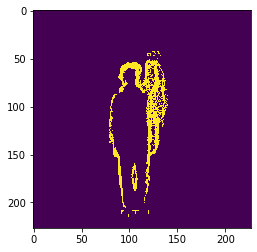

71
a21_s1_t1_depth.mat


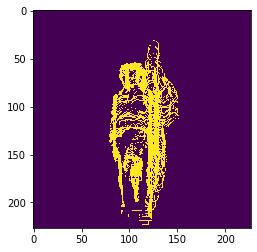

72
a21_s1_t2_depth.mat


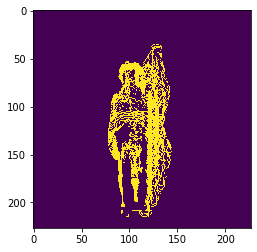

73
a21_s1_t3_depth.mat


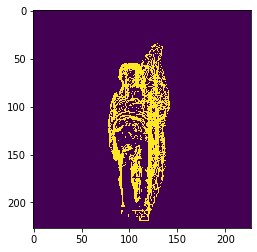

74
a21_s1_t4_depth.mat


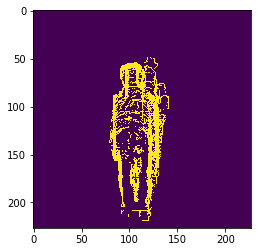

75
a22_s1_t1_depth.mat


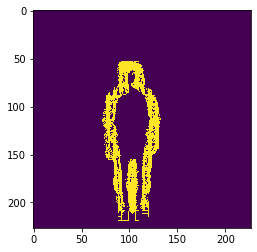

76
a22_s1_t2_depth.mat


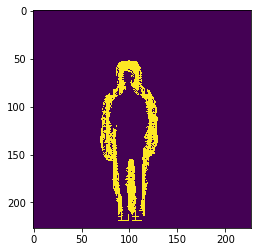

77
a22_s1_t3_depth.mat


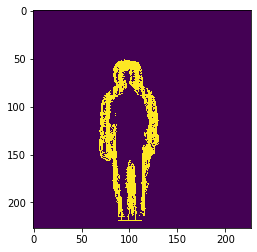

78
a22_s1_t4_depth.mat


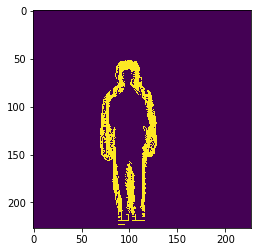

79
a23_s1_t1_depth.mat


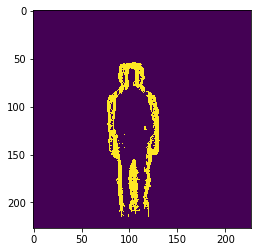

80
a23_s1_t2_depth.mat


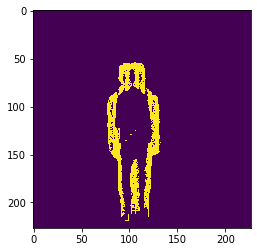

81
a23_s1_t3_depth.mat


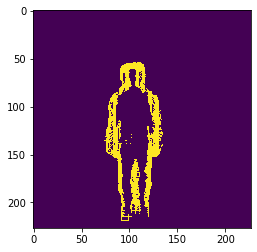

82
a23_s1_t4_depth.mat


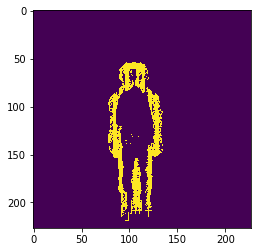

83
a24_s1_t1_depth.mat


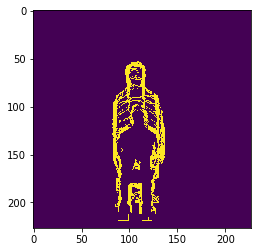

84
a24_s1_t2_depth.mat


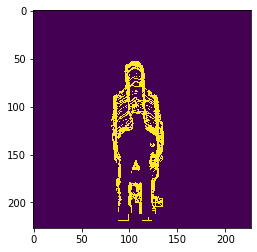

85
a24_s1_t3_depth.mat


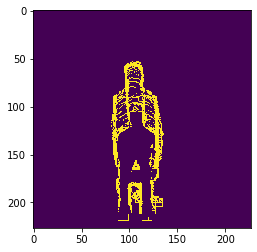

86
a24_s1_t4_depth.mat


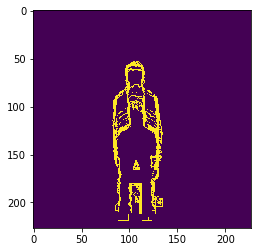

87
a25_s1_t1_depth.mat


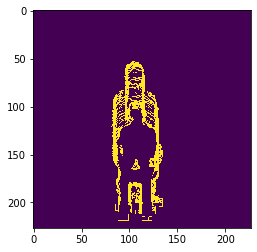

88
a25_s1_t2_depth.mat


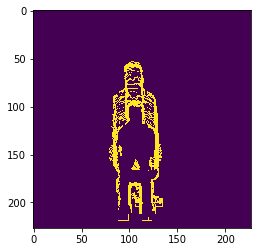

89
a25_s1_t3_depth.mat


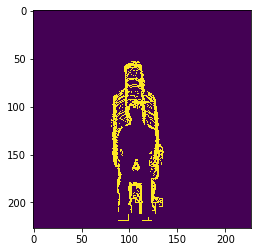

90
a25_s1_t4_depth.mat


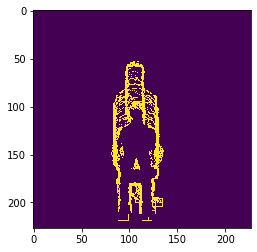

91
a26_s1_t1_depth.mat


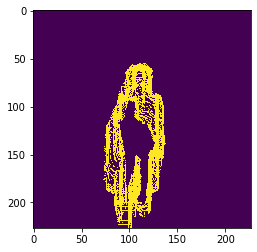

92
a26_s1_t2_depth.mat


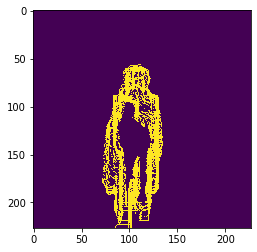

93
a26_s1_t3_depth.mat


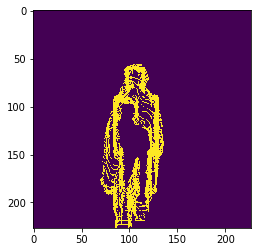

94
a26_s1_t4_depth.mat


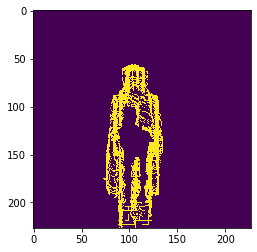

95
a27_s1_t1_depth.mat


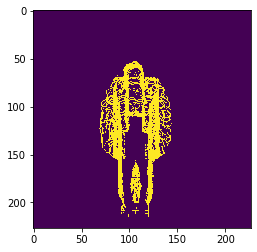

96
a27_s1_t2_depth.mat


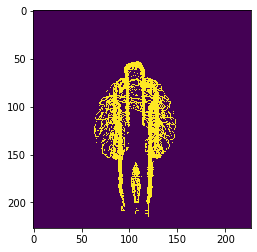

97
a27_s1_t3_depth.mat


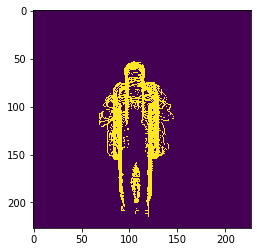

98
a27_s1_t4_depth.mat


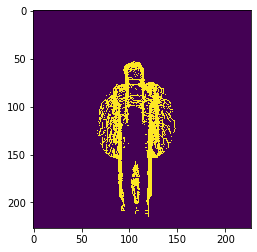

99
a1_s2_t1_depth.mat


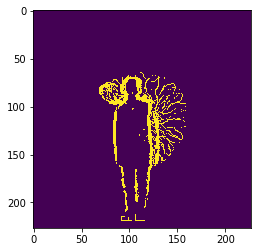

100
a1_s2_t2_depth.mat


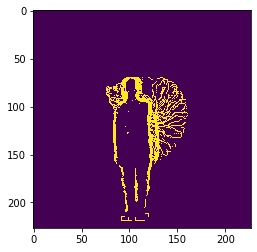

101
a1_s2_t3_depth.mat


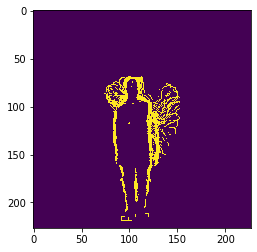

102
a1_s2_t4_depth.mat


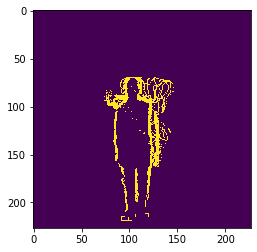

103
a2_s2_t1_depth.mat


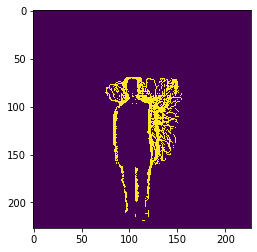

104
a2_s2_t2_depth.mat


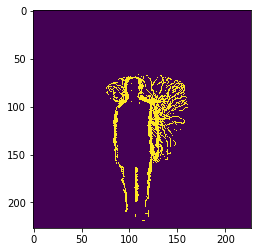

105
a2_s2_t3_depth.mat


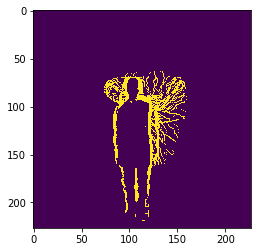

106
a2_s2_t4_depth.mat


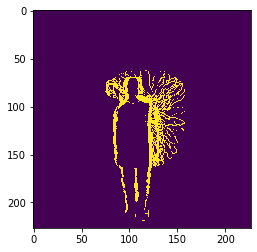

107
a3_s2_t1_depth.mat


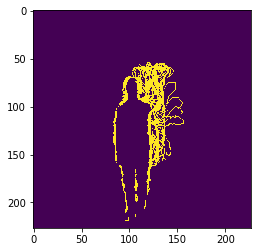

108
a3_s2_t2_depth.mat


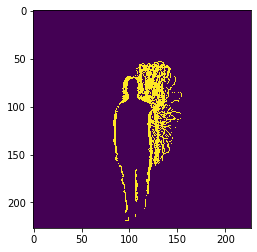

109
a3_s2_t3_depth.mat


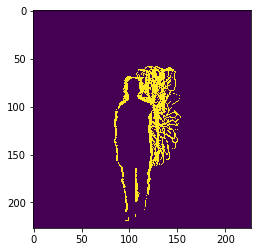

110
a3_s2_t4_depth.mat


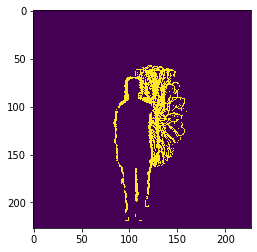

111
a4_s2_t1_depth.mat


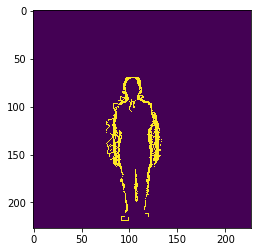

112
a4_s2_t2_depth.mat


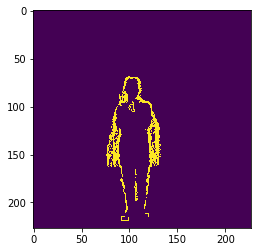

113
a4_s2_t3_depth.mat


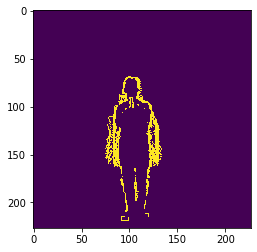

114
a4_s2_t4_depth.mat


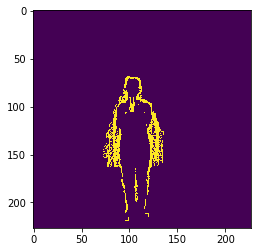

115
a5_s2_t1_depth.mat


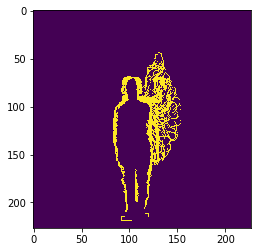

116
a5_s2_t2_depth.mat


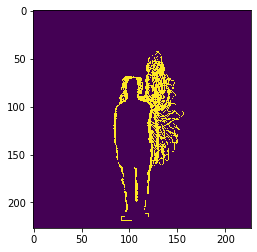

117
a5_s2_t3_depth.mat


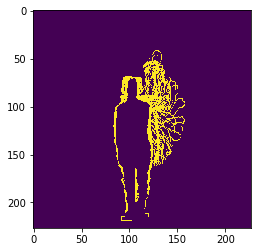

118
a5_s2_t4_depth.mat


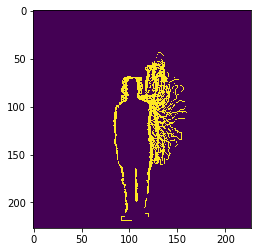

119
a6_s2_t1_depth.mat


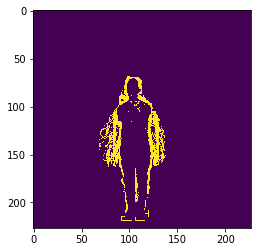

120
a6_s2_t2_depth.mat


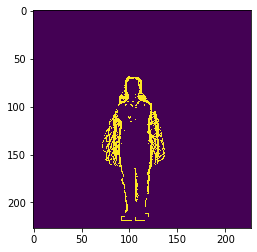

121
a6_s2_t3_depth.mat


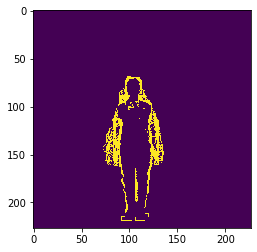

122
a6_s2_t4_depth.mat


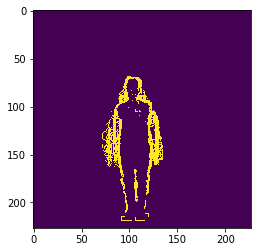

123
a7_s2_t1_depth.mat


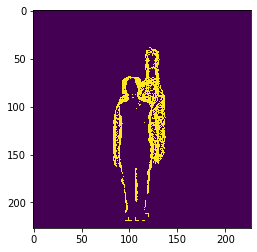

124
a7_s2_t2_depth.mat


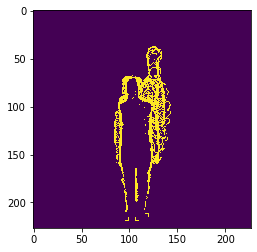

125
a7_s2_t3_depth.mat


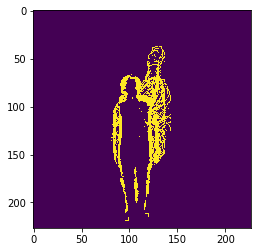

126
a7_s2_t4_depth.mat


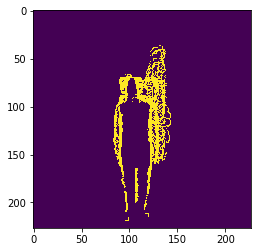

127
a8_s2_t1_depth.mat


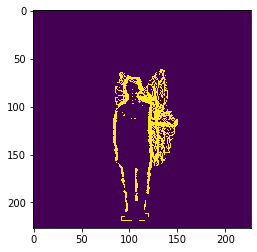

128
a8_s2_t2_depth.mat


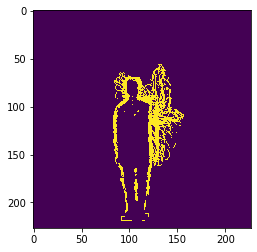

129
a8_s2_t3_depth.mat


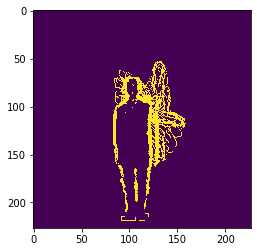

130
a8_s2_t4_depth.mat


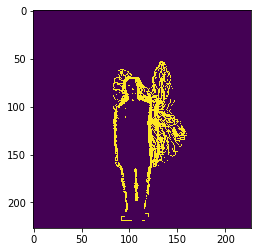

131
a9_s2_t1_depth.mat


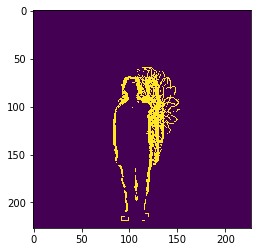

132
a9_s2_t2_depth.mat


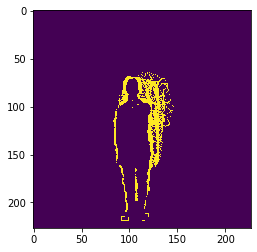

133
a9_s2_t3_depth.mat


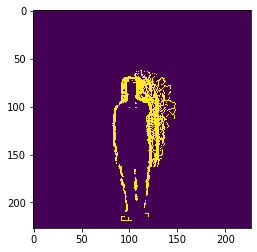

134
a9_s2_t4_depth.mat


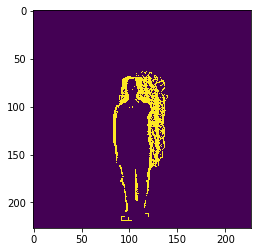

135
a10_s2_t1_depth.mat


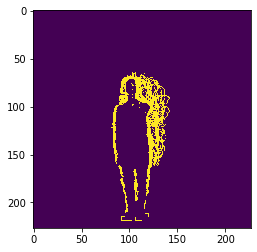

136
a10_s2_t2_depth.mat


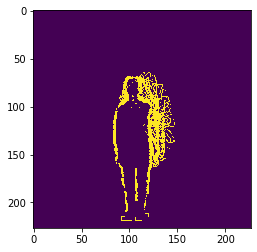

137
a10_s2_t3_depth.mat


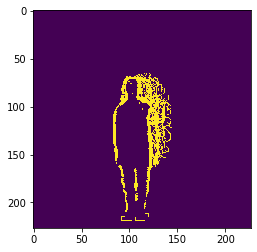

138
a10_s2_t4_depth.mat


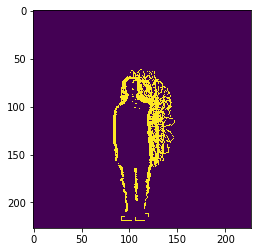

139
a11_s2_t1_depth.mat


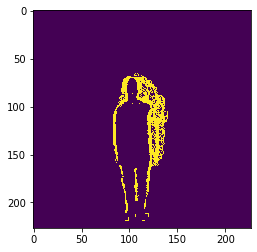

140
a11_s2_t2_depth.mat


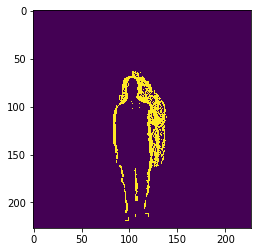

141
a11_s2_t3_depth.mat


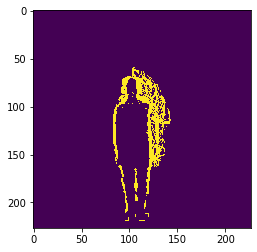

142
a11_s2_t4_depth.mat


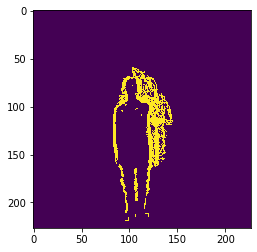

143
a12_s2_t1_depth.mat


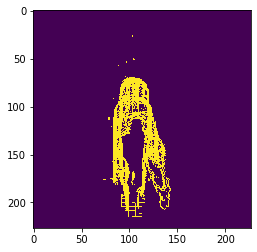

144
a12_s2_t2_depth.mat


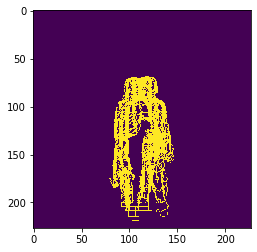

145
a12_s2_t3_depth.mat


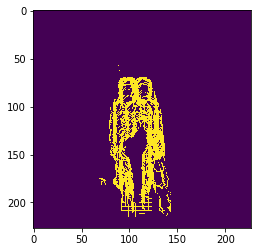

146
a12_s2_t4_depth.mat


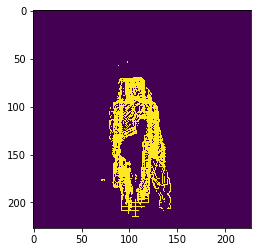

147
a13_s2_t1_depth.mat


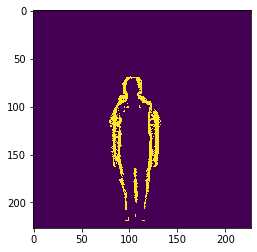

148
a13_s2_t2_depth.mat


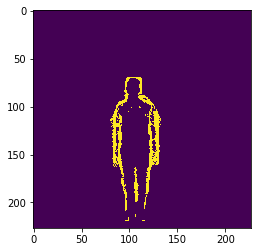

149
a13_s2_t3_depth.mat


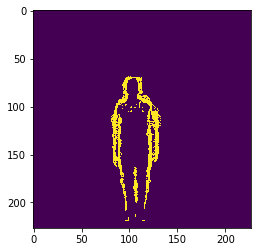

150
a13_s2_t4_depth.mat


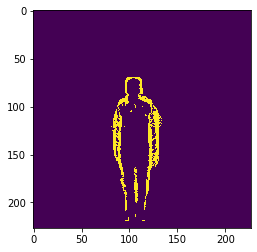

151
a14_s2_t1_depth.mat


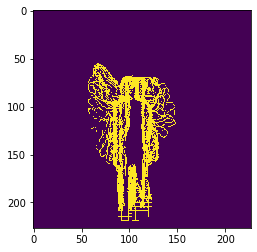

152
a14_s2_t2_depth.mat


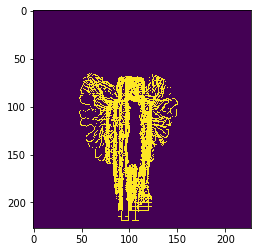

153
a14_s2_t3_depth.mat


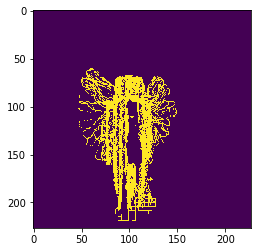

154
a14_s2_t4_depth.mat


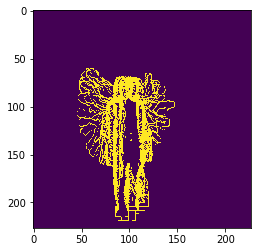

155
a15_s2_t1_depth.mat


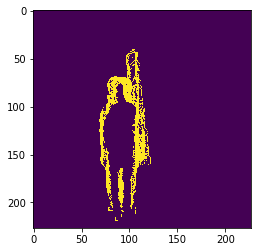

156
a15_s2_t2_depth.mat


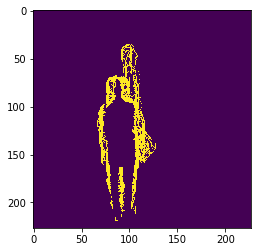

157
a15_s2_t3_depth.mat


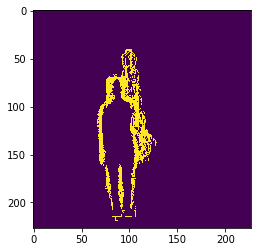

158
a15_s2_t4_depth.mat


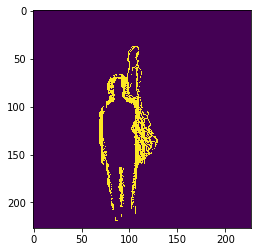

159
a16_s2_t1_depth.mat


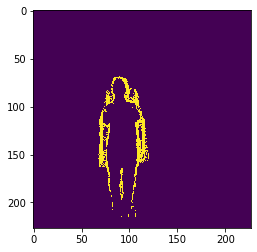

160
a16_s2_t2_depth.mat


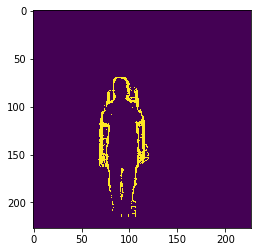

161
a16_s2_t3_depth.mat


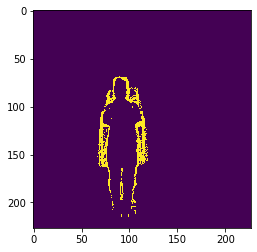

162
a16_s2_t4_depth.mat


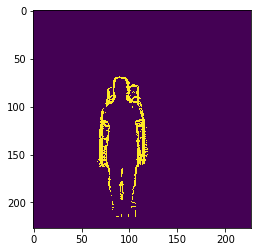

163
a17_s2_t1_depth.mat


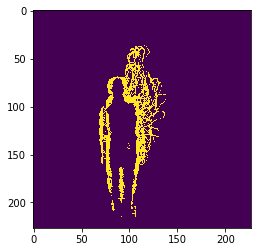

164
a17_s2_t2_depth.mat


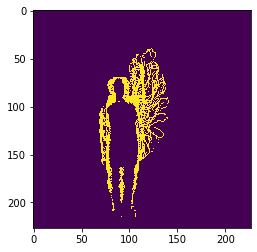

165
a17_s2_t3_depth.mat


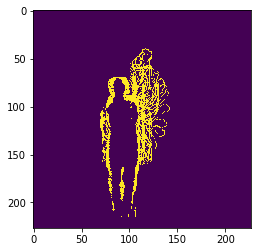

166
a17_s2_t4_depth.mat


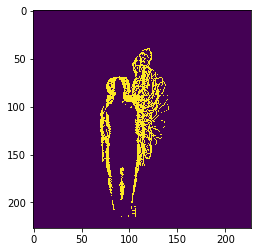

167
a18_s2_t1_depth.mat


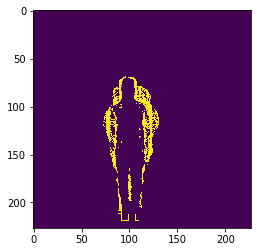

168
a18_s2_t2_depth.mat


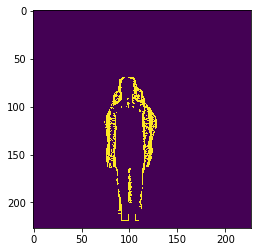

169
a18_s2_t3_depth.mat


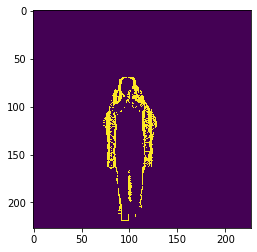

170
a18_s2_t4_depth.mat


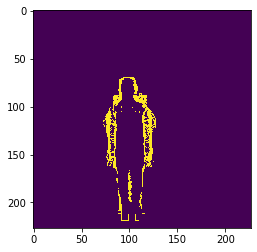

171
a19_s2_t1_depth.mat


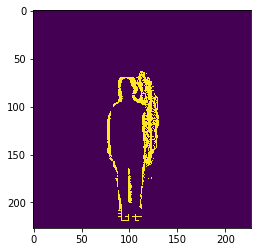

172
a19_s2_t2_depth.mat


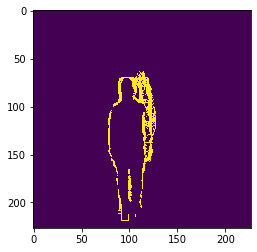

173
a19_s2_t3_depth.mat


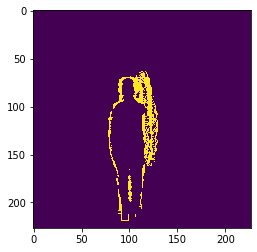

174
a19_s2_t4_depth.mat


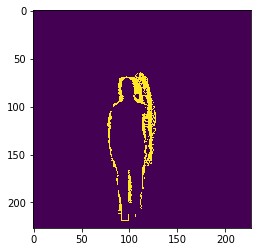

175
a20_s2_t1_depth.mat


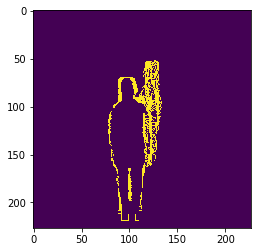

176
a20_s2_t2_depth.mat


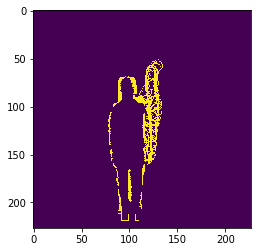

177
a20_s2_t3_depth.mat


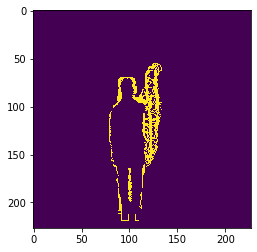

178
a20_s2_t4_depth.mat


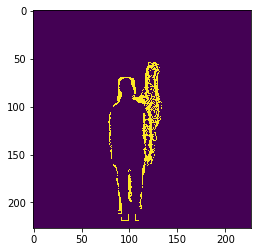

179
a21_s2_t1_depth.mat


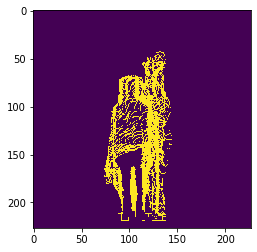

180
a21_s2_t2_depth.mat


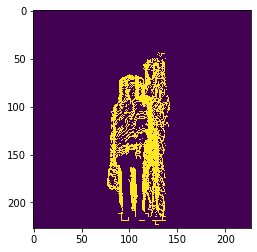

181
a21_s2_t3_depth.mat


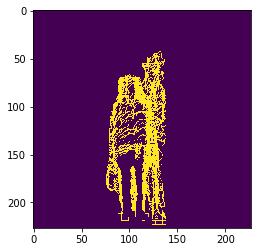

182
a21_s2_t4_depth.mat


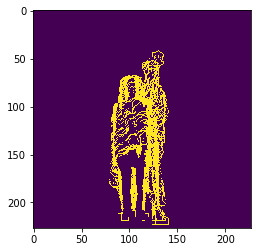

183
a22_s2_t1_depth.mat


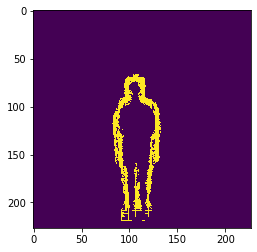

184
a22_s2_t2_depth.mat


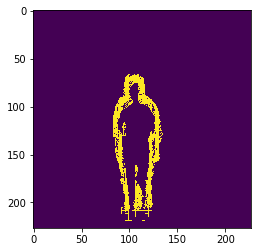

185
a22_s2_t3_depth.mat


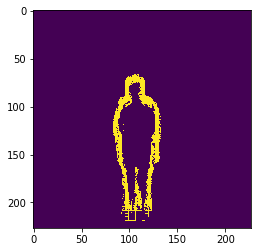

186
a22_s2_t4_depth.mat


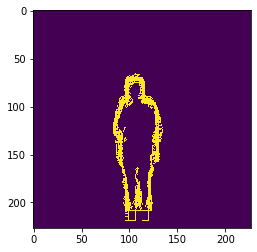

187
a23_s2_t1_depth.mat


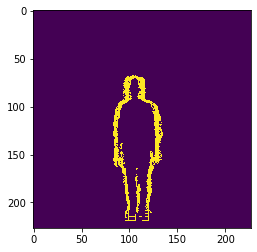

188
a23_s2_t2_depth.mat


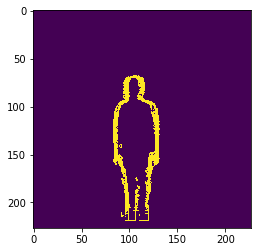

189
a23_s2_t3_depth.mat


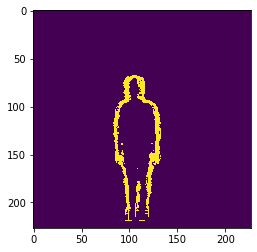

190
a23_s2_t4_depth.mat


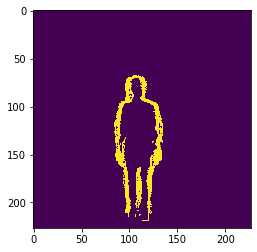

191
a24_s2_t1_depth.mat


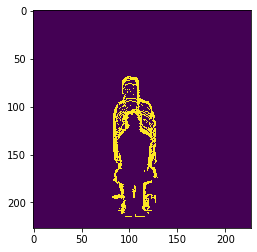

192
a24_s2_t2_depth.mat


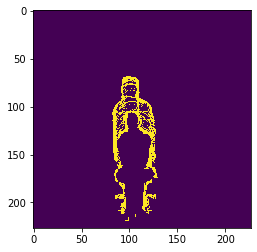

193
a24_s2_t3_depth.mat


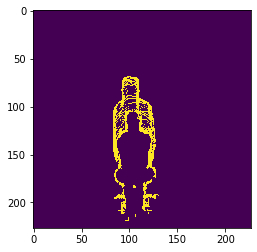

194
a24_s2_t4_depth.mat


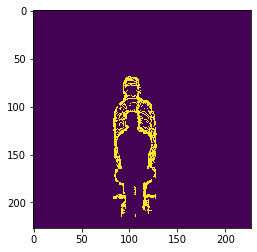

195
a25_s2_t1_depth.mat


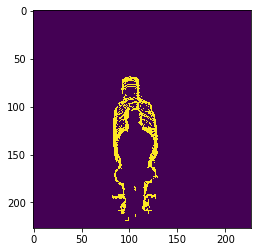

196
a25_s2_t2_depth.mat


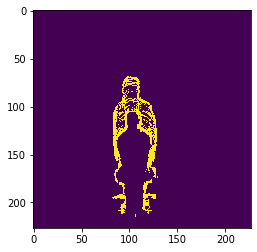

197
a25_s2_t3_depth.mat


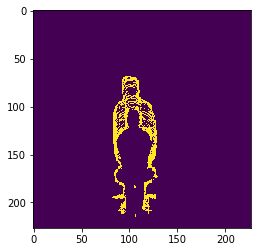

198
a25_s2_t4_depth.mat


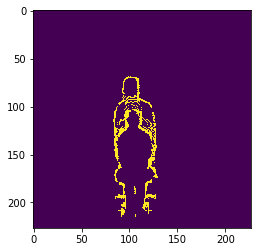

199
a26_s2_t1_depth.mat


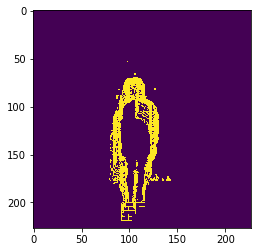

200
a26_s2_t2_depth.mat


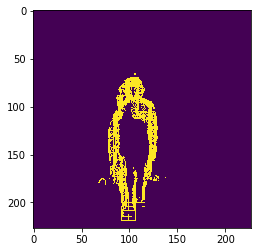

201
a26_s2_t3_depth.mat


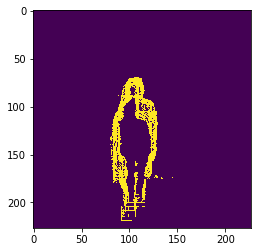

202
a26_s2_t4_depth.mat


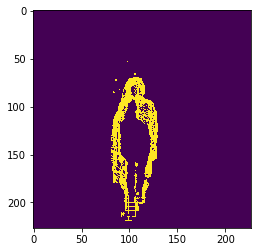

203
a27_s2_t1_depth.mat


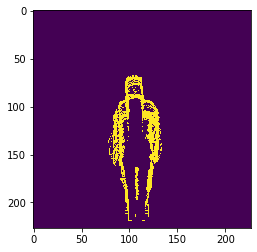

204
a27_s2_t2_depth.mat


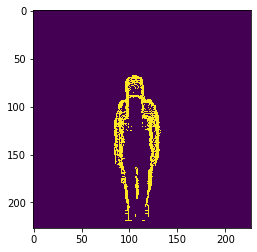

205
a27_s2_t3_depth.mat


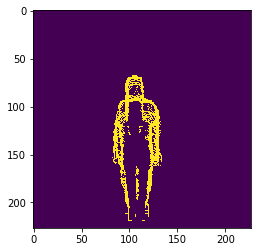

206
a27_s2_t4_depth.mat


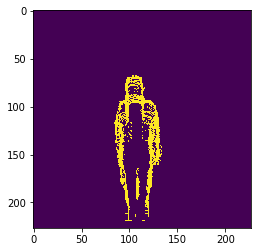

207
a2_s7_t1_depth.mat


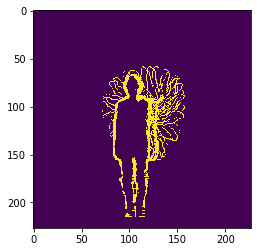

208
a2_s7_t2_depth.mat


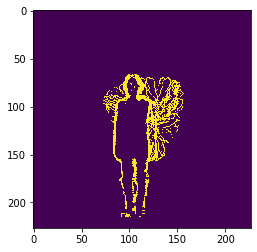

209
a2_s7_t3_depth.mat


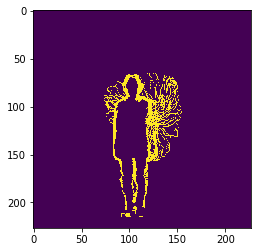

210
a2_s7_t4_depth.mat


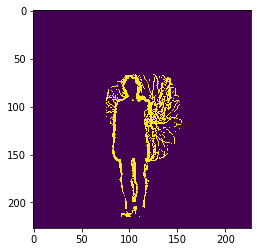

211
a3_s7_t1_depth.mat


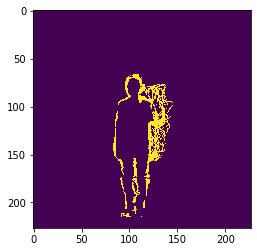

212
a3_s7_t2_depth.mat


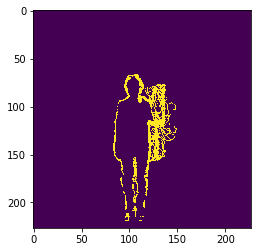

213
a3_s7_t3_depth.mat


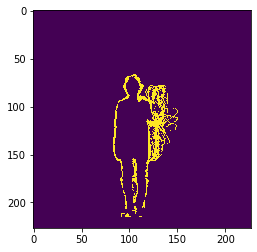

214
a3_s7_t4_depth.mat


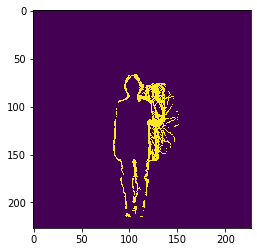

215
a4_s7_t1_depth.mat


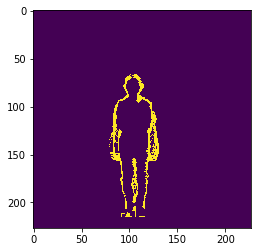

216
a4_s7_t2_depth.mat


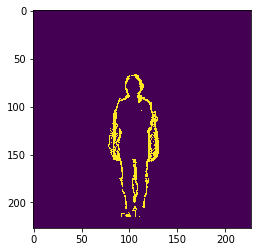

217
a4_s7_t3_depth.mat


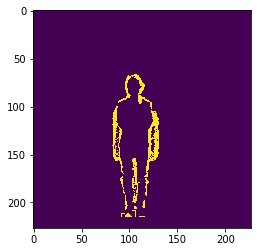

218
a4_s7_t4_depth.mat


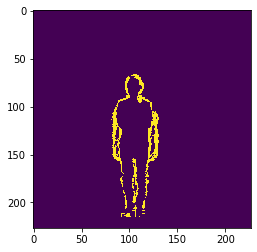

219
a1_s7_t1_depth.mat


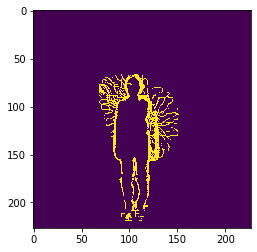

220
a1_s7_t2_depth.mat


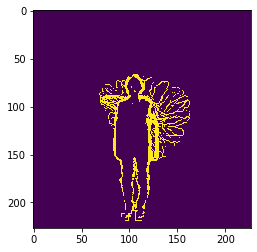

221
a1_s7_t3_depth.mat


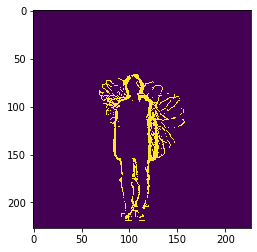

222
a1_s7_t4_depth.mat


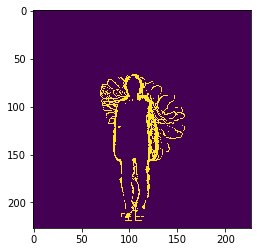

223
a5_s7_t1_depth.mat


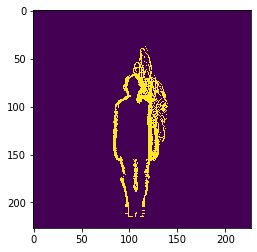

224
a5_s7_t2_depth.mat


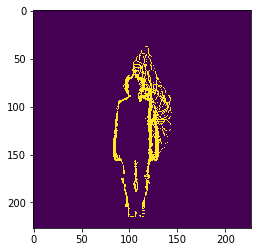

225
a5_s7_t3_depth.mat


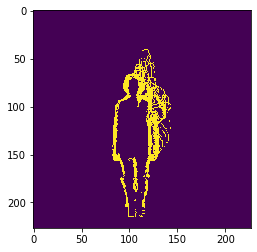

226
a5_s7_t4_depth.mat


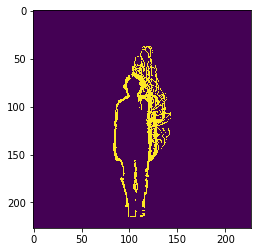

227
a6_s7_t1_depth.mat


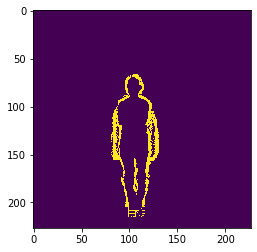

228
a6_s7_t2_depth.mat


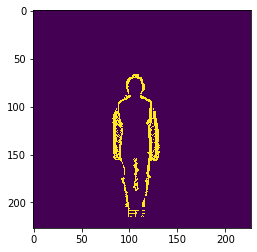

229
a6_s7_t3_depth.mat


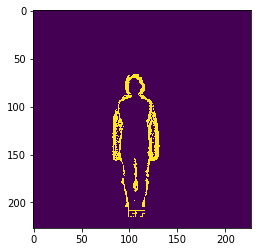

230
a6_s7_t4_depth.mat


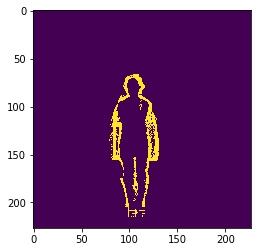

231
a7_s7_t1_depth.mat


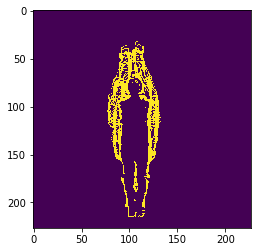

232
a7_s7_t2_depth.mat


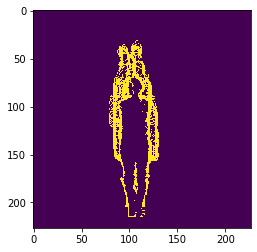

233
a7_s7_t3_depth.mat


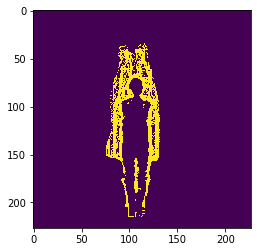

234
a7_s7_t4_depth.mat


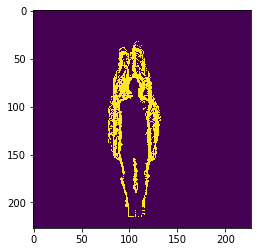

235
a8_s7_t1_depth.mat


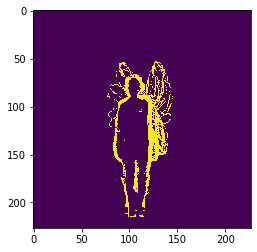

236
a8_s7_t2_depth.mat


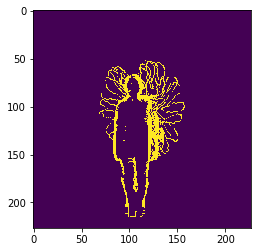

237
a8_s7_t3_depth.mat


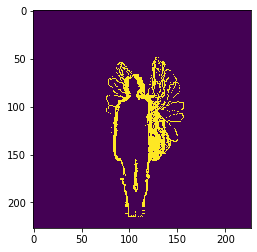

238
a8_s7_t4_depth.mat


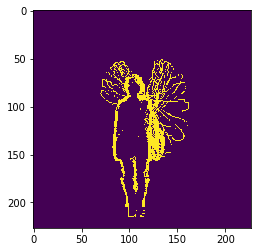

239
a9_s7_t1_depth.mat


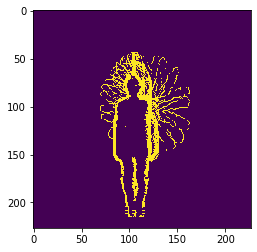

240
a9_s7_t2_depth.mat


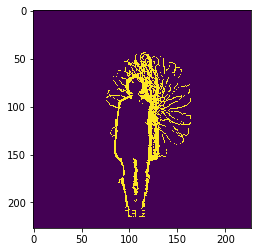

241
a9_s7_t3_depth.mat


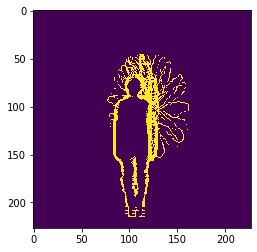

242
a9_s7_t4_depth.mat


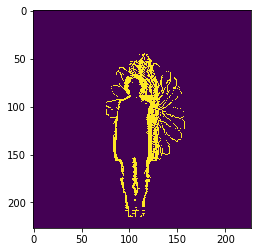

243
a10_s7_t1_depth.mat


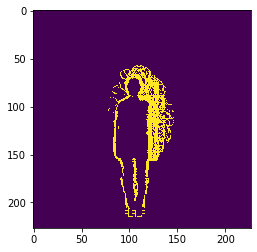

244
a10_s7_t2_depth.mat


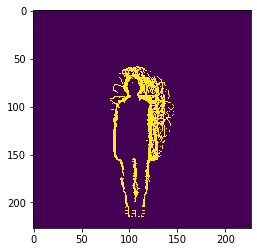

245
a10_s7_t3_depth.mat


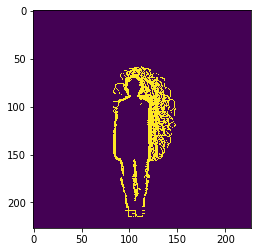

246
a10_s7_t4_depth.mat


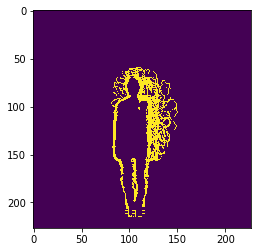

247
a11_s7_t1_depth.mat


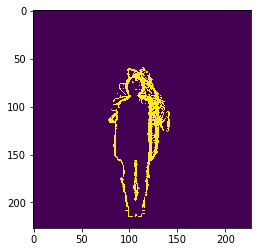

248
a11_s7_t2_depth.mat


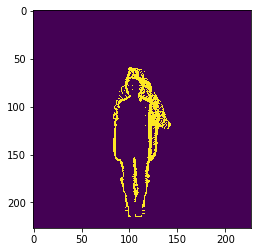

249
a11_s7_t3_depth.mat


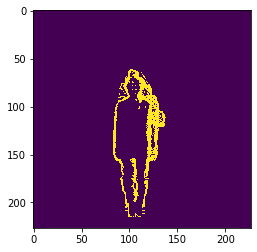

250
a11_s7_t4_depth.mat


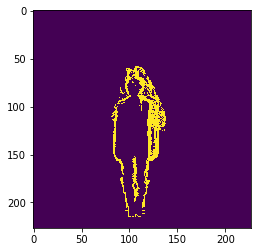

251
a12_s7_t1_depth.mat


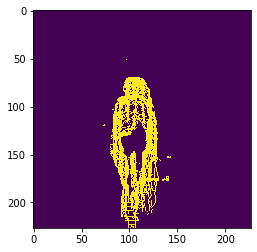

252
a12_s7_t2_depth.mat


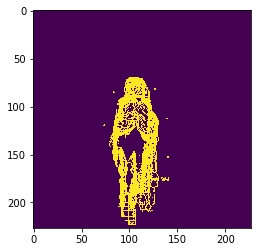

253
a12_s7_t3_depth.mat


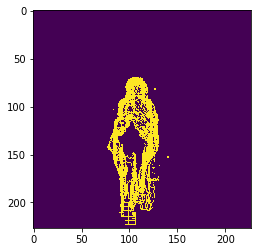

254
a12_s7_t4_depth.mat


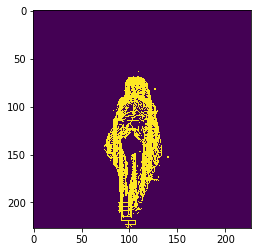

255
a13_s7_t1_depth.mat


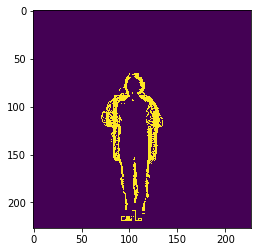

256
a13_s7_t2_depth.mat


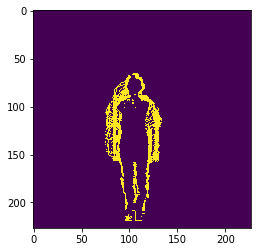

257
a13_s7_t3_depth.mat


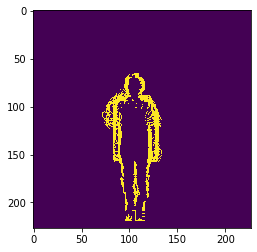

258
a13_s7_t4_depth.mat


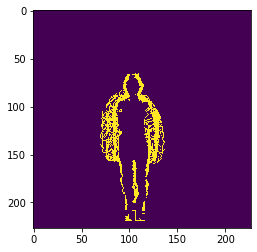

259
a14_s7_t1_depth.mat


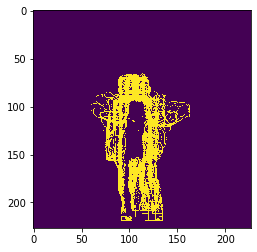

260
a14_s7_t2_depth.mat


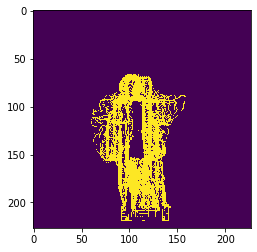

261
a14_s7_t3_depth.mat


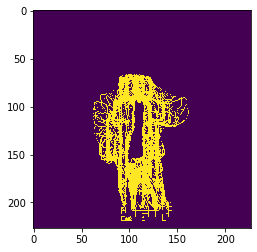

262
a14_s7_t4_depth.mat


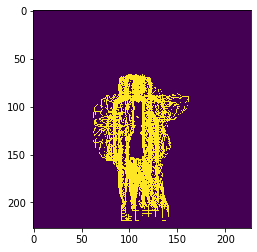

263
a15_s7_t1_depth.mat


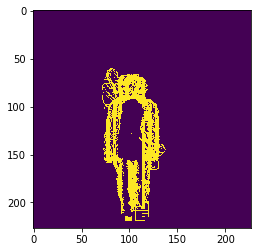

264
a15_s7_t2_depth.mat


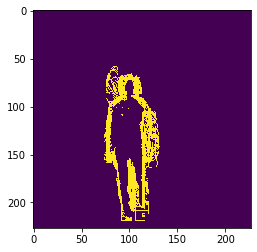

265
a15_s7_t3_depth.mat


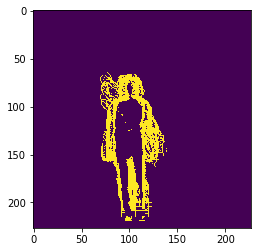

266
a15_s7_t4_depth.mat


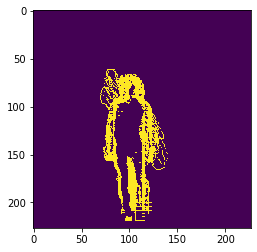

267
a16_s7_t1_depth.mat


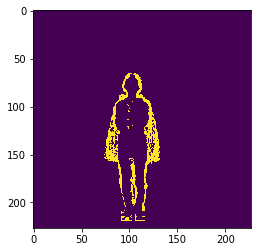

268
a16_s7_t2_depth.mat


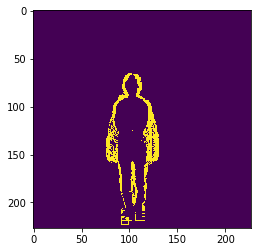

269
a16_s7_t3_depth.mat


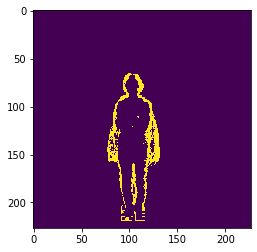

270
a16_s7_t4_depth.mat


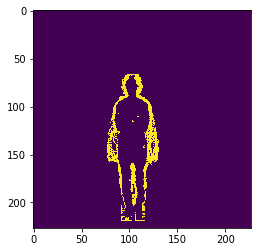

271
a17_s7_t1_depth.mat


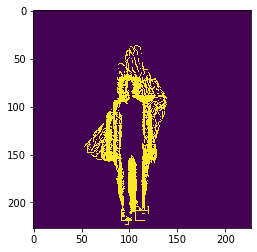

272
a17_s7_t2_depth.mat


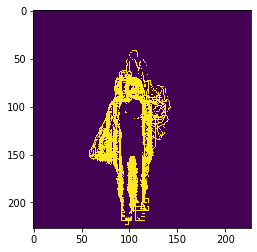

273
a17_s7_t3_depth.mat


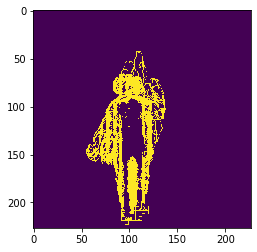

274
a17_s7_t4_depth.mat


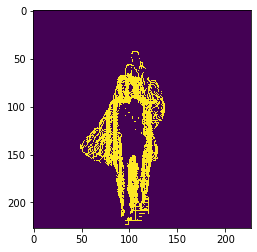

275
a18_s7_t1_depth.mat


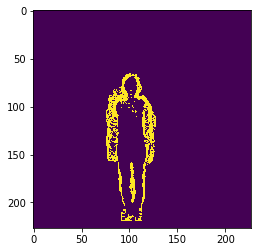

276
a18_s7_t2_depth.mat


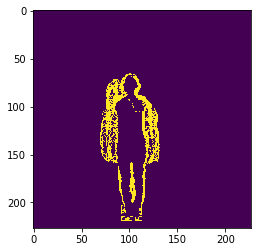

277
a18_s7_t3_depth.mat


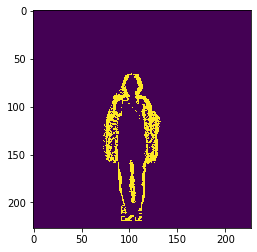

278
a18_s7_t4_depth.mat


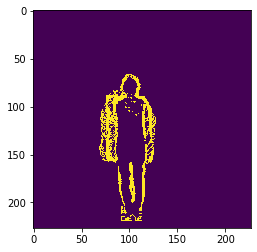

279
a19_s7_t1_depth.mat


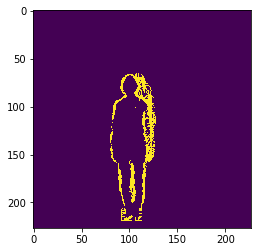

280
a19_s7_t2_depth.mat


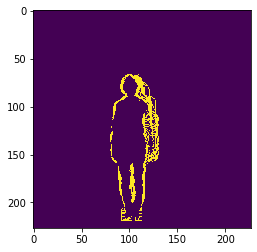

281
a19_s7_t3_depth.mat


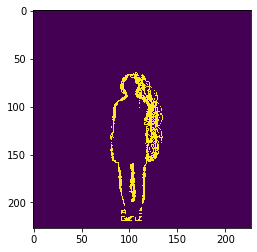

282
a19_s7_t4_depth.mat


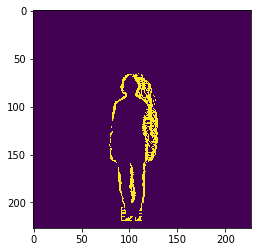

283
a20_s7_t1_depth.mat


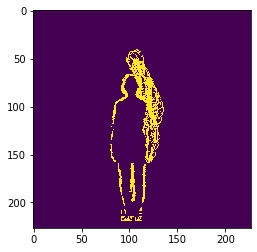

284
a20_s7_t2_depth.mat


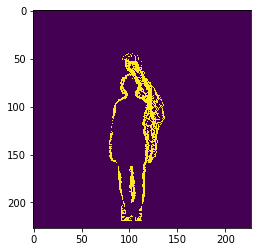

285
a20_s7_t3_depth.mat


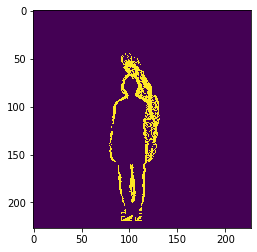

286
a20_s7_t4_depth.mat


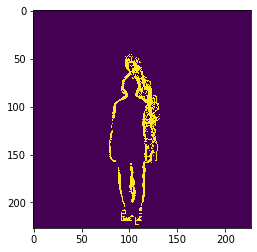

287
a21_s7_t1_depth.mat


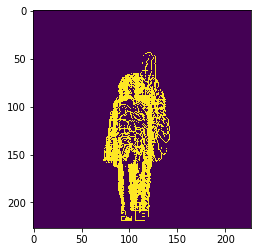

288
a21_s7_t2_depth.mat


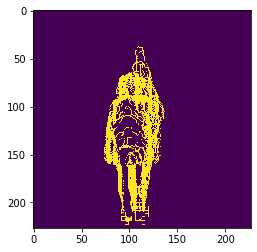

289
a21_s7_t3_depth.mat


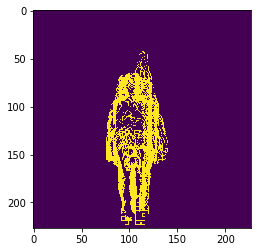

290
a21_s7_t4_depth.mat


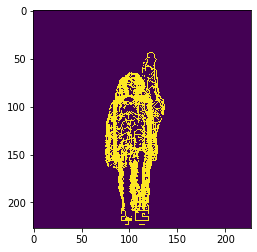

291
a22_s7_t1_depth.mat


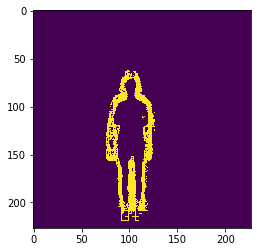

292
a22_s7_t2_depth.mat


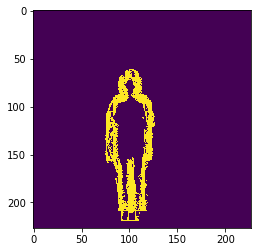

293
a22_s7_t3_depth.mat


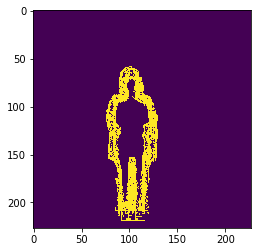

294
a22_s7_t4_depth.mat


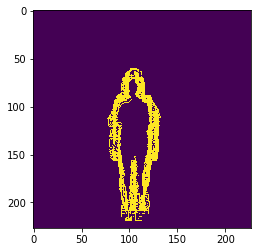

295
a23_s7_t1_depth.mat


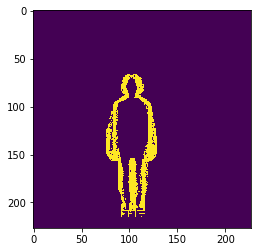

296
a23_s7_t2_depth.mat


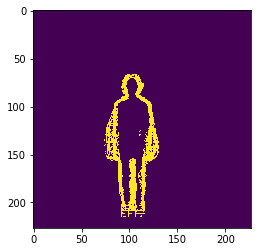

297
a23_s7_t3_depth.mat


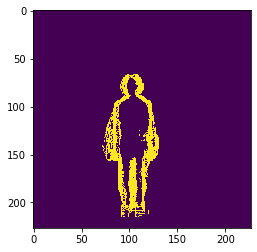

298
a23_s7_t4_depth.mat


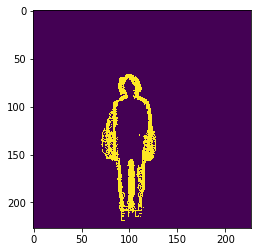

299
a24_s7_t1_depth.mat


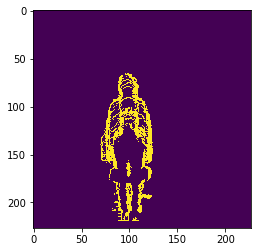

300
a24_s7_t2_depth.mat


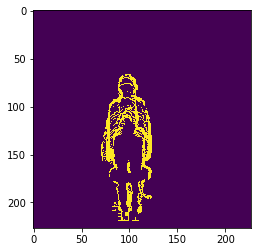

301
a24_s7_t3_depth.mat


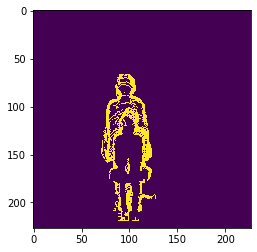

302
a24_s7_t4_depth.mat


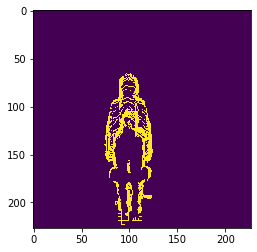

303
a25_s7_t1_depth.mat


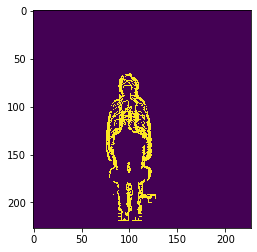

304
a25_s7_t2_depth.mat


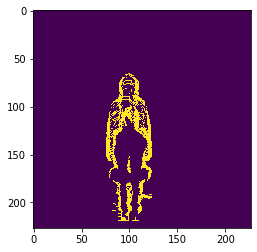

305
a25_s7_t3_depth.mat


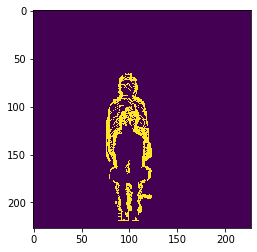

306
a25_s7_t4_depth.mat


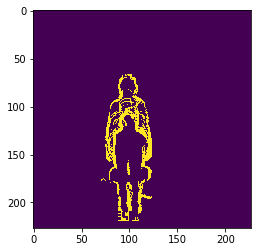

307
a26_s7_t1_depth.mat


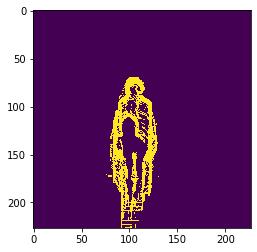

308
a26_s7_t2_depth.mat


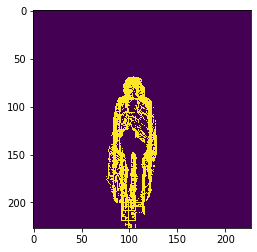

309
a26_s7_t3_depth.mat


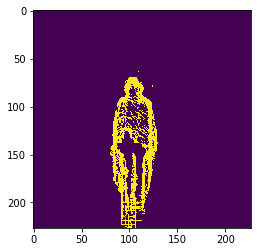

310
a26_s7_t4_depth.mat


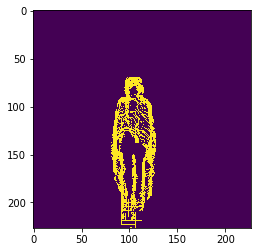

311
a27_s7_t1_depth.mat


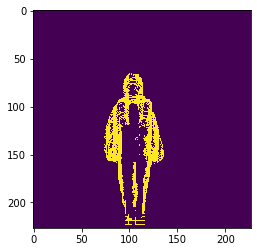

312
a27_s7_t2_depth.mat


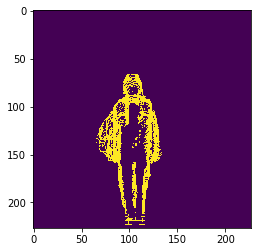

313
a27_s7_t3_depth.mat


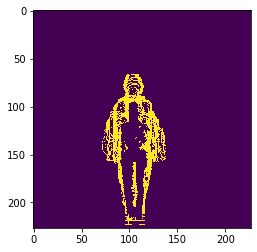

314
a27_s7_t4_depth.mat


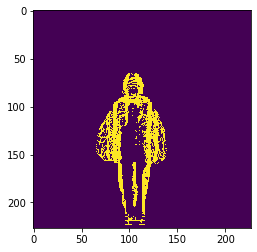

315
a1_s8_t1_depth.mat


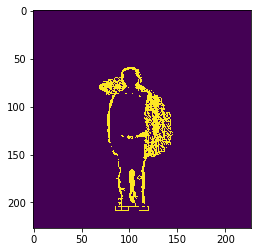

316
a1_s8_t2_depth.mat


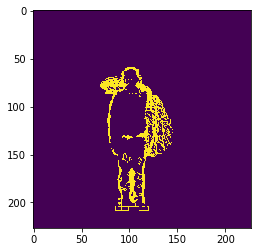

317
a1_s8_t3_depth.mat


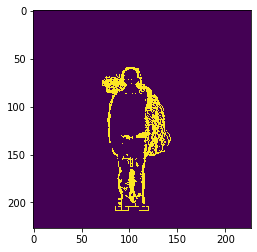

318
a1_s8_t4_depth.mat


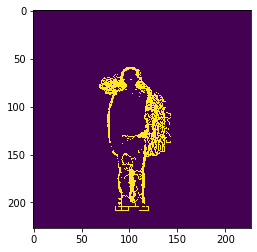

319
a2_s8_t1_depth.mat


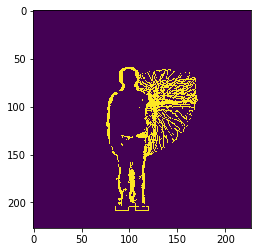

320
a2_s8_t2_depth.mat


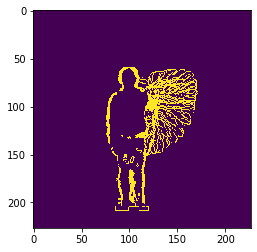

321
a2_s8_t3_depth.mat


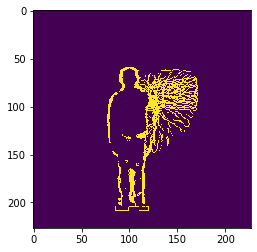

322
a2_s8_t4_depth.mat


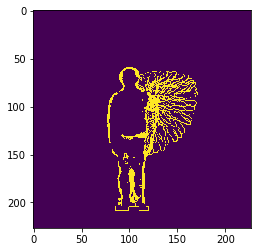

323
a3_s8_t1_depth.mat


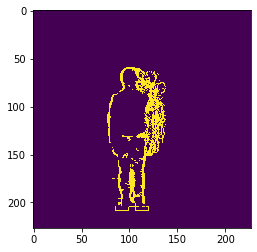

324
a3_s8_t2_depth.mat


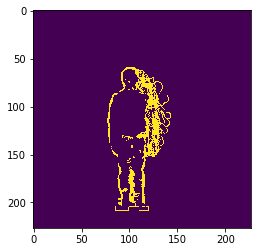

325
a3_s8_t3_depth.mat


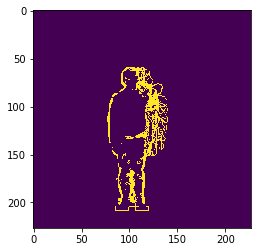

326
a3_s8_t4_depth.mat


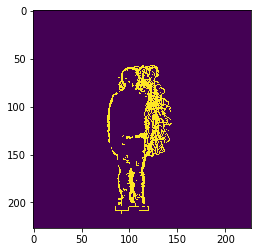

327
a4_s8_t1_depth.mat


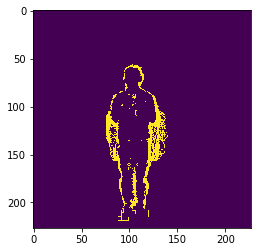

328
a4_s8_t2_depth.mat


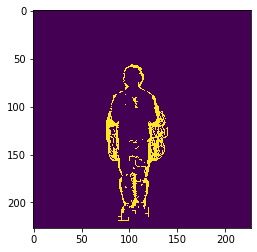

329
a4_s8_t3_depth.mat


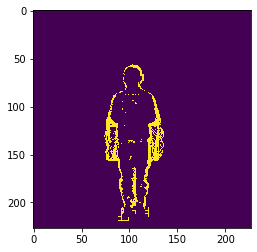

330
a4_s8_t4_depth.mat


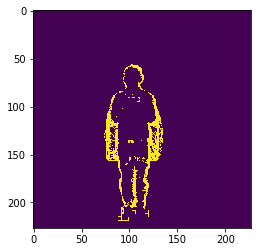

331
a5_s8_t1_depth.mat


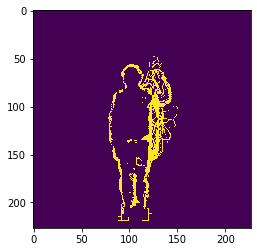

332
a5_s8_t2_depth.mat


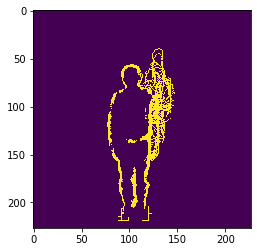

333
a5_s8_t3_depth.mat


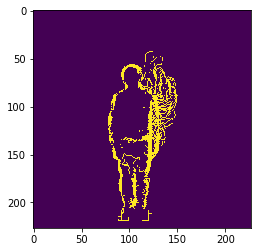

334
a5_s8_t4_depth.mat


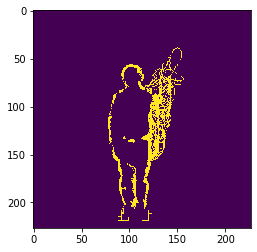

335
a6_s8_t1_depth.mat


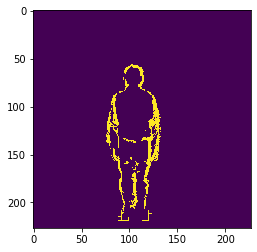

336
a6_s8_t2_depth.mat


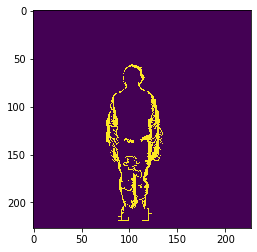

337
a6_s8_t3_depth.mat


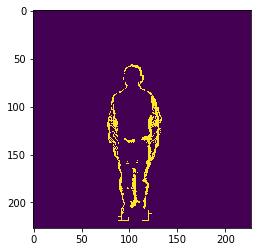

338
a6_s8_t4_depth.mat


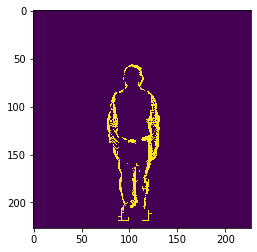

339
a7_s8_t1_depth.mat


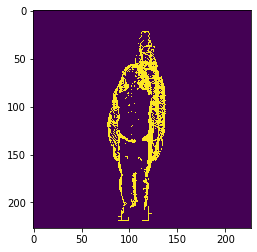

340
a7_s8_t2_depth.mat


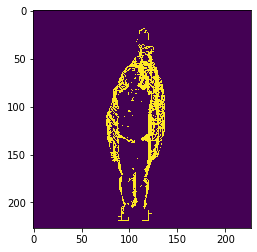

341
a7_s8_t3_depth.mat


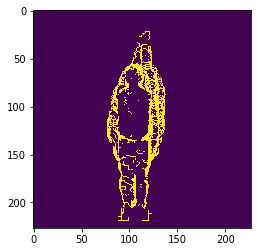

342
a7_s8_t4_depth.mat


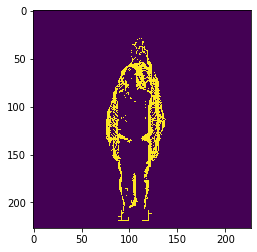

343
a8_s8_t1_depth.mat


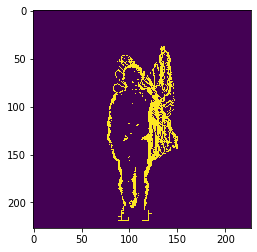

344
a8_s8_t2_depth.mat


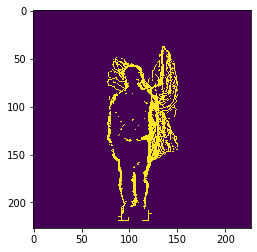

345
a8_s8_t3_depth.mat


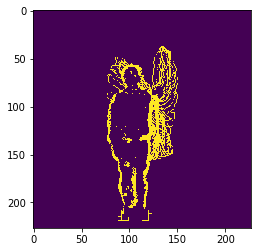

346
a8_s8_t4_depth.mat


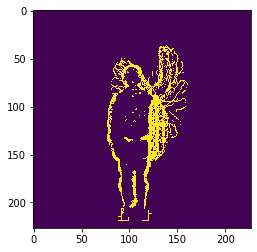

347
a9_s8_t1_depth.mat


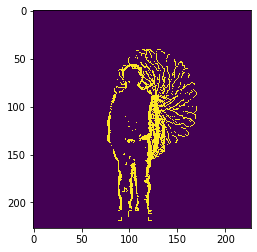

348
a9_s8_t2_depth.mat


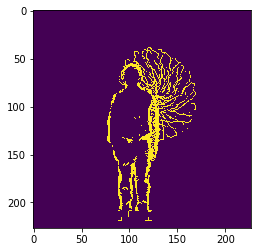

349
a9_s8_t3_depth.mat


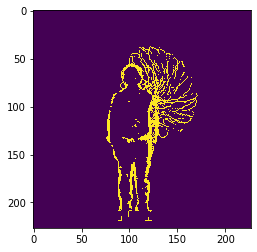

350
a9_s8_t4_depth.mat


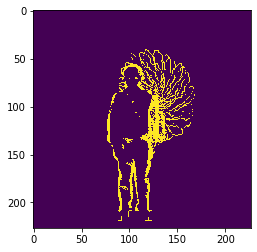

351
a10_s8_t1_depth.mat


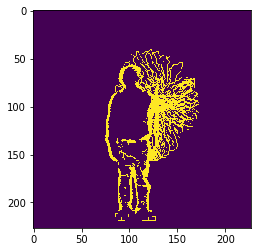

352
a10_s8_t2_depth.mat


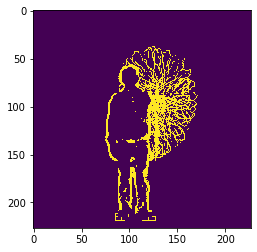

353
a10_s8_t3_depth.mat


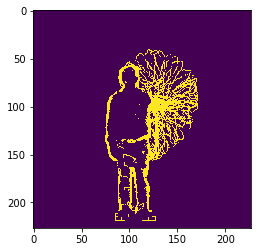

354
a10_s8_t4_depth.mat


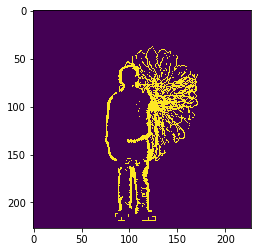

355
a11_s8_t1_depth.mat


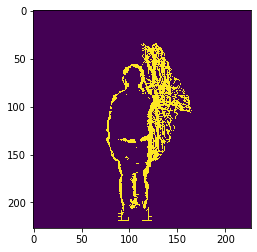

356
a11_s8_t2_depth.mat


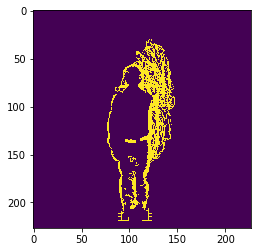

357
a11_s8_t3_depth.mat


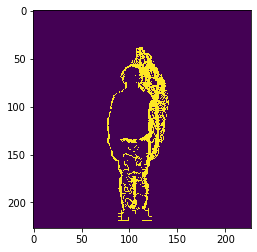

358
a11_s8_t4_depth.mat


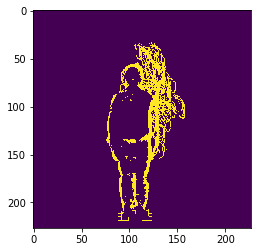

359
a12_s8_t1_depth.mat


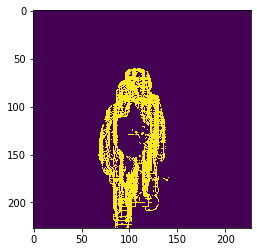

360
a12_s8_t2_depth.mat


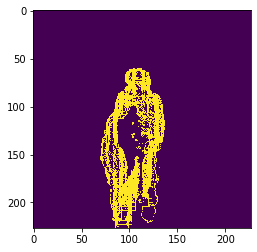

361
a12_s8_t3_depth.mat


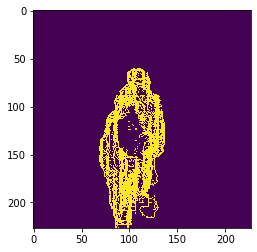

362
a12_s8_t4_depth.mat


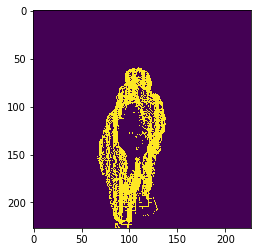

363
a13_s8_t1_depth.mat


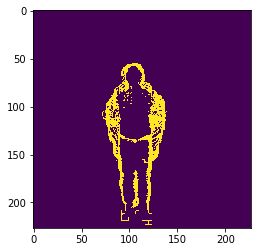

364
a13_s8_t2_depth.mat


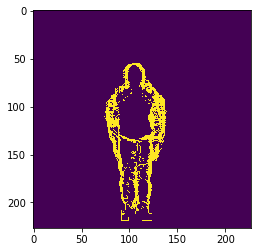

365
a13_s8_t3_depth.mat


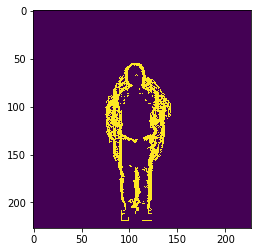

366
a13_s8_t4_depth.mat


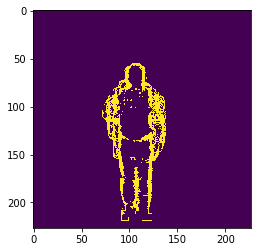

367
a14_s8_t1_depth.mat


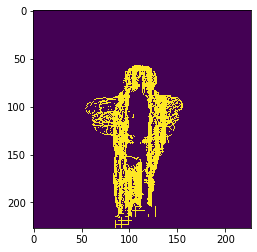

368
a14_s8_t2_depth.mat


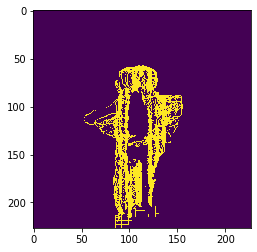

369
a14_s8_t3_depth.mat


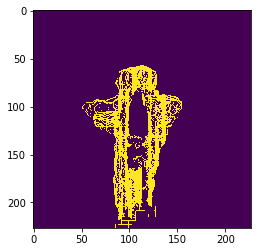

370
a14_s8_t4_depth.mat


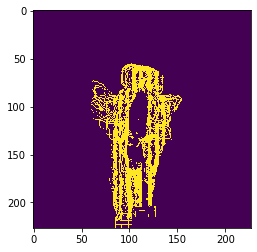

371
a15_s8_t1_depth.mat


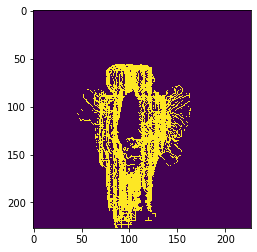

372
a15_s8_t2_depth.mat


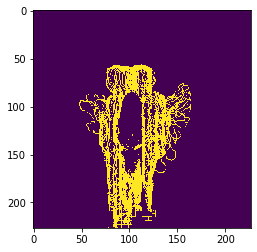

373
a15_s8_t3_depth.mat


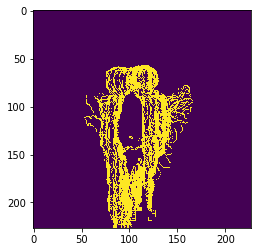

374
a15_s8_t4_depth.mat


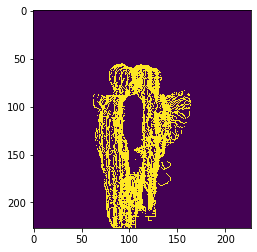

375
a16_s8_t1_depth.mat


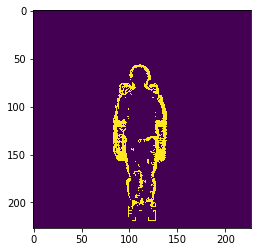

376
a16_s8_t2_depth.mat


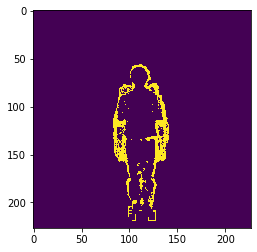

377
a16_s8_t3_depth.mat


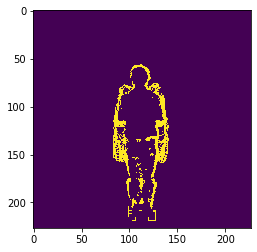

378
a16_s8_t4_depth.mat


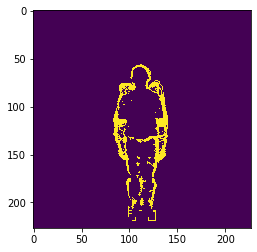

379
a17_s8_t1_depth.mat


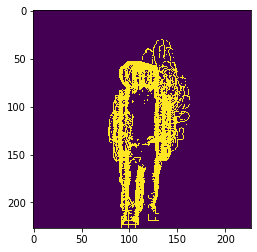

380
a17_s8_t2_depth.mat


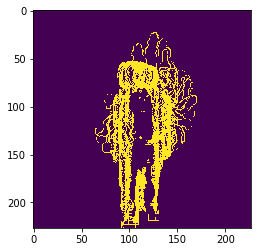

381
a17_s8_t3_depth.mat


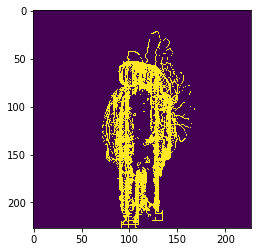

382
a17_s8_t4_depth.mat


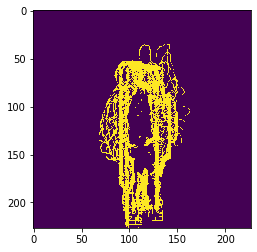

383
a18_s8_t1_depth.mat


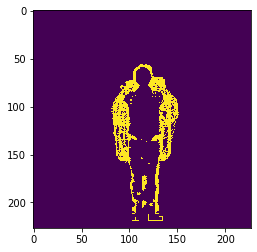

384
a18_s8_t2_depth.mat


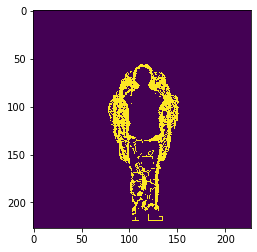

385
a18_s8_t3_depth.mat


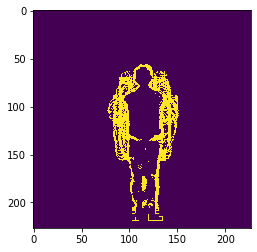

386
a18_s8_t4_depth.mat


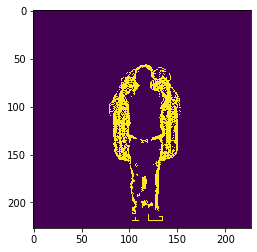

387
a19_s8_t1_depth.mat


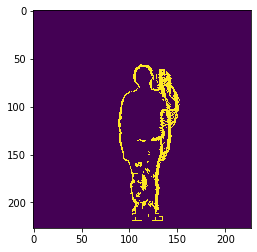

388
a19_s8_t2_depth.mat


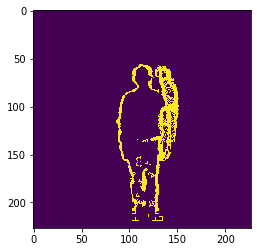

389
a19_s8_t3_depth.mat


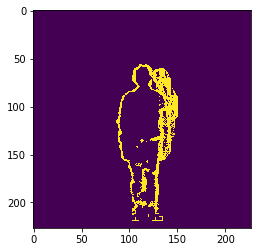

390
a19_s8_t4_depth.mat


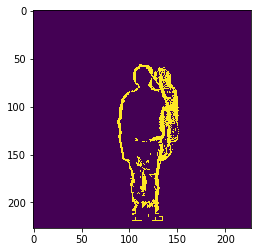

391
a20_s8_t1_depth.mat


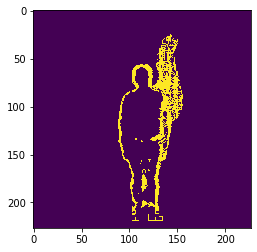

392
a20_s8_t2_depth.mat


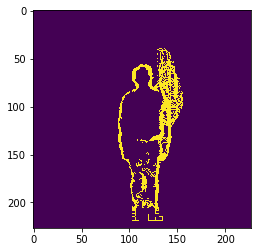

393
a20_s8_t3_depth.mat


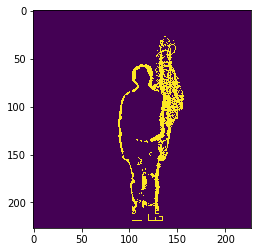

394
a20_s8_t4_depth.mat


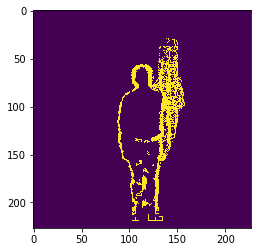

395
a21_s8_t1_depth.mat


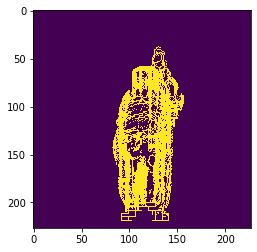

396
a21_s8_t2_depth.mat


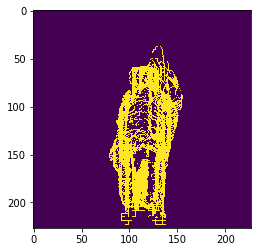

397
a21_s8_t3_depth.mat


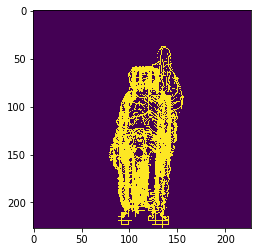

398
a21_s8_t4_depth.mat


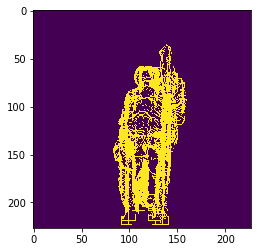

399
a22_s8_t1_depth.mat


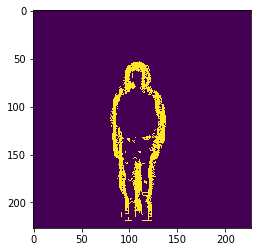

400
a22_s8_t2_depth.mat


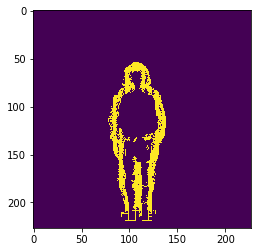

401
a22_s8_t3_depth.mat


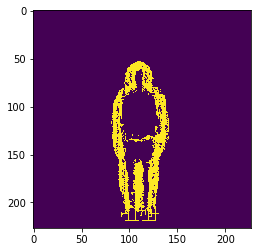

402
a22_s8_t4_depth.mat


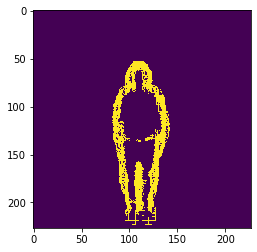

403
a23_s8_t1_depth.mat


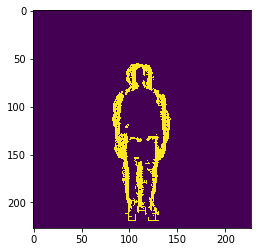

404
a23_s8_t2_depth.mat


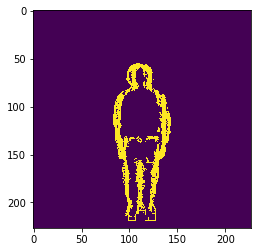

405
a23_s8_t3_depth.mat


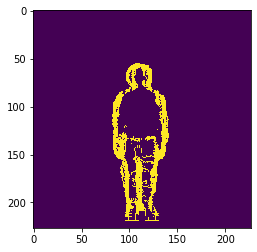

406
a23_s8_t4_depth.mat


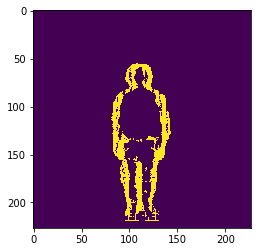

407
a24_s8_t1_depth.mat


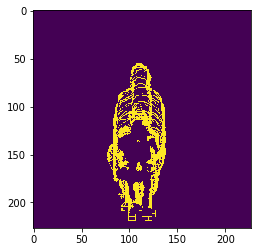

408
a24_s8_t2_depth.mat


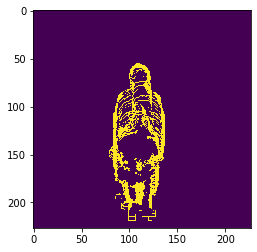

409
a24_s8_t3_depth.mat


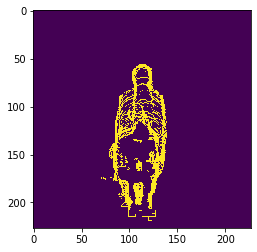

410
a24_s8_t4_depth.mat


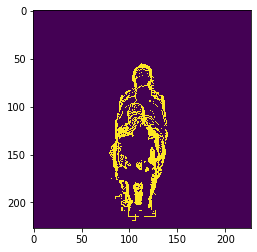

411
a25_s8_t1_depth.mat


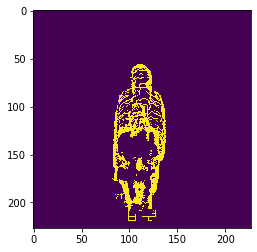

412
a25_s8_t2_depth.mat


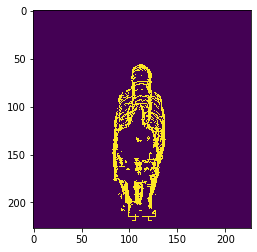

413
a25_s8_t3_depth.mat


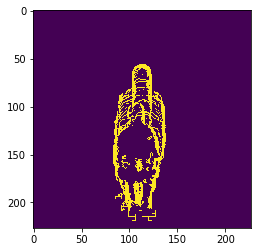

414
a25_s8_t4_depth.mat


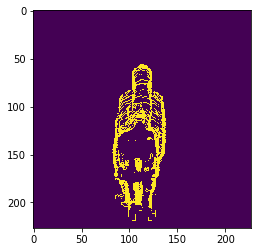

415
a26_s8_t1_depth.mat


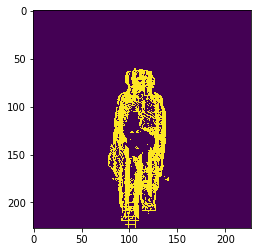

416
a26_s8_t2_depth.mat


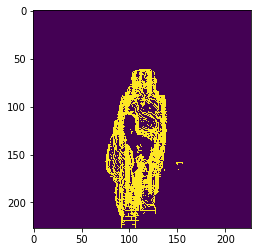

417
a26_s8_t3_depth.mat


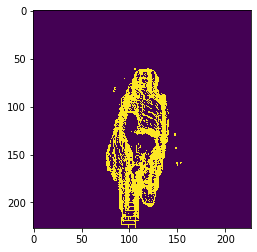

418
a26_s8_t4_depth.mat


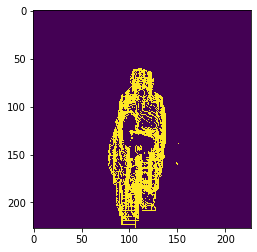

419
a27_s8_t1_depth.mat


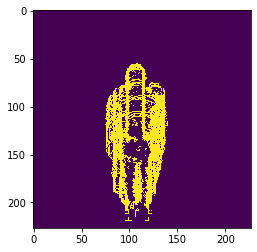

420
a27_s8_t2_depth.mat


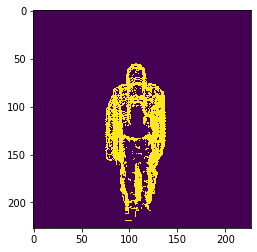

421
a27_s8_t3_depth.mat


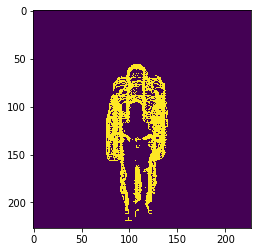

422
a1_s3_t1_depth.mat


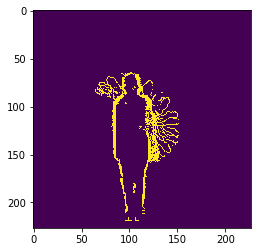

423
a1_s3_t2_depth.mat


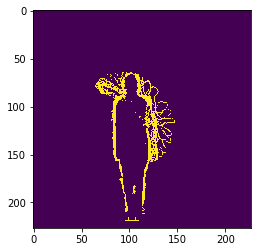

424
a1_s3_t3_depth.mat


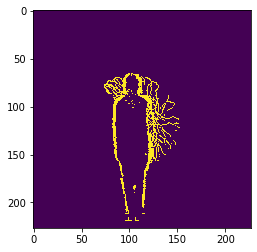

425
a1_s3_t4_depth.mat


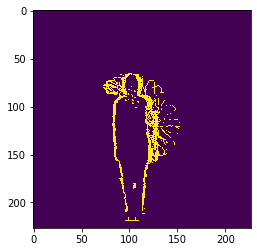

426
a2_s3_t1_depth.mat


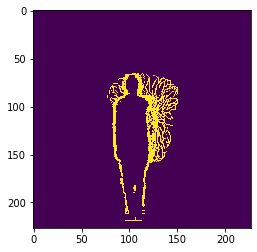

427
a2_s3_t2_depth.mat


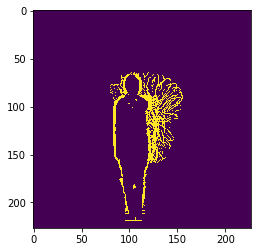

428
a2_s3_t3_depth.mat


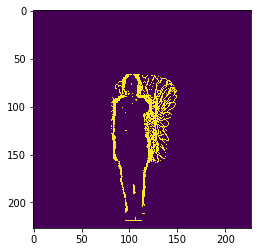

429
a2_s3_t4_depth.mat


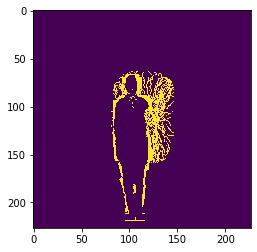

430
a3_s3_t1_depth.mat


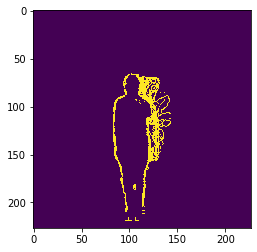

431
a3_s3_t2_depth.mat


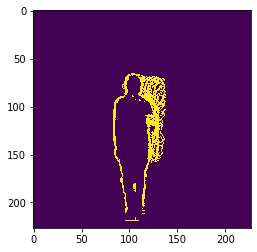

432
a3_s3_t3_depth.mat


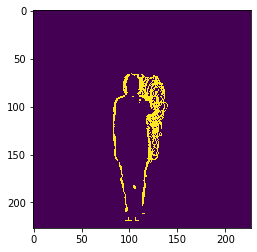

433
a3_s3_t4_depth.mat


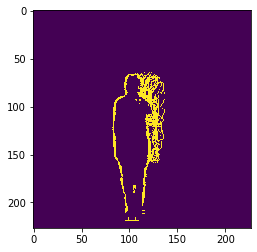

434
a4_s3_t1_depth.mat


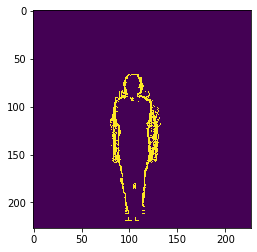

435
a4_s3_t2_depth.mat


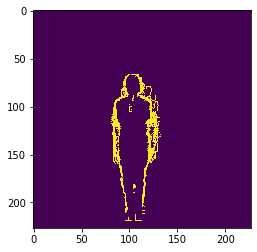

436
a4_s3_t3_depth.mat


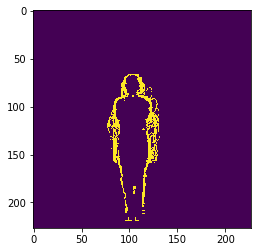

437
a4_s3_t4_depth.mat


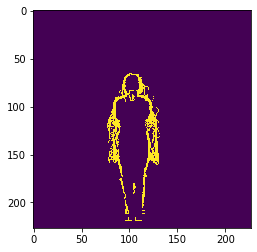

438
a5_s3_t1_depth.mat


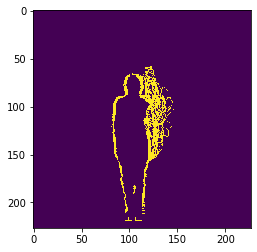

439
a5_s3_t2_depth.mat


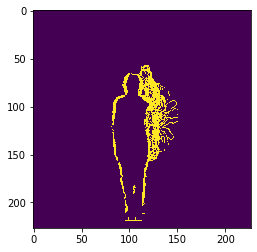

440
a5_s3_t3_depth.mat


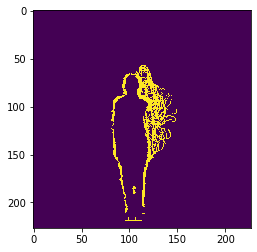

441
a5_s3_t4_depth.mat


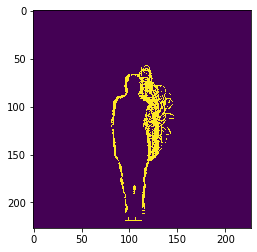

442
a6_s3_t1_depth.mat


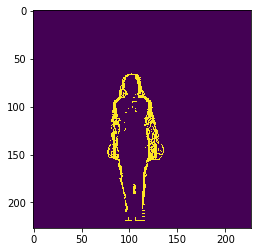

443
a6_s3_t2_depth.mat


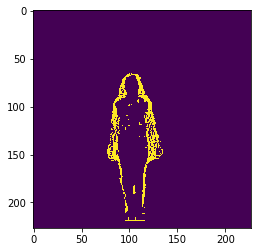

444
a6_s3_t3_depth.mat


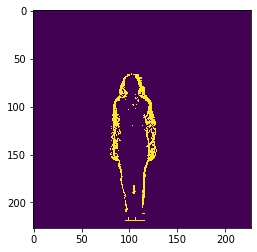

445
a6_s3_t4_depth.mat


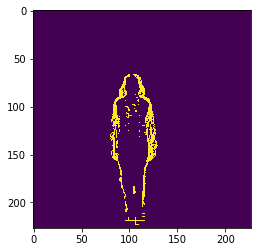

446
a7_s3_t1_depth.mat


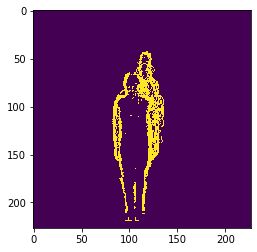

447
a7_s3_t2_depth.mat


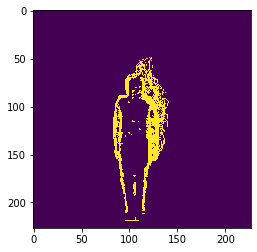

448
a7_s3_t3_depth.mat


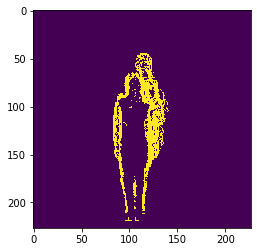

449
a7_s3_t4_depth.mat


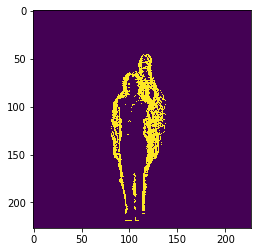

450
a8_s3_t1_depth.mat


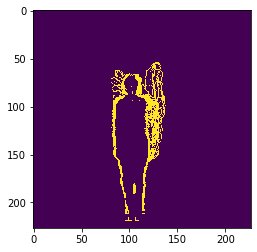

451
a8_s3_t2_depth.mat


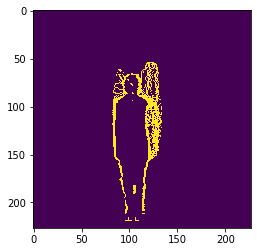

452
a8_s3_t3_depth.mat


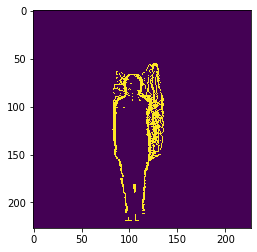

453
a8_s3_t4_depth.mat


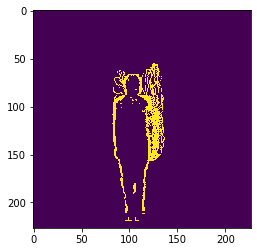

454
a9_s3_t1_depth.mat


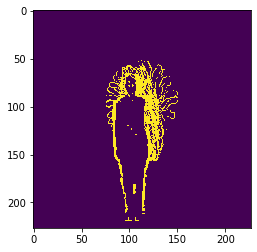

455
a9_s3_t2_depth.mat


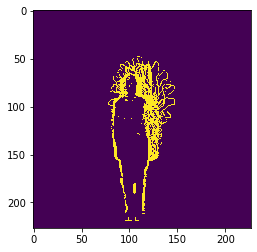

456
a9_s3_t3_depth.mat


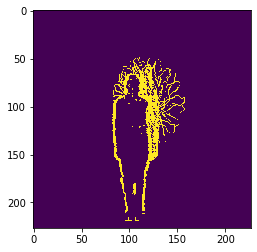

457
a9_s3_t4_depth.mat


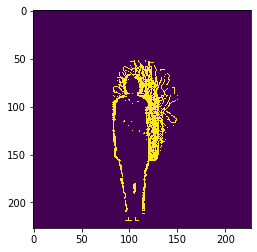

458
a10_s3_t1_depth.mat


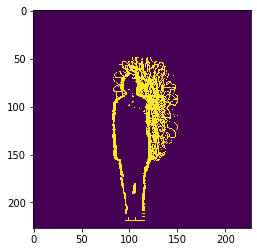

459
a10_s3_t2_depth.mat


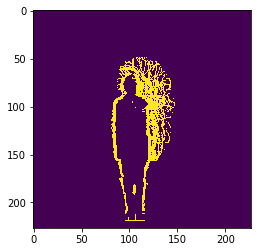

460
a10_s3_t3_depth.mat


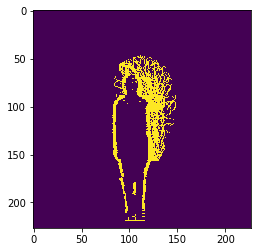

461
a10_s3_t4_depth.mat


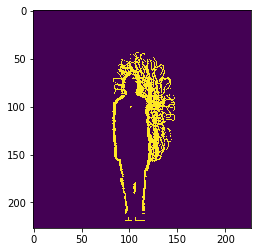

462
a11_s3_t1_depth.mat


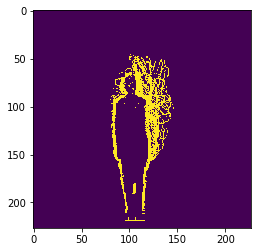

463
a11_s3_t2_depth.mat


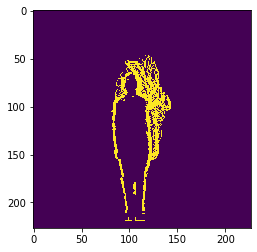

464
a11_s3_t3_depth.mat


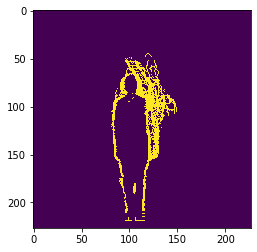

465
a11_s3_t4_depth.mat


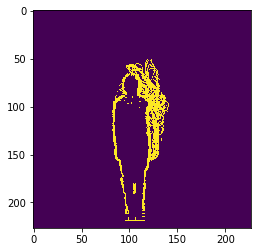

466
a12_s3_t1_depth.mat


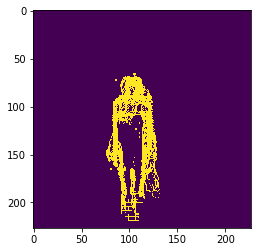

467
a12_s3_t2_depth.mat


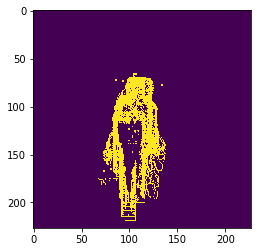

468
a12_s3_t3_depth.mat


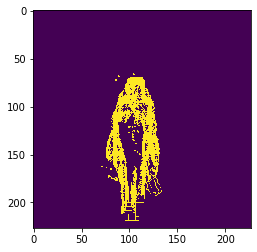

469
a12_s3_t4_depth.mat


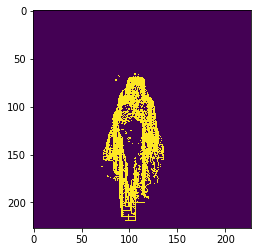

470
a13_s3_t1_depth.mat


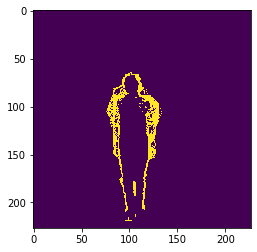

471
a13_s3_t2_depth.mat


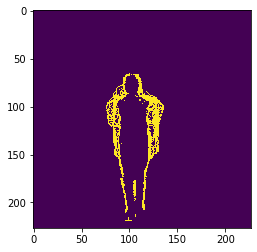

472
a13_s3_t3_depth.mat


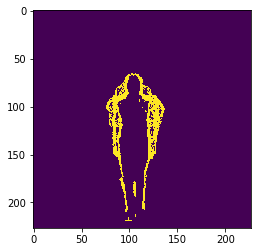

473
a13_s3_t4_depth.mat


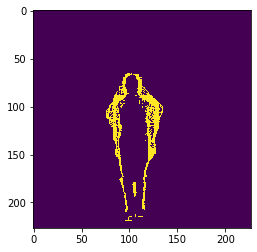

474
a14_s3_t1_depth.mat


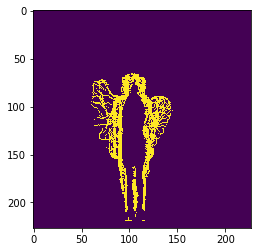

475
a14_s3_t2_depth.mat


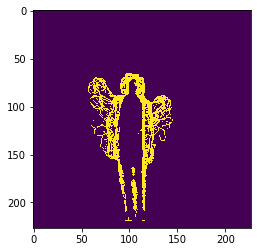

476
a14_s3_t3_depth.mat


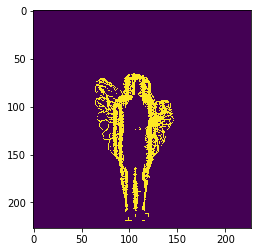

477
a14_s3_t4_depth.mat


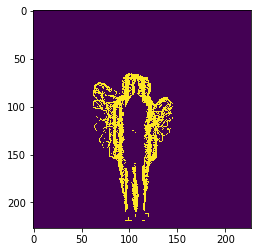

478
a15_s3_t1_depth.mat


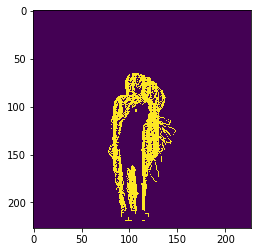

479
a15_s3_t2_depth.mat


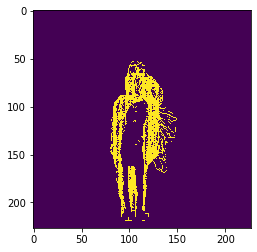

480
a15_s3_t3_depth.mat


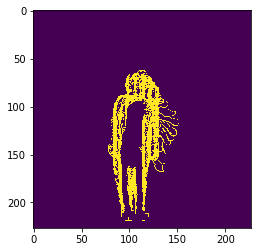

481
a15_s3_t4_depth.mat


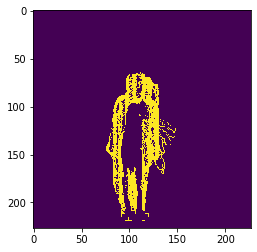

482
a16_s3_t1_depth.mat


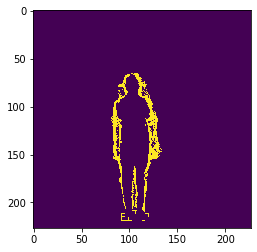

483
a16_s3_t2_depth.mat


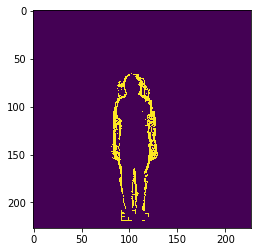

484
a16_s3_t3_depth.mat


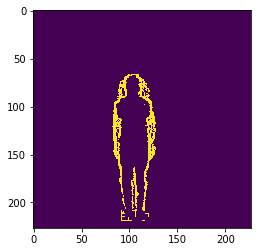

485
a16_s3_t4_depth.mat


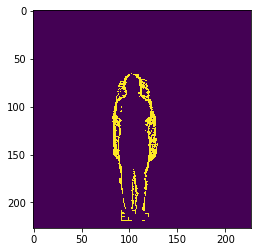

486
a17_s3_t1_depth.mat


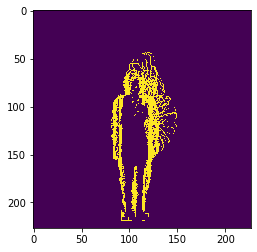

487
a17_s3_t2_depth.mat


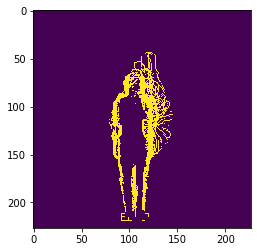

488
a17_s3_t3_depth.mat


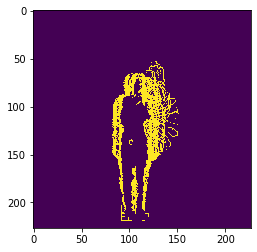

489
a17_s3_t4_depth.mat


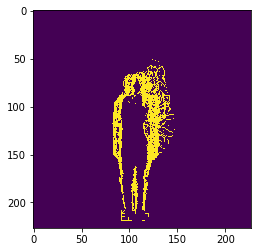

490
a18_s3_t1_depth.mat


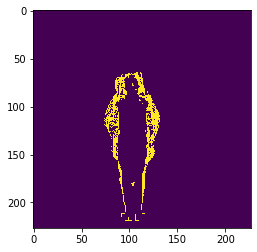

491
a18_s3_t2_depth.mat


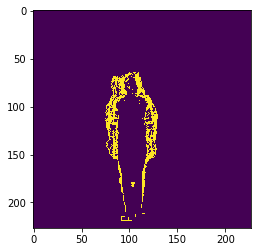

492
a18_s3_t3_depth.mat


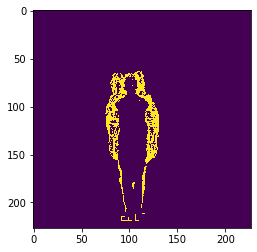

493
a18_s3_t4_depth.mat


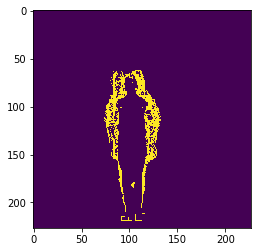

494
a19_s3_t1_depth.mat


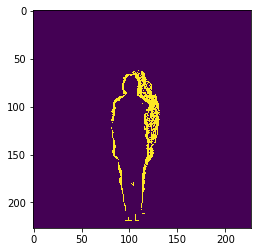

495
a19_s3_t2_depth.mat


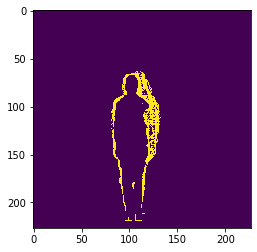

496
a19_s3_t3_depth.mat


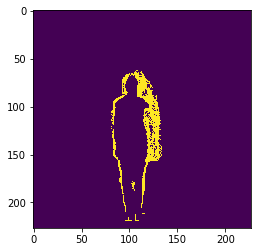

497
a19_s3_t4_depth.mat


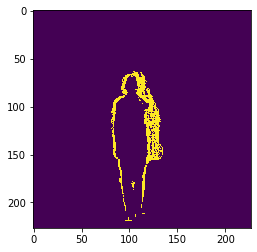

498
a20_s3_t1_depth.mat


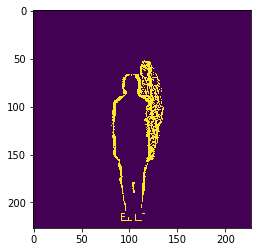

499
a20_s3_t2_depth.mat


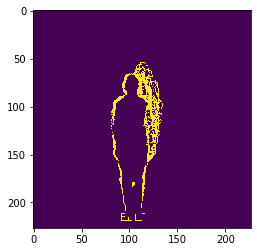

500
a20_s3_t3_depth.mat


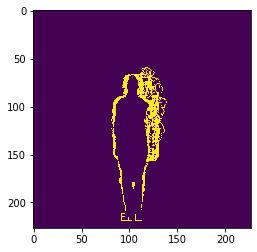

501
a20_s3_t4_depth.mat


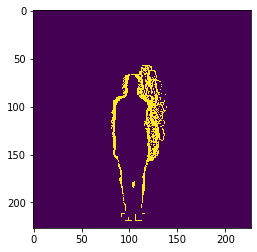

502
a21_s3_t1_depth.mat


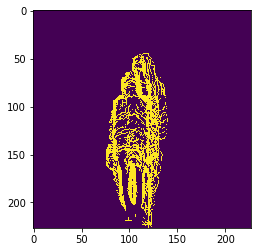

503
a21_s3_t2_depth.mat


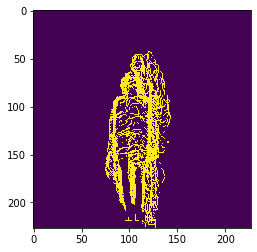

504
a21_s3_t3_depth.mat


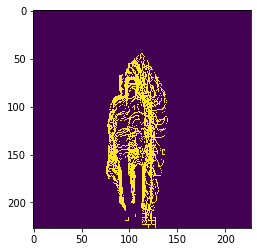

505
a21_s3_t4_depth.mat


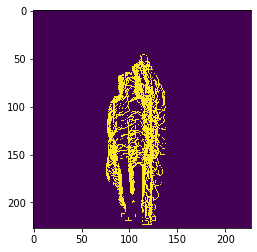

506
a22_s3_t1_depth.mat


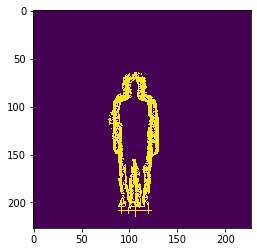

507
a22_s3_t2_depth.mat


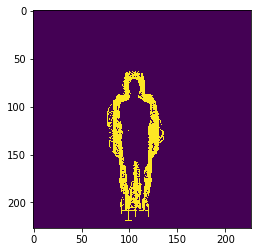

508
a22_s3_t3_depth.mat


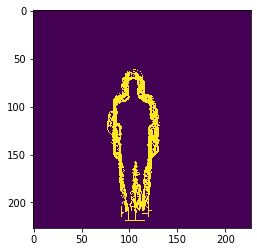

509
a22_s3_t4_depth.mat


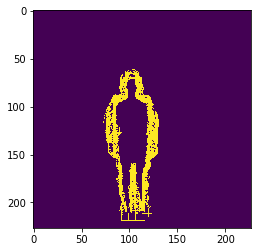

510
a23_s3_t1_depth.mat


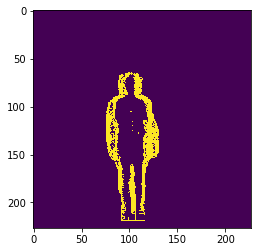

511
a23_s3_t2_depth.mat


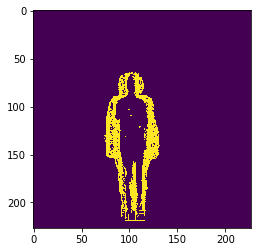

512
a23_s3_t3_depth.mat


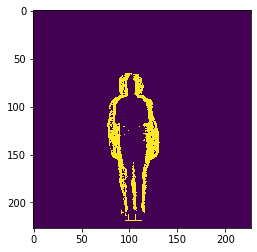

513
a23_s3_t4_depth.mat


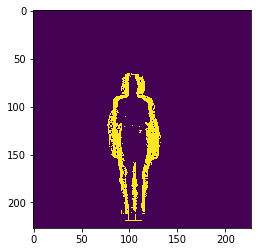

514
a24_s3_t1_depth.mat


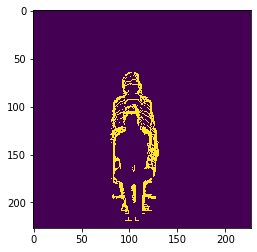

515
a24_s3_t2_depth.mat


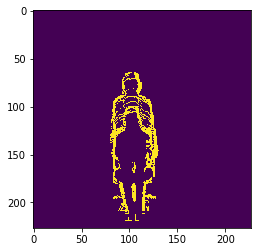

516
a24_s3_t3_depth.mat


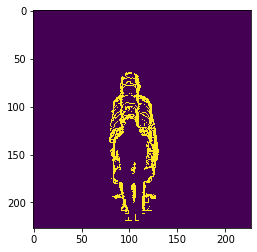

517
a24_s3_t4_depth.mat


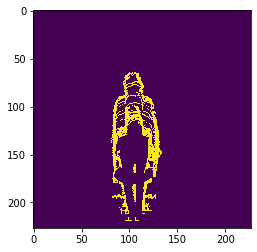

518
a25_s3_t1_depth.mat


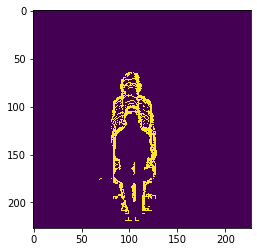

519
a25_s3_t2_depth.mat


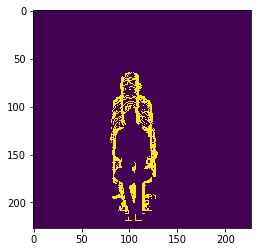

520
a25_s3_t3_depth.mat


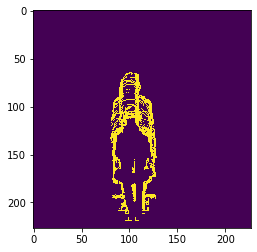

521
a25_s3_t4_depth.mat


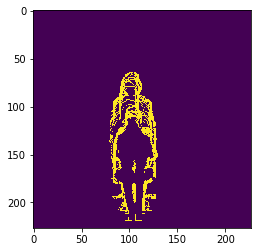

522
a26_s3_t1_depth.mat


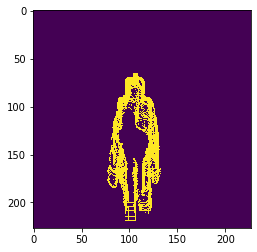

523
a26_s3_t2_depth.mat


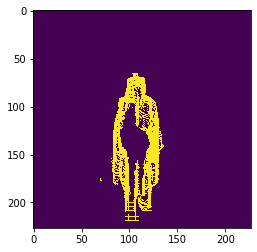

524
a26_s3_t3_depth.mat


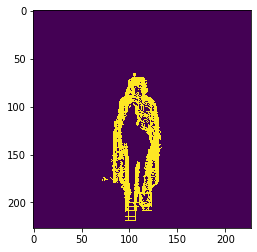

525
a26_s3_t4_depth.mat


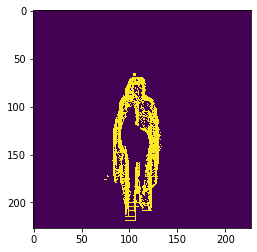

526
a27_s3_t1_depth.mat


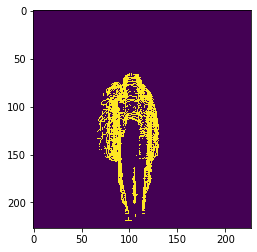

527
a27_s3_t2_depth.mat


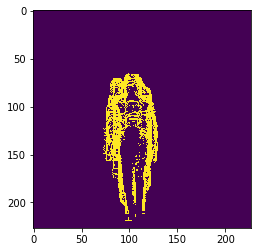

528
a27_s3_t3_depth.mat


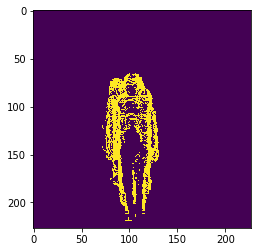

529
a27_s3_t4_depth.mat


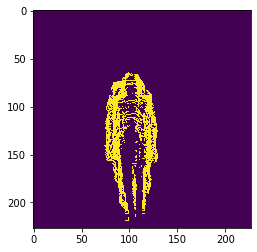

530
a1_s4_t1_depth.mat


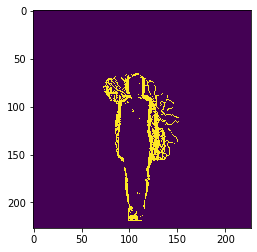

531
a1_s4_t2_depth.mat


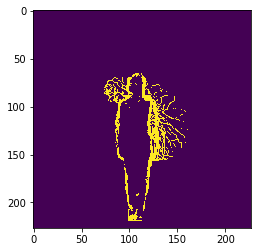

532
a1_s4_t3_depth.mat


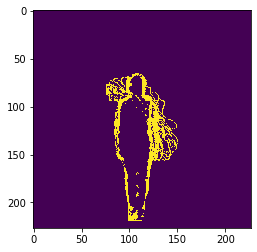

533
a1_s4_t4_depth.mat


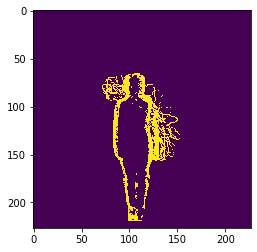

534
a2_s4_t1_depth.mat


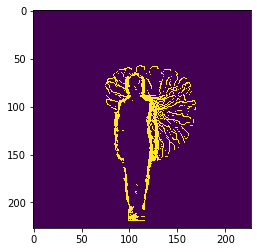

535
a2_s4_t2_depth.mat


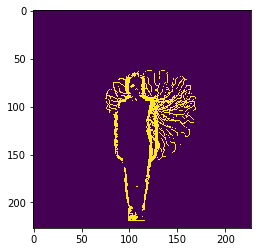

536
a2_s4_t3_depth.mat


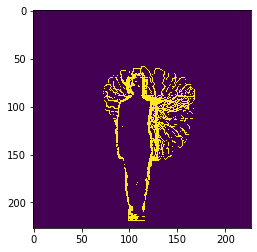

537
a2_s4_t4_depth.mat


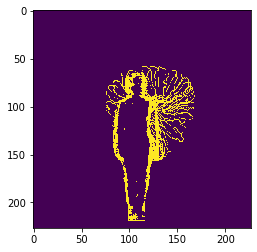

538
a3_s4_t1_depth.mat


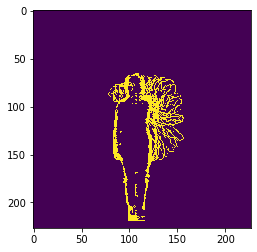

539
a3_s4_t2_depth.mat


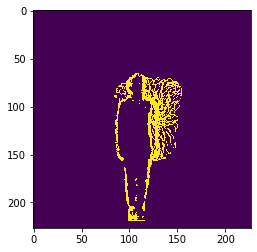

540
a3_s4_t3_depth.mat


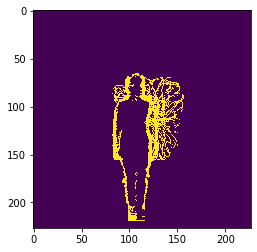

541
a3_s4_t4_depth.mat


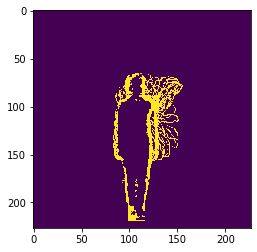

542
a4_s4_t1_depth.mat


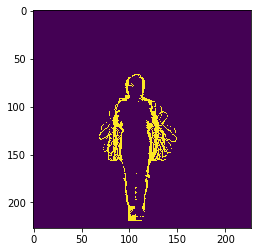

543
a4_s4_t2_depth.mat


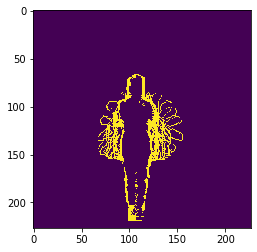

544
a4_s4_t3_depth.mat


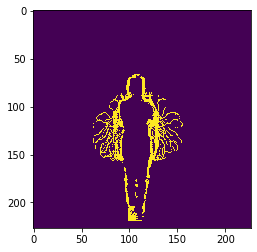

545
a4_s4_t4_depth.mat


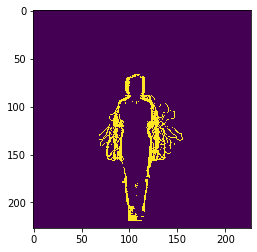

546
a5_s4_t1_depth.mat


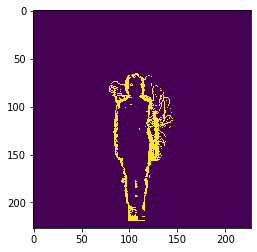

547
a5_s4_t2_depth.mat


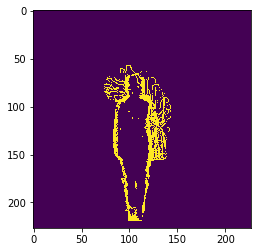

548
a5_s4_t3_depth.mat


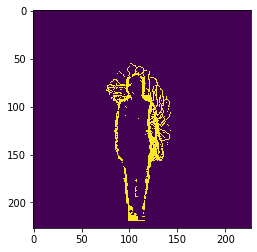

549
a5_s4_t4_depth.mat


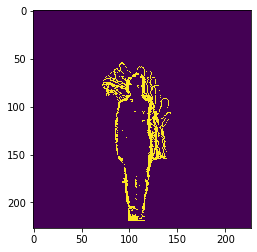

550
a6_s4_t1_depth.mat


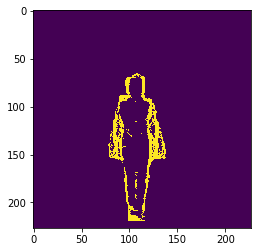

551
a6_s4_t2_depth.mat


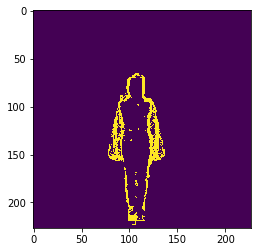

552
a6_s4_t3_depth.mat


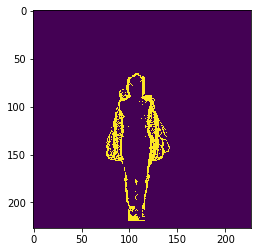

553
a6_s4_t4_depth.mat


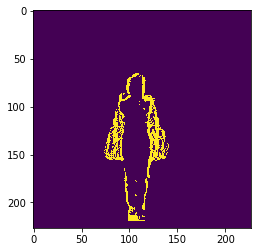

554
a7_s4_t1_depth.mat


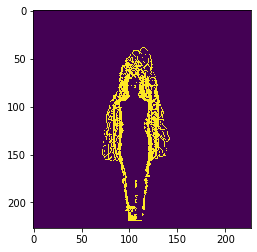

555
a7_s4_t2_depth.mat


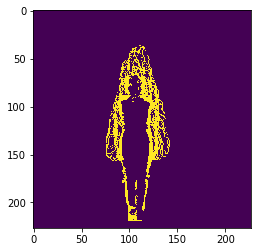

556
a7_s4_t3_depth.mat


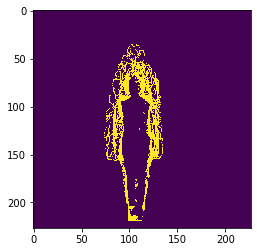

557
a7_s4_t4_depth.mat


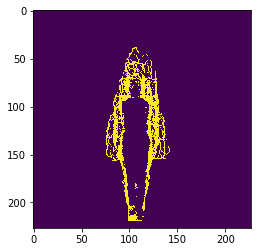

558
a8_s4_t1_depth.mat


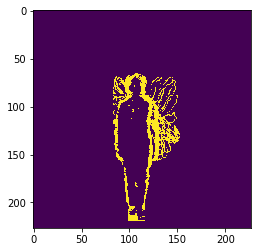

559
a8_s4_t2_depth.mat


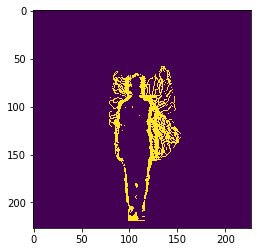

560
a8_s4_t3_depth.mat


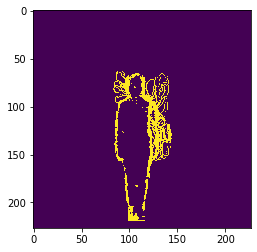

561
a8_s4_t4_depth.mat


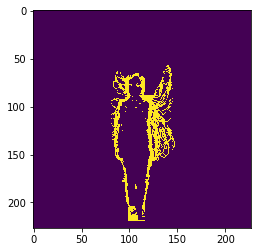

562
a9_s4_t1_depth.mat


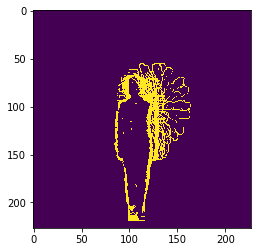

563
a9_s4_t2_depth.mat


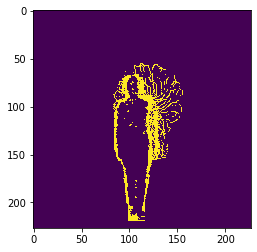

564
a9_s4_t3_depth.mat


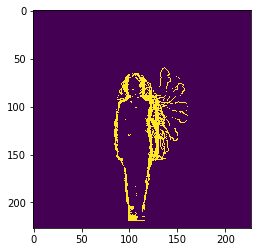

565
a9_s4_t4_depth.mat


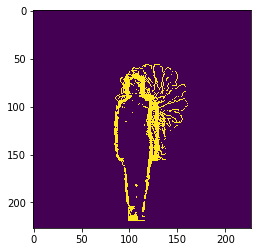

566
a10_s4_t1_depth.mat


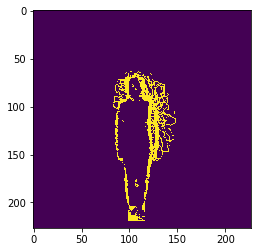

567
a10_s4_t2_depth.mat


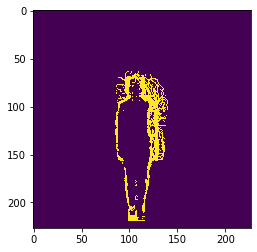

568
a10_s4_t3_depth.mat


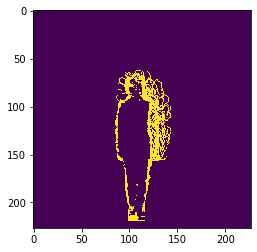

569
a10_s4_t4_depth.mat


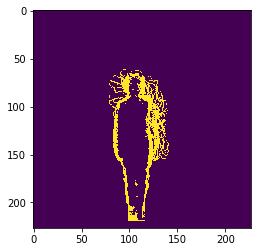

570
a11_s4_t1_depth.mat


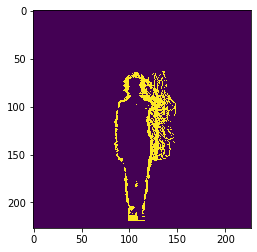

571
a11_s4_t2_depth.mat


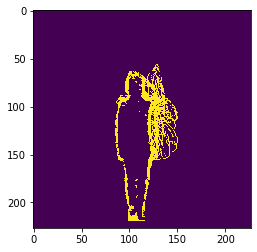

572
a11_s4_t3_depth.mat


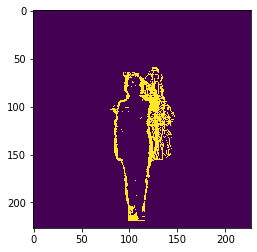

573
a11_s4_t4_depth.mat


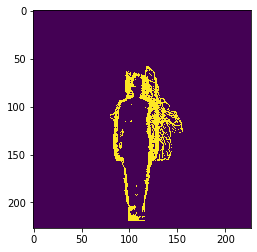

574
a12_s4_t1_depth.mat


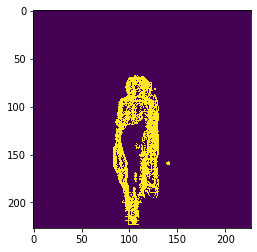

575
a12_s4_t2_depth.mat


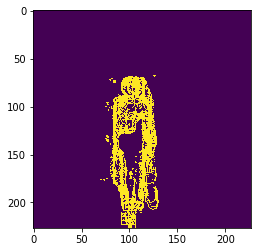

576
a12_s4_t3_depth.mat


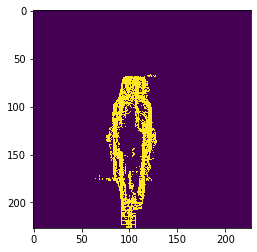

577
a12_s4_t4_depth.mat


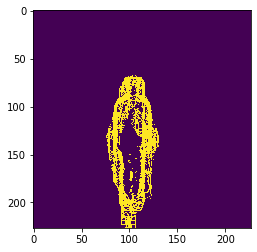

578
a13_s4_t1_depth.mat


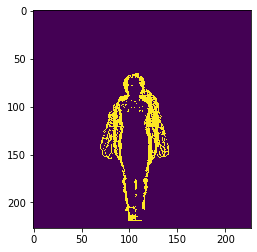

579
a13_s4_t2_depth.mat


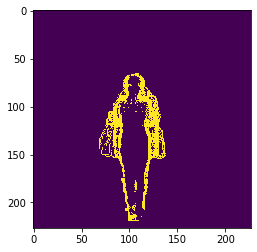

580
a13_s4_t3_depth.mat


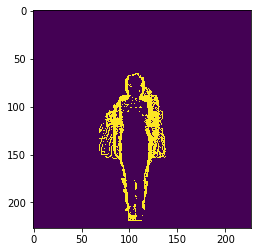

581
a13_s4_t4_depth.mat


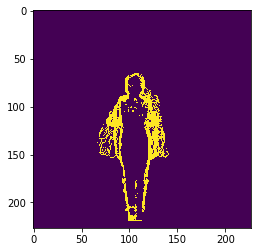

582
a14_s4_t1_depth.mat


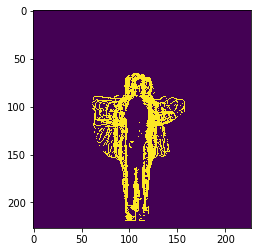

583
a14_s4_t2_depth.mat


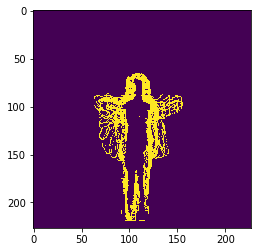

584
a14_s4_t3_depth.mat


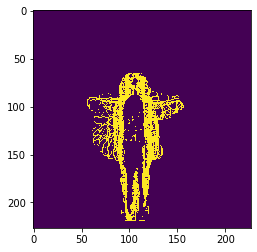

585
a14_s4_t4_depth.mat


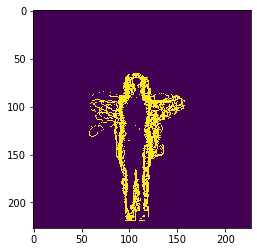

586
a15_s4_t1_depth.mat


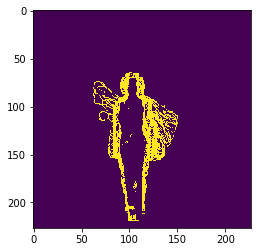

587
a15_s4_t2_depth.mat


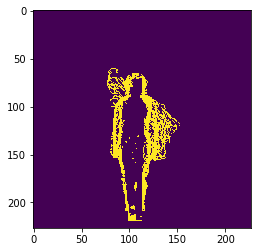

588
a15_s4_t3_depth.mat


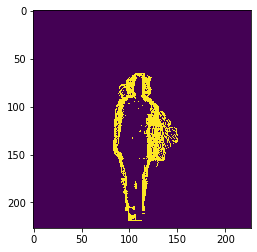

589
a15_s4_t4_depth.mat


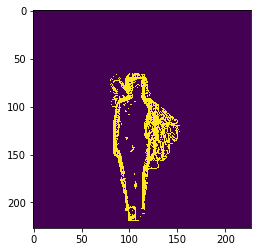

590
a16_s4_t1_depth.mat


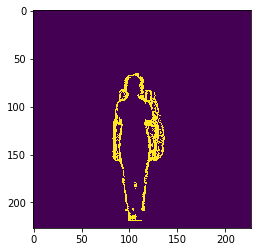

591
a16_s4_t2_depth.mat


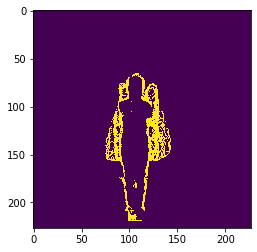

592
a16_s4_t3_depth.mat


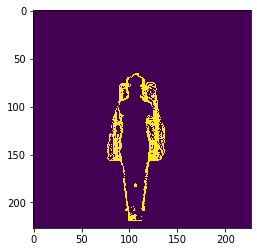

593
a16_s4_t4_depth.mat


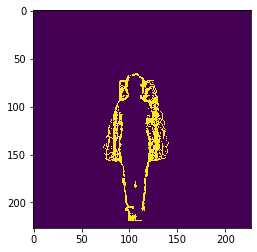

594
a17_s4_t1_depth.mat


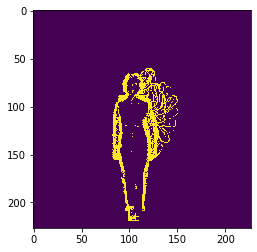

595
a17_s4_t2_depth.mat


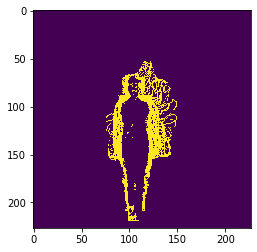

596
a17_s4_t3_depth.mat


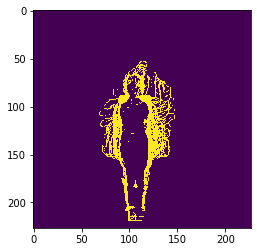

597
a17_s4_t4_depth.mat


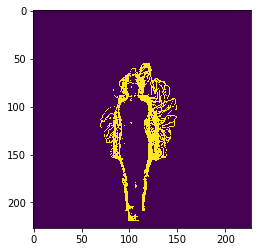

598
a18_s4_t1_depth.mat


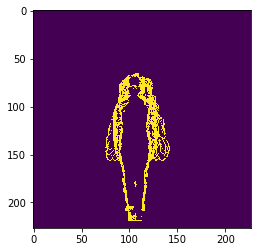

599
a18_s4_t2_depth.mat


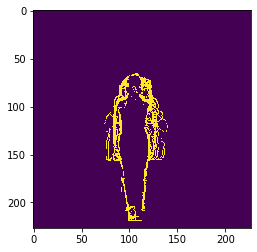

600
a18_s4_t3_depth.mat


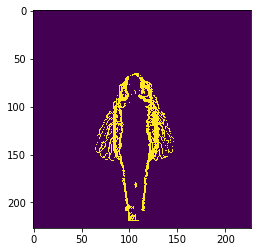

601
a18_s4_t4_depth.mat


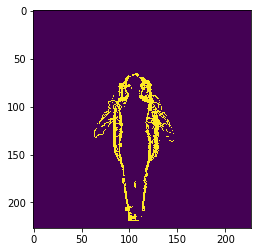

602
a19_s4_t1_depth.mat


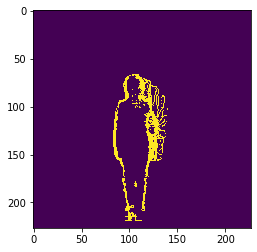

603
a19_s4_t2_depth.mat


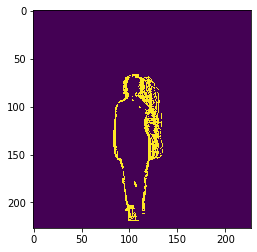

604
a19_s4_t3_depth.mat


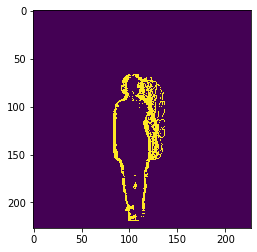

605
a19_s4_t4_depth.mat


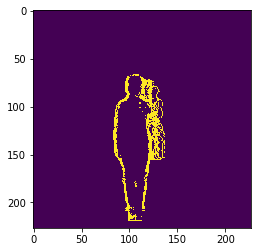

606
a20_s4_t1_depth.mat


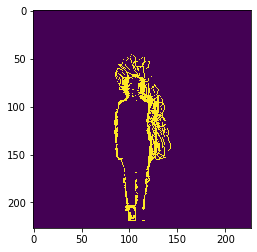

607
a20_s4_t2_depth.mat


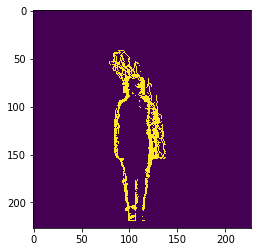

608
a20_s4_t3_depth.mat


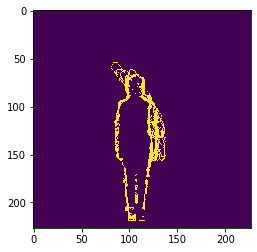

609
a20_s4_t4_depth.mat


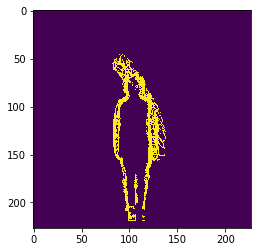

610
a21_s4_t1_depth.mat


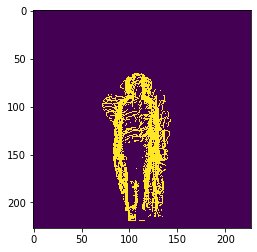

611
a21_s4_t2_depth.mat


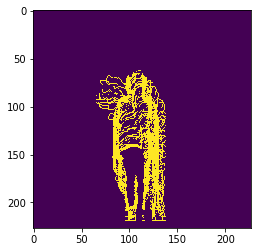

612
a21_s4_t3_depth.mat


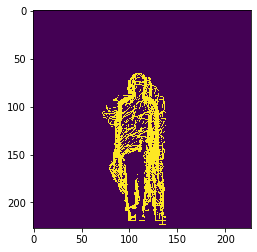

613
a21_s4_t4_depth.mat


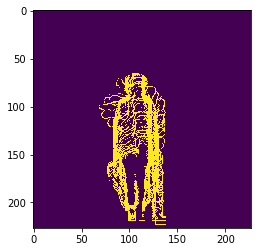

614
a22_s4_t1_depth.mat


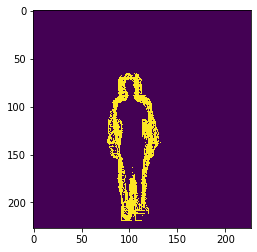

615
a22_s4_t2_depth.mat


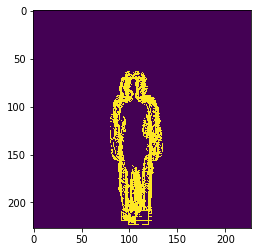

616
a22_s4_t3_depth.mat


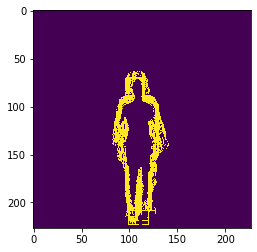

617
a22_s4_t4_depth.mat


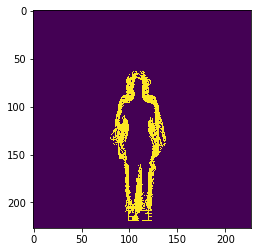

618
a23_s4_t1_depth.mat


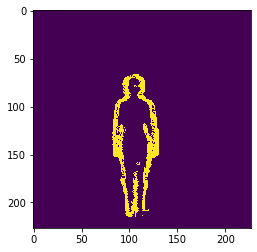

619
a23_s4_t2_depth.mat


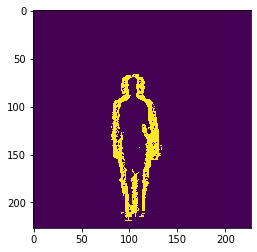

620
a23_s4_t3_depth.mat


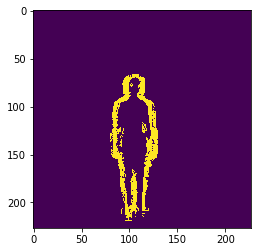

621
a23_s4_t4_depth.mat


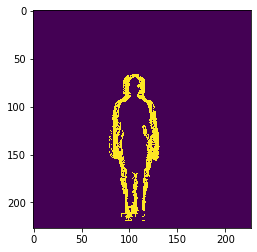

622
a24_s4_t1_depth.mat


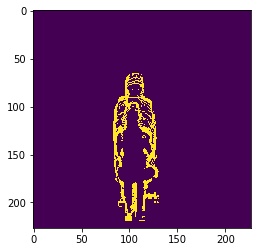

623
a24_s4_t2_depth.mat


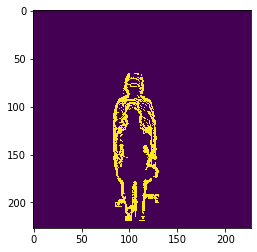

624
a24_s4_t3_depth.mat


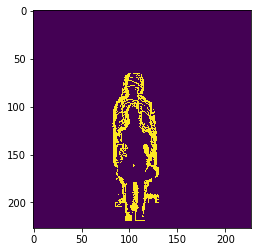

625
a24_s4_t4_depth.mat


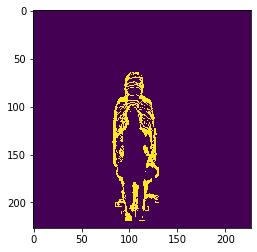

626
a25_s4_t1_depth.mat


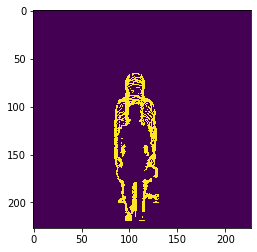

627
a25_s4_t2_depth.mat


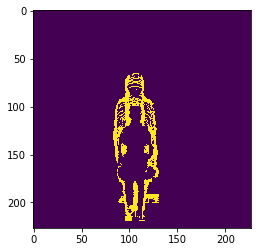

628
a25_s4_t3_depth.mat


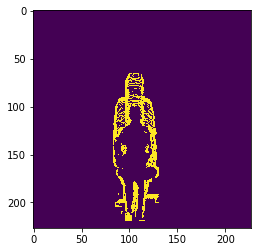

629
a25_s4_t4_depth.mat


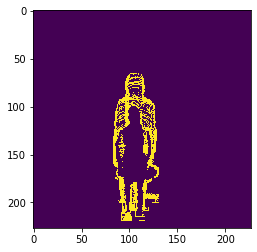

630
a26_s4_t1_depth.mat


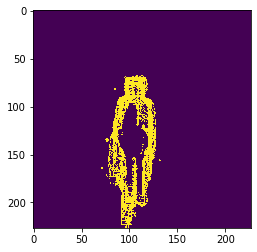

631
a26_s4_t2_depth.mat


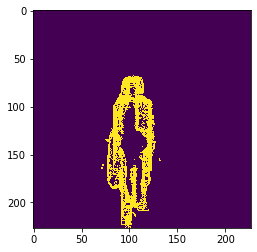

632
a26_s4_t3_depth.mat


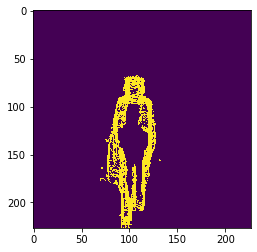

633
a26_s4_t4_depth.mat


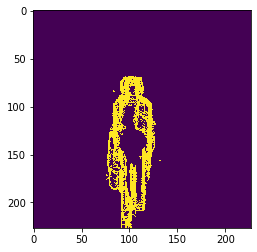

634
a27_s4_t1_depth.mat


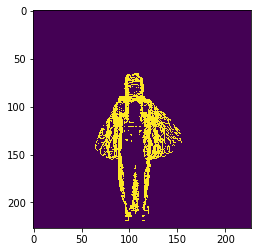

635
a27_s4_t2_depth.mat


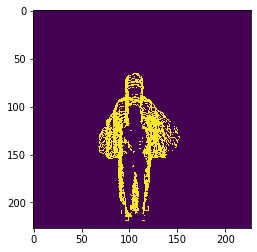

636
a27_s4_t3_depth.mat


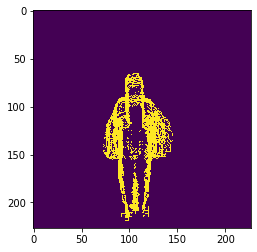

637
a27_s4_t4_depth.mat


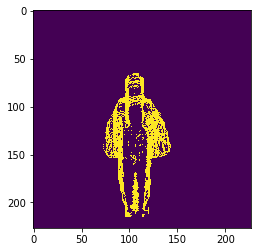

638
a1_s5_t1_depth.mat


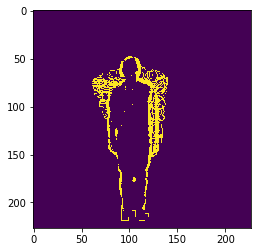

639
a1_s5_t2_depth.mat


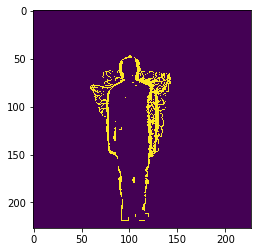

640
a1_s5_t3_depth.mat


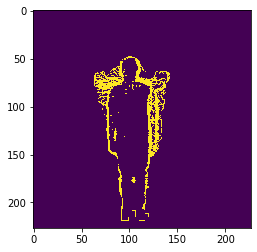

641
a1_s5_t4_depth.mat


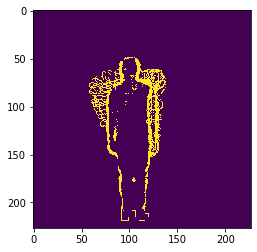

642
a2_s5_t1_depth.mat


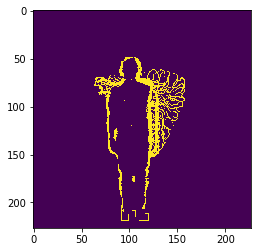

643
a2_s5_t2_depth.mat


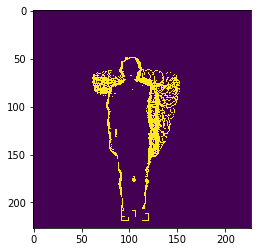

644
a2_s5_t3_depth.mat


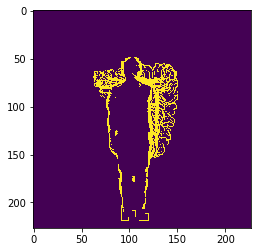

645
a2_s5_t4_depth.mat


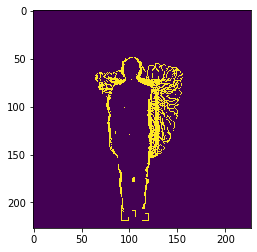

646
a3_s5_t1_depth.mat


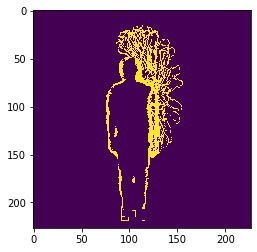

647
a3_s5_t2_depth.mat


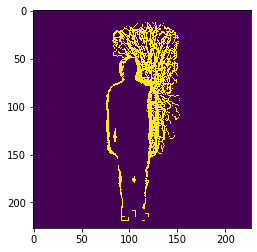

648
a3_s5_t3_depth.mat


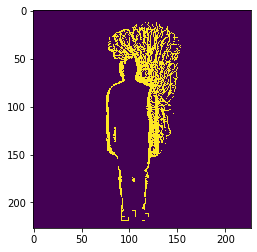

649
a3_s5_t4_depth.mat


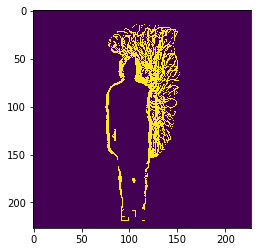

650
a4_s5_t1_depth.mat


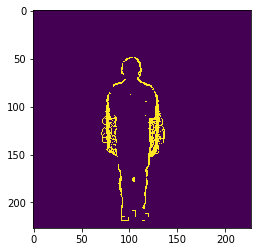

651
a4_s5_t2_depth.mat


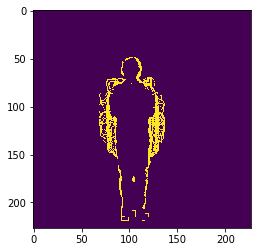

652
a4_s5_t3_depth.mat


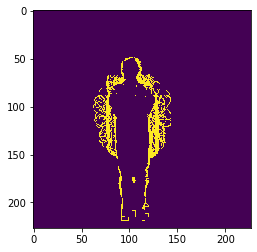

653
a4_s5_t4_depth.mat


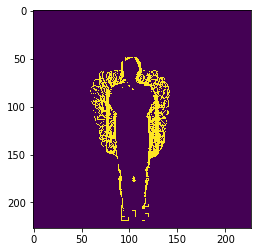

654
a5_s5_t1_depth.mat


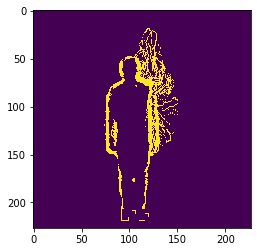

655
a5_s5_t2_depth.mat


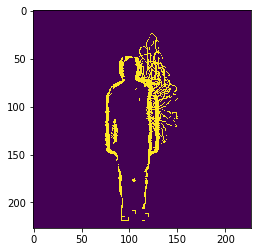

656
a5_s5_t3_depth.mat


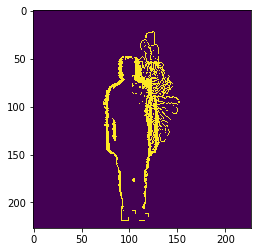

657
a5_s5_t4_depth.mat


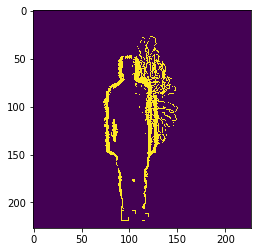

658
a6_s5_t1_depth.mat


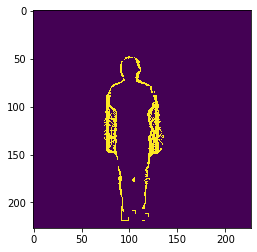

659
a6_s5_t2_depth.mat


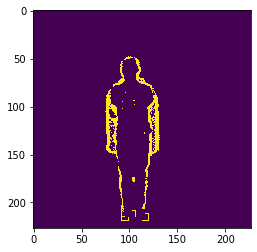

660
a6_s5_t3_depth.mat


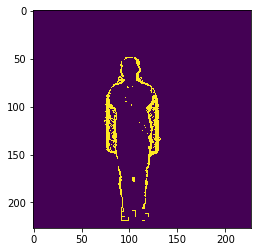

661
a6_s5_t4_depth.mat


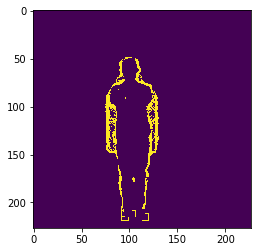

662
a7_s5_t1_depth.mat


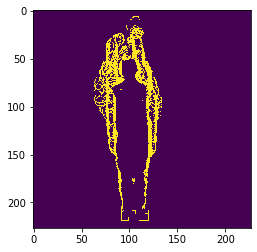

663
a7_s5_t2_depth.mat


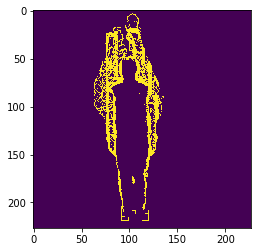

664
a7_s5_t3_depth.mat


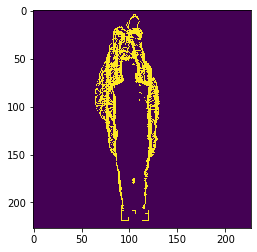

665
a7_s5_t4_depth.mat


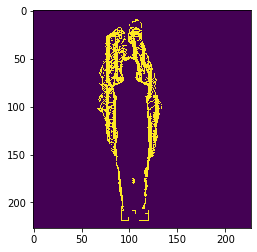

666
a8_s5_t1_depth.mat


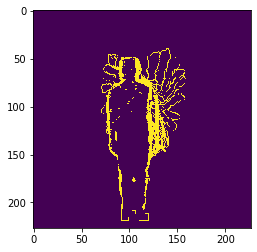

667
a8_s5_t2_depth.mat


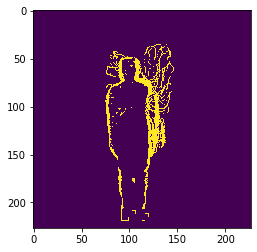

668
a8_s5_t3_depth.mat


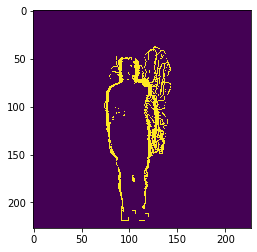

669
a8_s5_t4_depth.mat


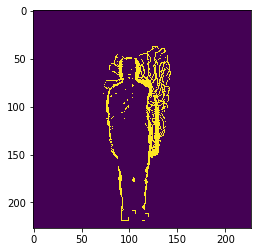

670
a9_s5_t1_depth.mat


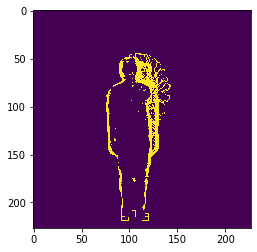

671
a9_s5_t2_depth.mat


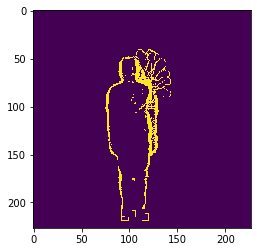

672
a9_s5_t3_depth.mat


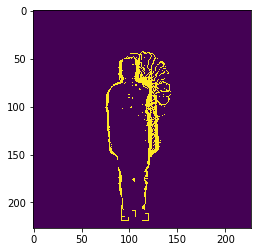

673
a9_s5_t4_depth.mat


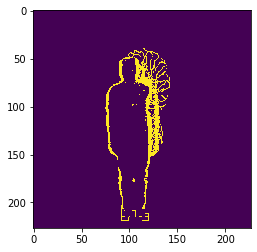

674
a10_s5_t1_depth.mat


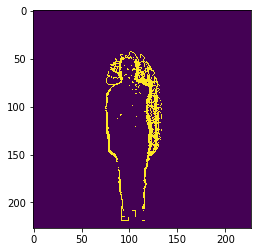

675
a10_s5_t2_depth.mat


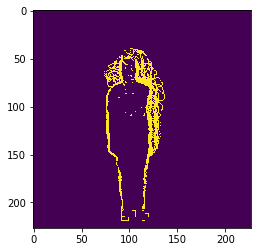

676
a10_s5_t3_depth.mat


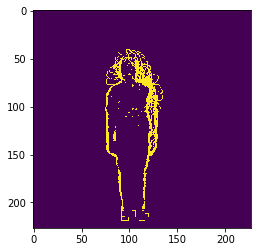

677
a10_s5_t4_depth.mat


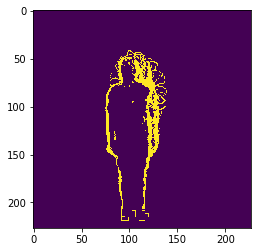

678
a11_s5_t1_depth.mat


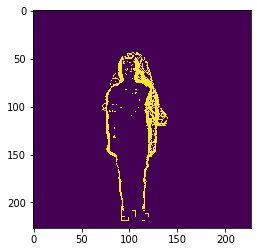

679
a11_s5_t2_depth.mat


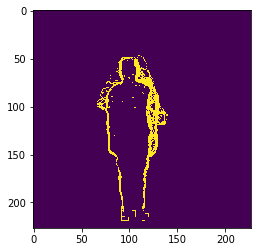

680
a11_s5_t3_depth.mat


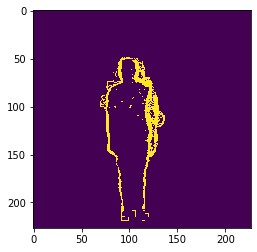

681
a11_s5_t4_depth.mat


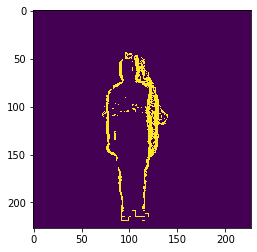

682
a12_s5_t1_depth.mat


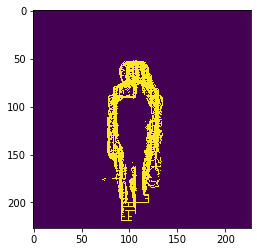

683
a12_s5_t2_depth.mat


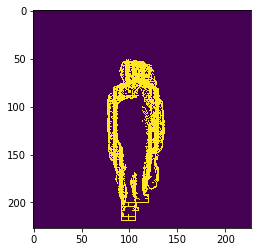

684
a12_s5_t3_depth.mat


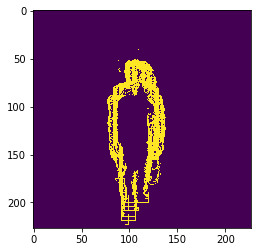

685
a12_s5_t4_depth.mat


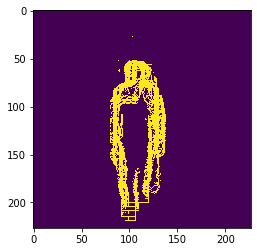

686
a13_s5_t1_depth.mat


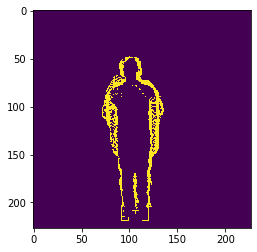

687
a13_s5_t2_depth.mat


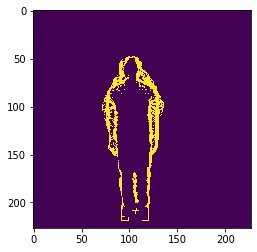

688
a13_s5_t3_depth.mat


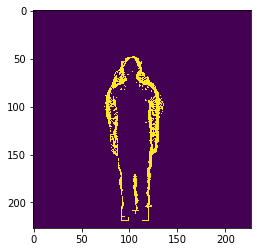

689
a13_s5_t4_depth.mat


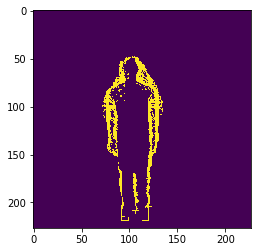

690
a14_s5_t1_depth.mat


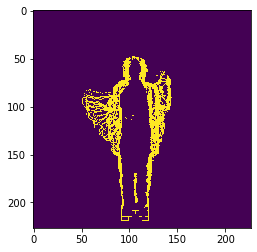

691
a14_s5_t2_depth.mat


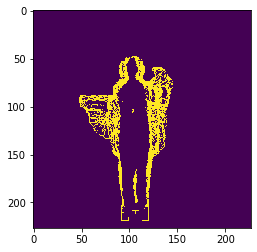

692
a14_s5_t3_depth.mat


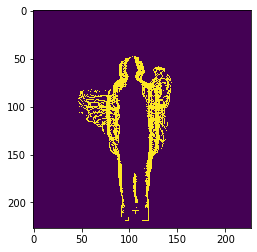

693
a14_s5_t4_depth.mat


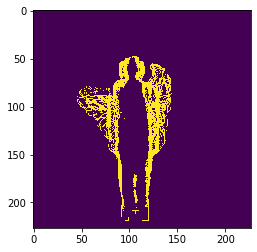

694
a15_s5_t1_depth.mat


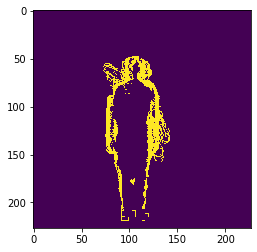

695
a15_s5_t2_depth.mat


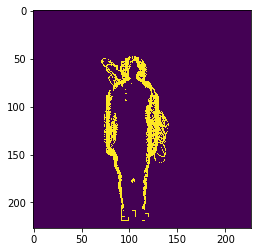

696
a15_s5_t3_depth.mat


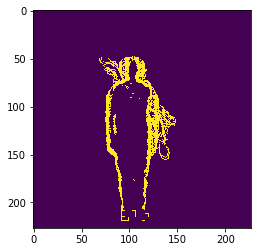

697
a15_s5_t4_depth.mat


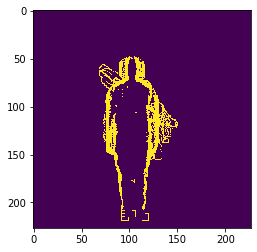

698
a16_s5_t1_depth.mat


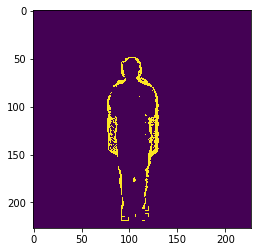

699
a16_s5_t2_depth.mat


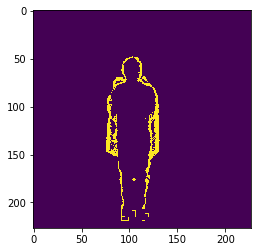

700
a16_s5_t3_depth.mat


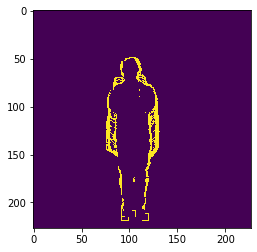

701
a16_s5_t4_depth.mat


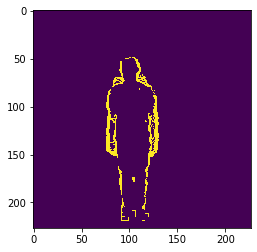

702
a17_s5_t1_depth.mat


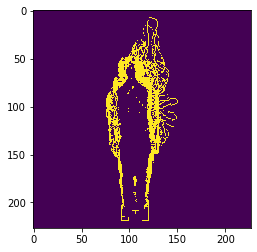

703
a17_s5_t2_depth.mat


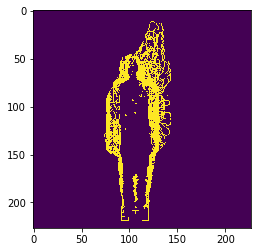

704
a17_s5_t3_depth.mat


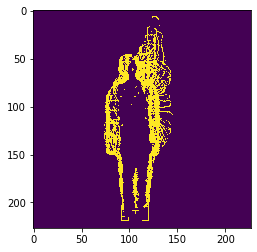

705
a17_s5_t4_depth.mat


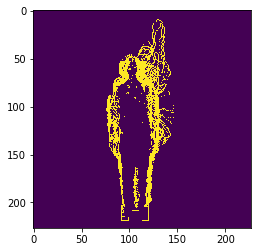

706
a18_s5_t1_depth.mat


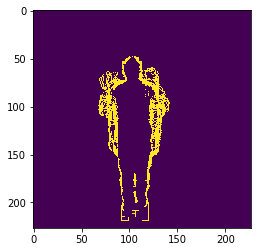

707
a18_s5_t2_depth.mat


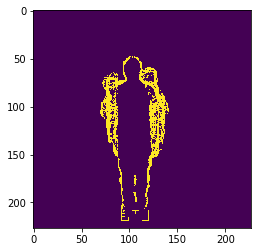

708
a18_s5_t3_depth.mat


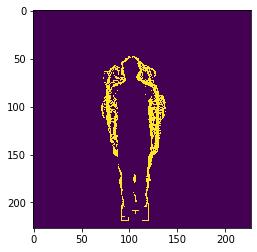

709
a18_s5_t4_depth.mat


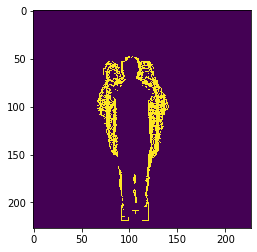

710
a19_s5_t1_depth.mat


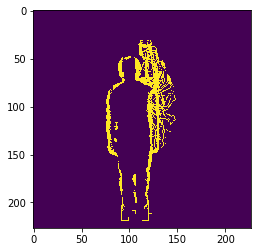

711
a19_s5_t2_depth.mat


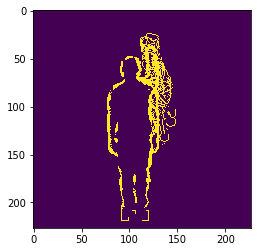

712
a19_s5_t3_depth.mat


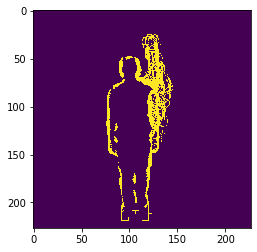

713
a19_s5_t4_depth.mat


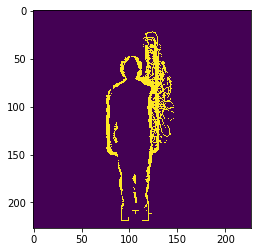

714
a20_s5_t1_depth.mat


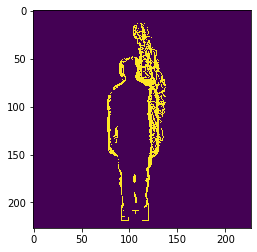

715
a20_s5_t2_depth.mat


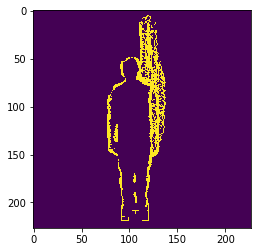

716
a20_s5_t3_depth.mat


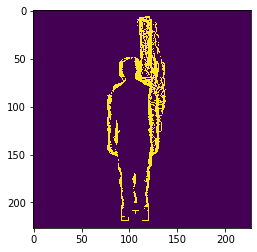

717
a20_s5_t4_depth.mat


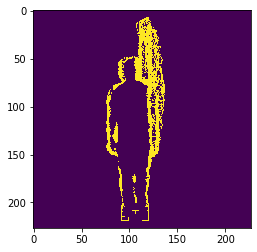

718
a21_s5_t1_depth.mat


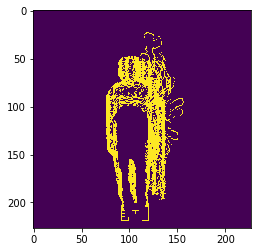

719
a21_s5_t2_depth.mat


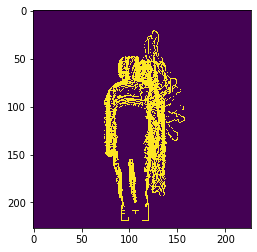

720
a21_s5_t3_depth.mat


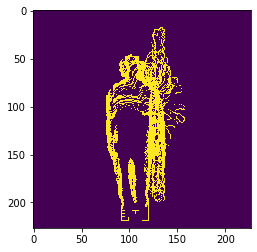

721
a21_s5_t4_depth.mat


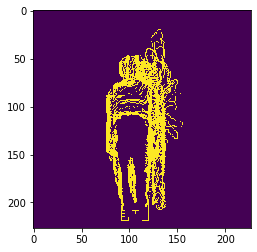

722
a22_s5_t1_depth.mat


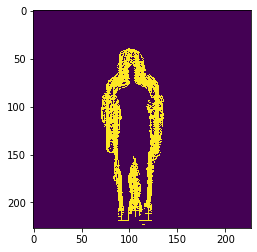

723
a22_s5_t2_depth.mat


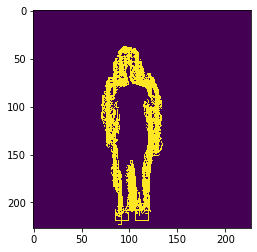

724
a22_s5_t3_depth.mat


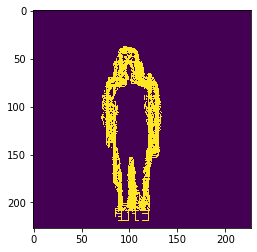

725
a22_s5_t4_depth.mat


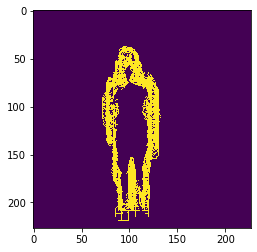

726
a23_s5_t1_depth.mat


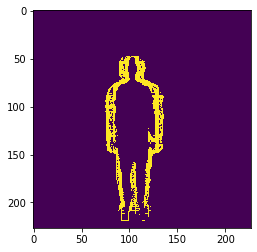

727
a23_s5_t2_depth.mat


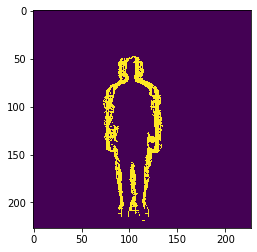

728
a23_s5_t3_depth.mat


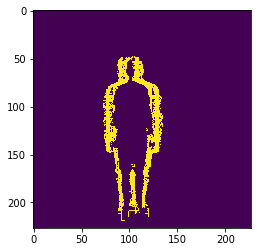

729
a23_s5_t4_depth.mat


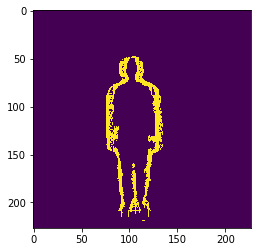

730
a24_s5_t1_depth.mat


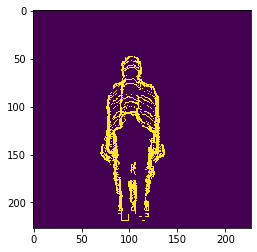

731
a24_s5_t2_depth.mat


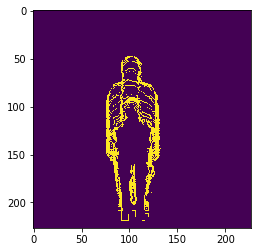

732
a24_s5_t3_depth.mat


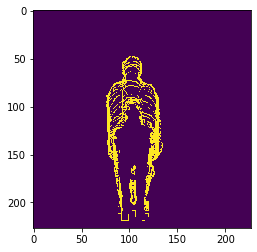

733
a24_s5_t4_depth.mat


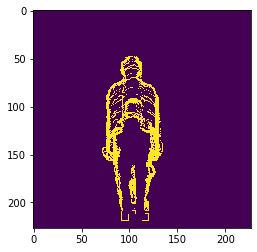

734
a25_s5_t1_depth.mat


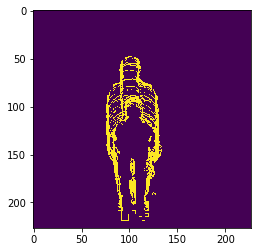

735
a25_s5_t2_depth.mat


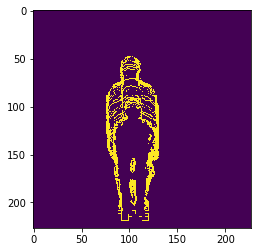

736
a25_s5_t3_depth.mat


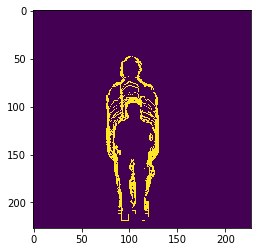

737
a25_s5_t4_depth.mat


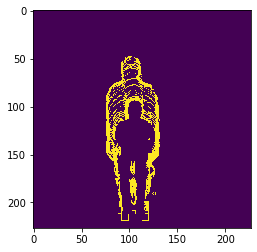

738
a26_s5_t1_depth.mat


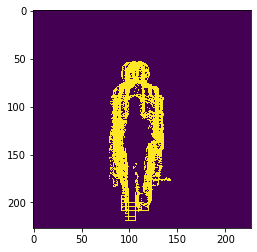

739
a26_s5_t2_depth.mat


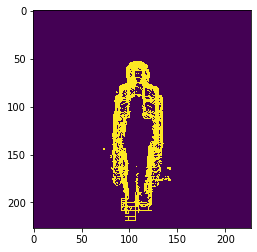

740
a26_s5_t3_depth.mat


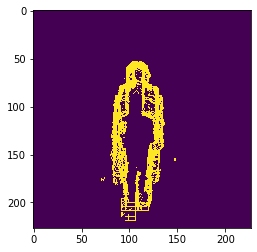

741
a26_s5_t4_depth.mat


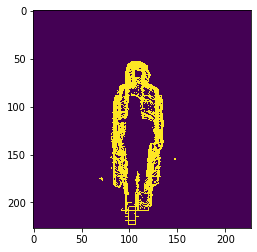

742
a27_s5_t1_depth.mat


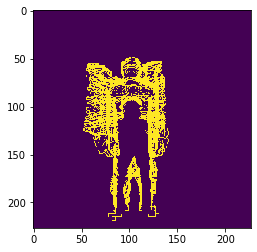

743
a27_s5_t2_depth.mat


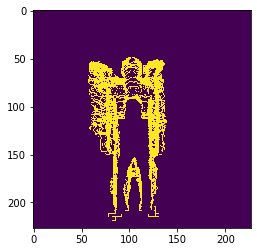

744
a27_s5_t3_depth.mat


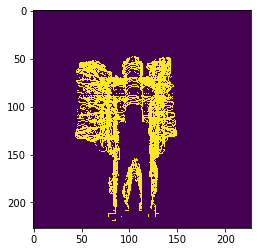

745
a27_s5_t4_depth.mat


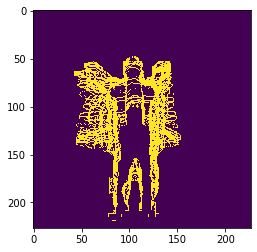

746
a1_s6_t1_depth.mat


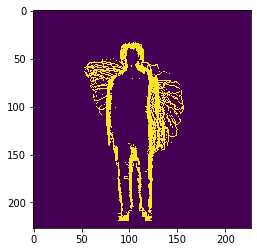

747
a1_s6_t2_depth.mat


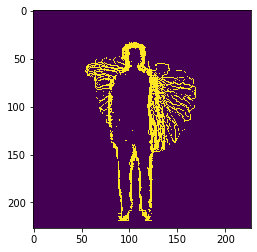

748
a1_s6_t3_depth.mat


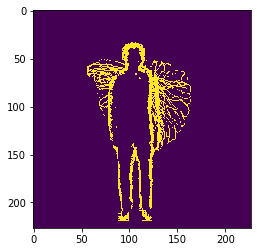

749
a1_s6_t4_depth.mat


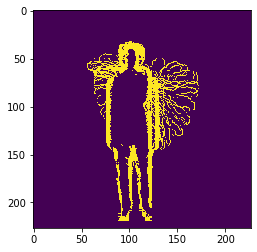

750
a2_s6_t1_depth.mat


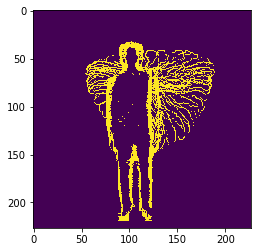

751
a2_s6_t2_depth.mat


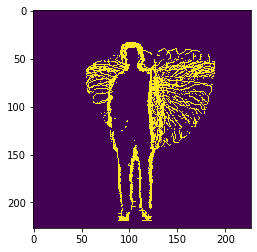

752
a2_s6_t3_depth.mat


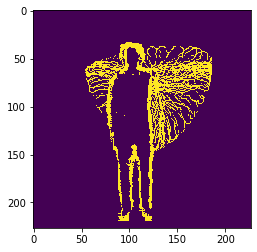

753
a2_s6_t4_depth.mat


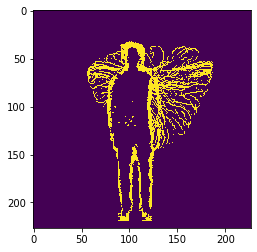

754
a3_s6_t1_depth.mat


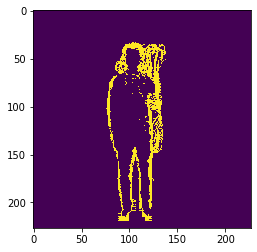

755
a3_s6_t2_depth.mat


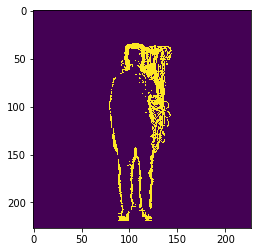

756
a3_s6_t3_depth.mat


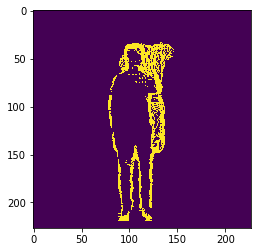

757
a3_s6_t4_depth.mat


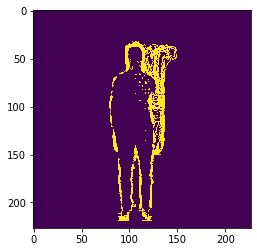

758
a5_s1_t2_depth.mat


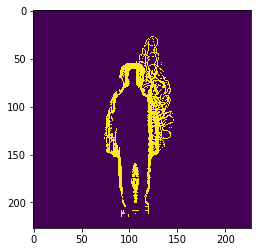

759
a9_s1_t1_depth.mat


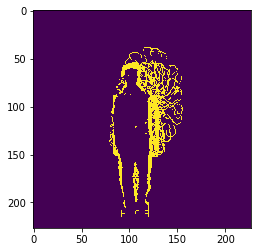

760
a9_s1_t2_depth.mat


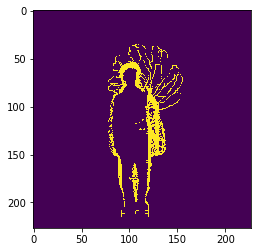

761
a9_s1_t3_depth.mat


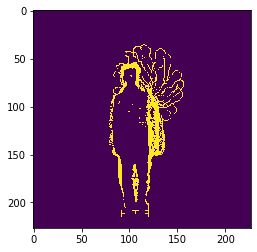

762
a9_s1_t4_depth.mat


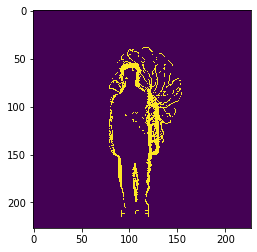

763
a10_s1_t1_depth.mat


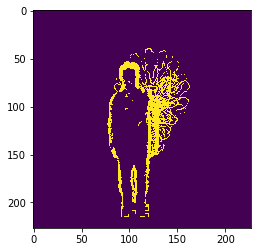

764
a10_s1_t2_depth.mat


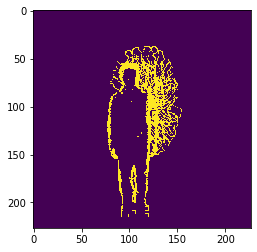

765
a10_s1_t3_depth.mat


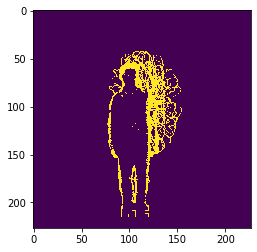

766
a10_s1_t4_depth.mat


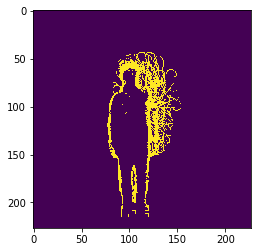

767
a4_s6_t1_depth.mat


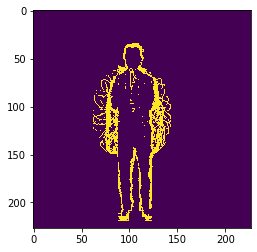

768
a4_s6_t2_depth.mat


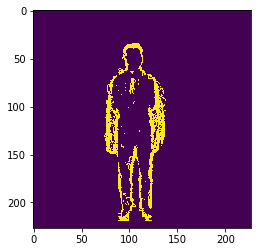

769
a4_s6_t3_depth.mat


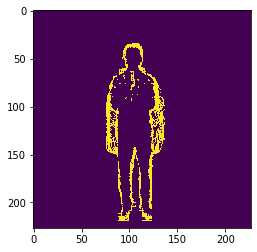

770
a4_s6_t4_depth.mat


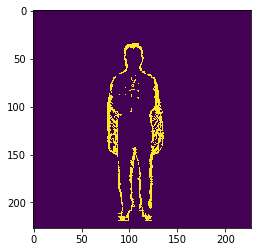

771
a5_s6_t1_depth.mat


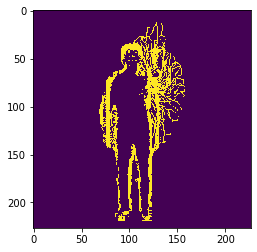

772
a5_s6_t2_depth.mat


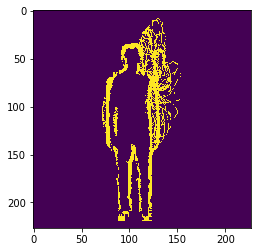

773
a5_s6_t3_depth.mat


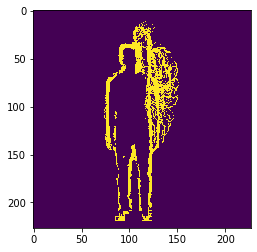

774
a5_s6_t4_depth.mat


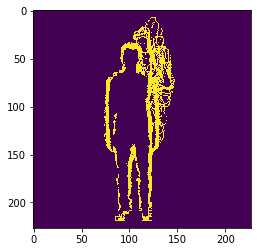

775
a6_s6_t1_depth.mat


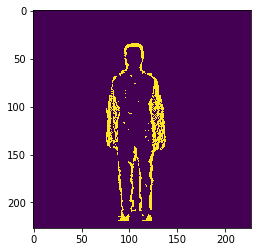

776
a6_s6_t2_depth.mat


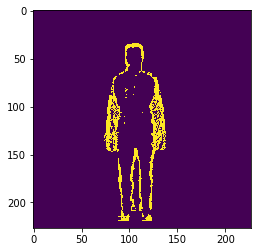

777
a6_s6_t3_depth.mat


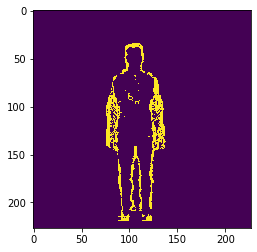

778
a6_s6_t4_depth.mat


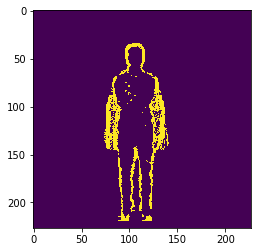

779
a7_s6_t1_depth.mat


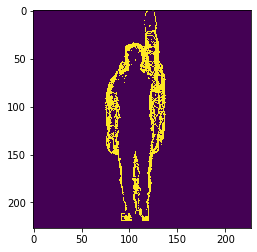

780
a7_s6_t2_depth.mat


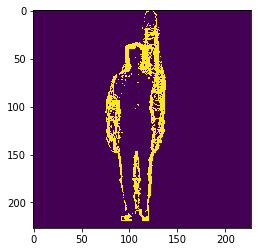

781
a7_s6_t3_depth.mat


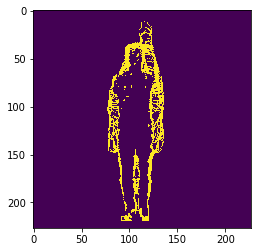

782
a7_s6_t4_depth.mat


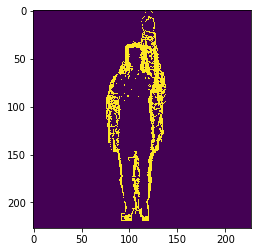

783
a8_s6_t1_depth.mat


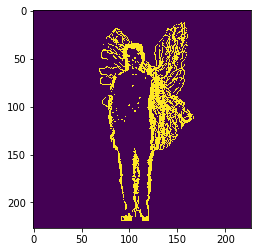

784
a8_s6_t2_depth.mat


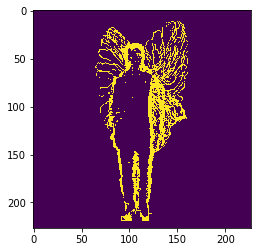

785
a8_s6_t3_depth.mat


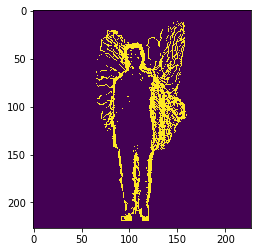

786
a8_s6_t4_depth.mat


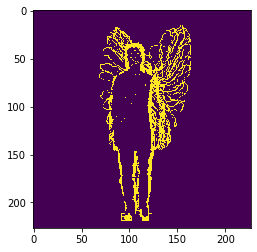

787
a9_s6_t1_depth.mat


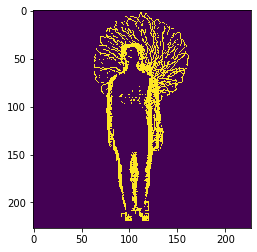

788
a9_s6_t2_depth.mat


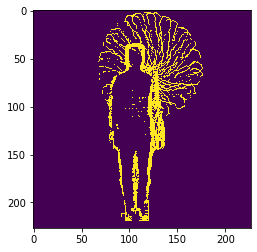

789
a9_s6_t3_depth.mat


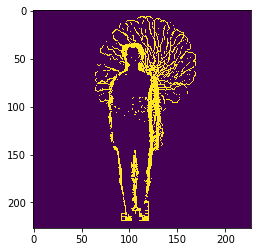

790
a9_s6_t4_depth.mat


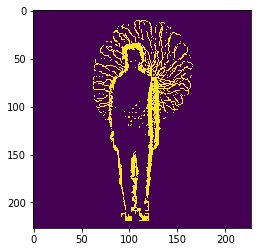

791
a10_s6_t1_depth.mat


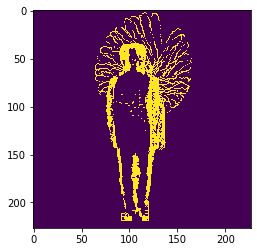

792
a10_s6_t2_depth.mat


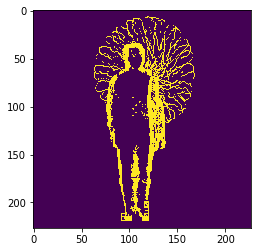

793
a10_s6_t3_depth.mat


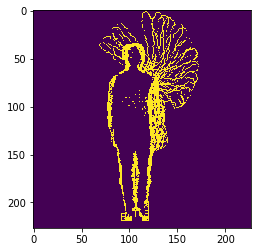

794
a10_s6_t4_depth.mat


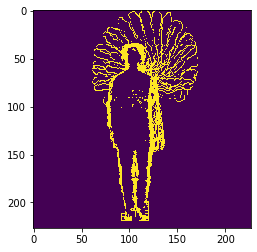

795
a11_s6_t1_depth.mat


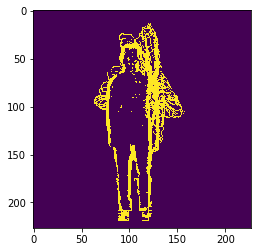

796
a11_s6_t2_depth.mat


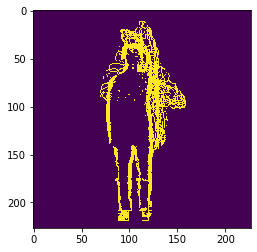

797
a11_s6_t3_depth.mat


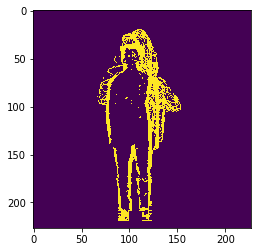

798
a11_s6_t4_depth.mat


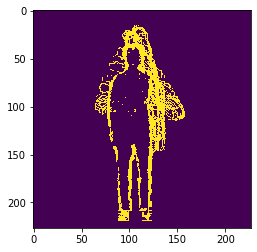

799
a12_s6_t1_depth.mat


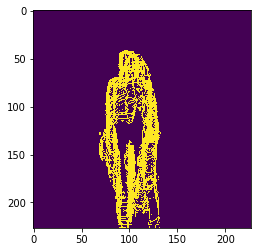

800
a12_s6_t2_depth.mat


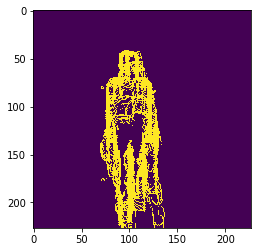

801
a12_s6_t3_depth.mat


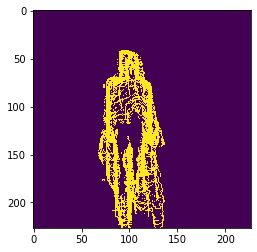

802
a12_s6_t4_depth.mat


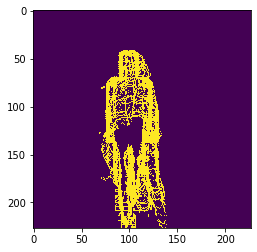

803
a13_s6_t1_depth.mat


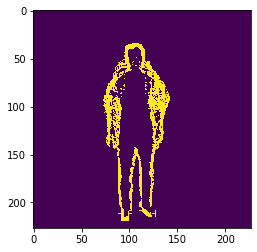

804
a13_s6_t2_depth.mat


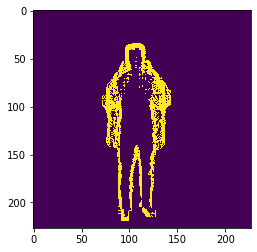

805
a13_s6_t3_depth.mat


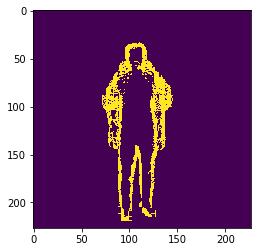

806
a13_s6_t4_depth.mat


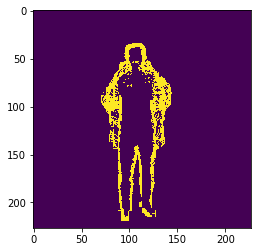

807
a14_s6_t1_depth.mat


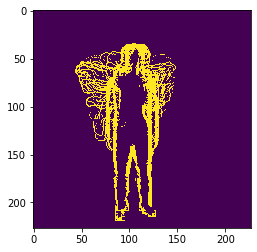

808
a14_s6_t2_depth.mat


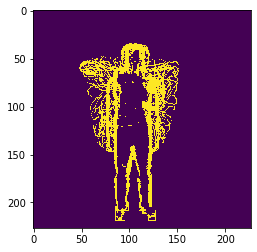

809
a14_s6_t3_depth.mat


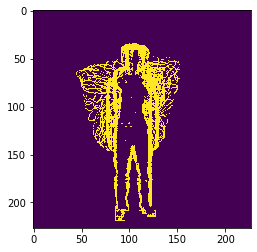

810
a14_s6_t4_depth.mat


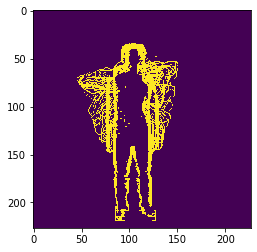

811
a15_s6_t1_depth.mat


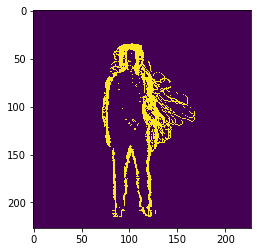

812
a15_s6_t2_depth.mat


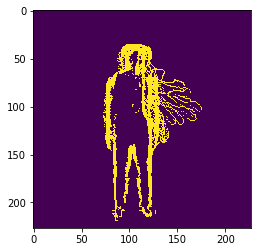

813
a15_s6_t3_depth.mat


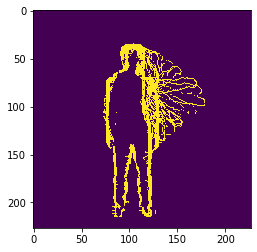

814
a15_s6_t4_depth.mat


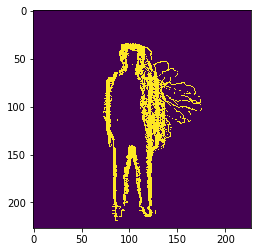

815
a16_s6_t1_depth.mat


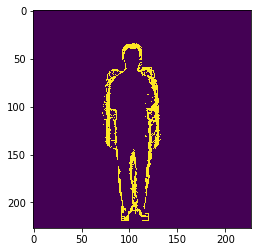

816
a16_s6_t2_depth.mat


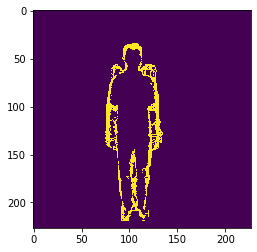

817
a16_s6_t3_depth.mat


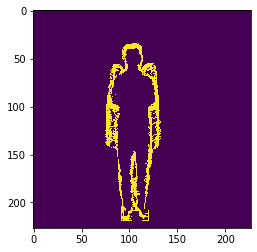

818
a16_s6_t4_depth.mat


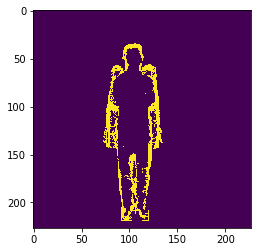

819
a17_s6_t1_depth.mat


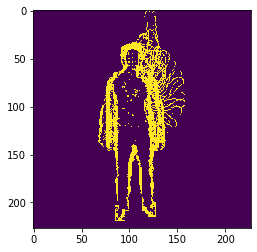

820
a17_s6_t2_depth.mat


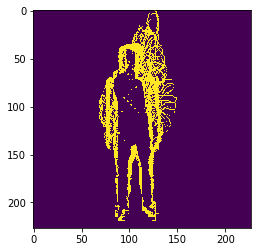

821
a17_s6_t3_depth.mat


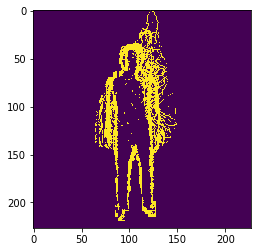

822
a17_s6_t4_depth.mat


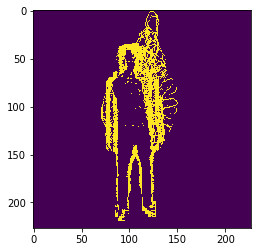

823
a18_s6_t1_depth.mat


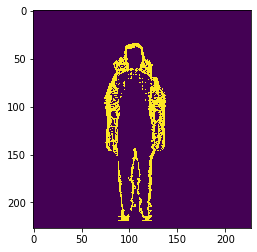

824
a18_s6_t2_depth.mat


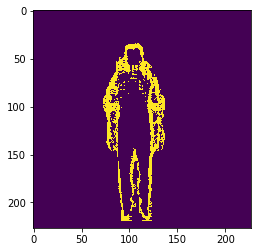

825
a18_s6_t3_depth.mat


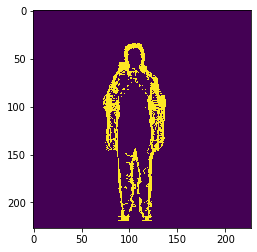

826
a18_s6_t4_depth.mat


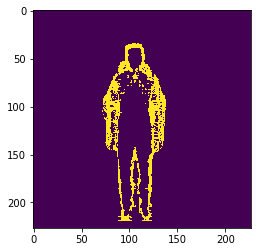

827
a19_s6_t1_depth.mat


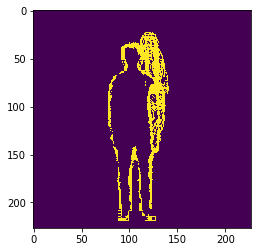

828
a19_s6_t2_depth.mat


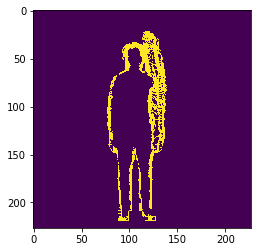

829
a19_s6_t3_depth.mat


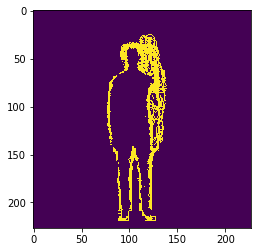

830
a19_s6_t4_depth.mat


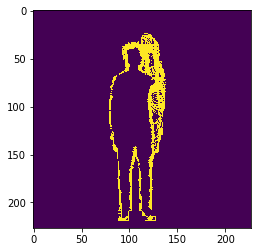

831
a20_s6_t1_depth.mat


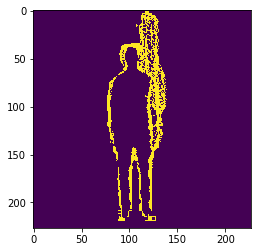

832
a20_s6_t2_depth.mat


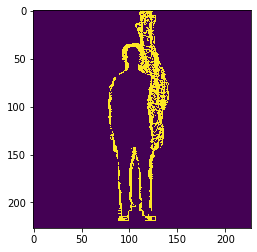

833
a20_s6_t3_depth.mat


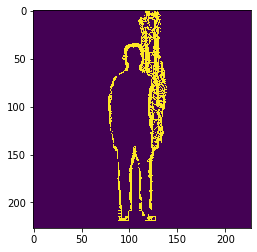

834
a20_s6_t4_depth.mat


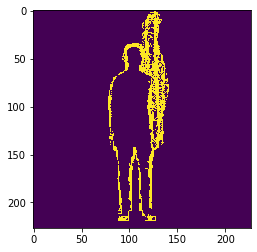

835
a21_s6_t1_depth.mat


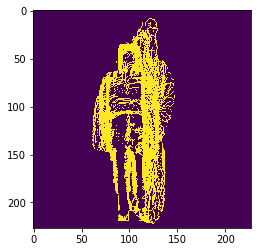

836
a21_s6_t2_depth.mat


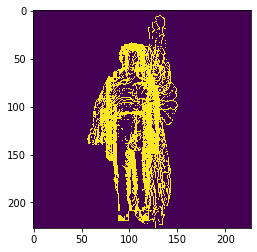

837
a21_s6_t3_depth.mat


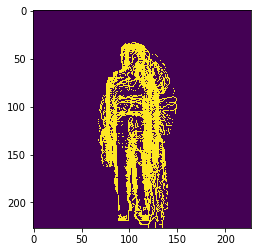

838
a21_s6_t4_depth.mat


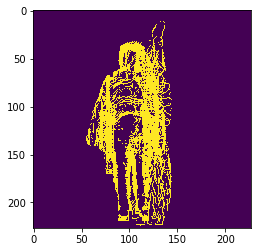

839
a22_s6_t1_depth.mat


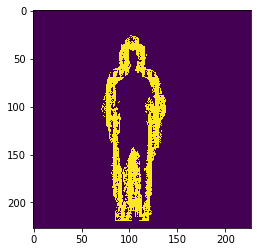

840
a22_s6_t2_depth.mat


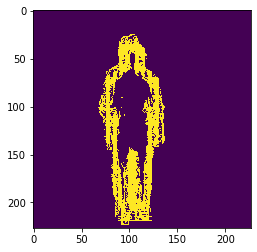

841
a22_s6_t3_depth.mat


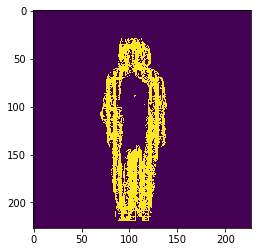

842
a22_s6_t4_depth.mat


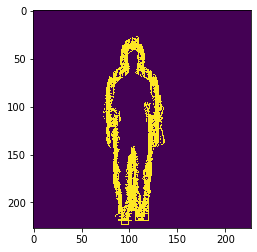

843
a23_s6_t1_depth.mat


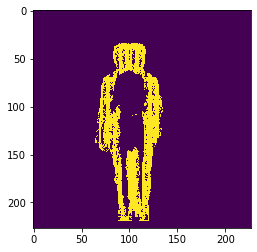

844
a23_s6_t2_depth.mat


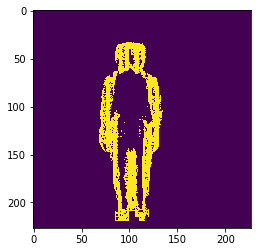

845
a23_s6_t3_depth.mat


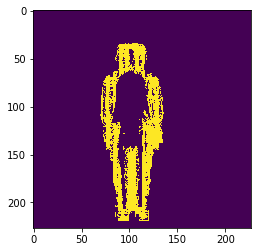

846
a24_s6_t1_depth.mat


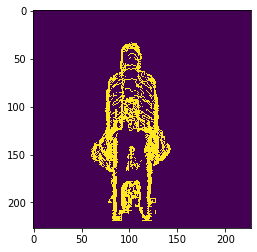

847
a24_s6_t2_depth.mat


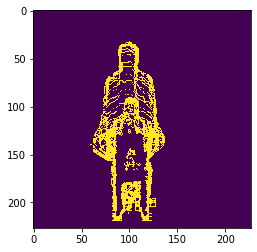

848
a24_s6_t3_depth.mat


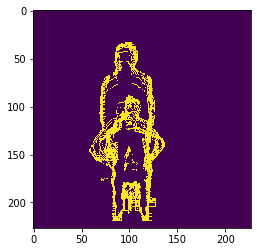

849
a24_s6_t4_depth.mat


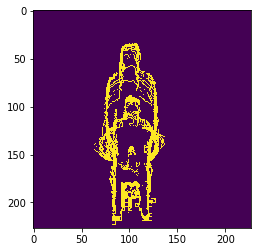

850
a25_s6_t1_depth.mat


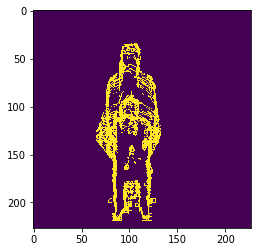

851
a25_s6_t2_depth.mat


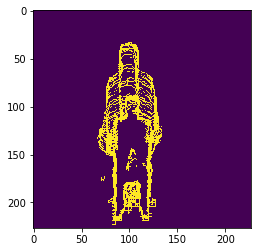

852
a25_s6_t3_depth.mat


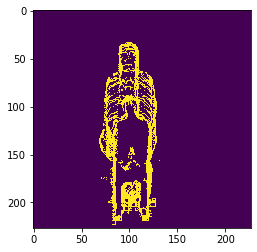

853
a25_s6_t4_depth.mat


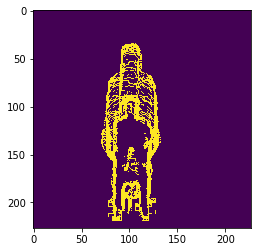

854
a26_s6_t1_depth.mat


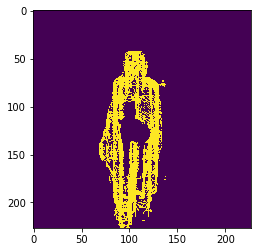

855
a26_s6_t2_depth.mat


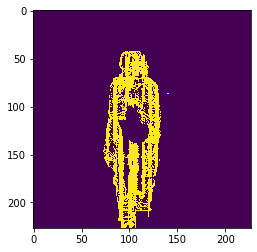

856
a26_s6_t3_depth.mat


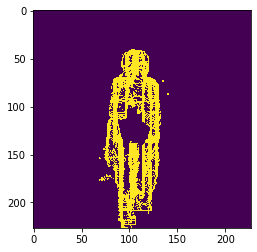

857
a26_s6_t4_depth.mat


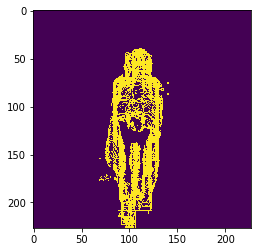

858
a27_s6_t1_depth.mat


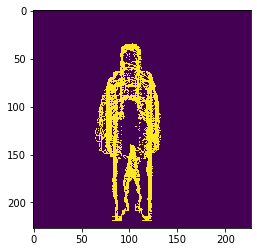

859
a27_s6_t2_depth.mat


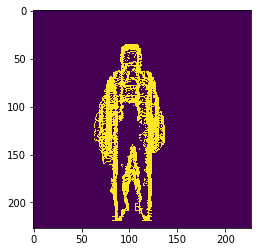

860
a27_s6_t3_depth.mat


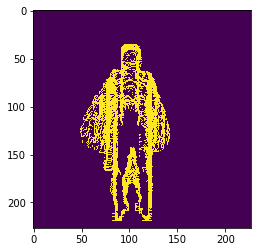

861
a27_s6_t4_depth.mat


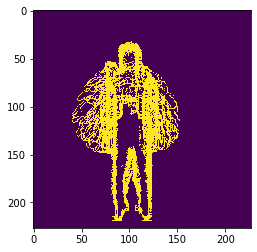

In [82]:
l_ser = []
path = '/content/drive/MyDrive/Colab Notebooks Copy Old/utd mhad depth/Depth'

cnt = 0
#max_frame = -1
#start = time.time()
#emi = np.zeros(227,227).astype(int)
for file in os.listdir(path):
    if file.endswith('.mat'):
      cnt+=1

      # if(cnt==2):
      #   break

      print(cnt)
      print(file)
      d = sio.loadmat(path+'/'+file)['d_depth']
      d = np.transpose(d, (2, 0, 1))
      #print(d.shape)

      x = re.split("_|\.",file)
      act = x[0]
      nam = x[1]
      tim = x[2]

      frame = d.shape[0]
      for k in range(frame):
        im = np.array(d[k][ : , 30:290 ])
        
        # im_g = sfi_filtered(im)
        # im = prewitt_filtered(im)
        im = cv2.resize(im, dsize=(227,227))
        # print(im.min())
        # print(im.max())
        im = im/im.max()
        im = masked(im)

        if(k==0):
          mei = im

        im[im > 0] = 1
        mei = mei|im
      
      #l_ser.append(mei)
      d = { 'data': mei , 'filename': file , 'label': act[1:] } 
      #ser = pd.Series(data = d, index = ['front','side',

      ser = pd.Series(data = d, index = ['data','filename','label'])
      l_ser.append(ser)

      plt.imshow(mei,interpolation='nearest')
      plt.show()

In [ ]:
# d = {'front':front, 'side':side, 'top':top, 'lbp_f':lbp_f, 'lbp_s':lbp_s, 'lbp_t':lbp_t, 'hist_f':hist_f, 'hist_s':hist_s, 'hist_t':hist_t, 'action':act}

# ser = pd.Series(data = d, index = ['front','side', 'top','lbp_f', 'lbp_s', 'lbp_t', 'hist_f', 'hist_s', 'hist_t', 'action' ])

# cols = ['front','side', 'top','lbp_f', 'lbp_s', 'lbp_t', 'hist_f', 'hist_s', 'hist_t', 'action' ]

# l_ser.append(ser)

In [83]:
a=len(l_ser)
for a in l_ser:
  

861

In [84]:
cols = ['data','filename','label']
df = pd.DataFrame(l_ser,columns=cols)
print(df.shape)
df.head()

(861, 3)


data            filename label
0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  a1_s1_t1_depth.mat     1
1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  a1_s1_t2_depth.mat     1
2  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  a1_s1_t3_depth.mat     1
3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  a1_s1_t4_depth.mat     1
4  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  a2_s1_t1_depth.mat     2

In [85]:
sio.savemat('/content/drive/MyDrive/Colab Notebooks Copy Old/datasets/utd_mhad_mei_861x277x277.mat',{name: col.values for name, col in df.items()})